In [ ]:
!pip install numpy pandas nltk gensim scikit-learn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pandas nltk spacy gensim pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install pyldavis==3.2.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Install necessary libraries
!pip install pandas nltk gensim scikit-learn matplotlib seaborn wordcloud

# Import libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataSB = pd.read_excel('/content/dist.xlsx', sheet_name="Sheet1") #my file

dataSB.head()

title  \
0  Socio economic development of women through se...   
1  Empowerment of women through Indira kranthi pa...   
2  IMPACT OF MGNREGS ON INCOME AND EMPLOYMENT LEV...   
3  FINANCIAL INCLUSION OF WOMEN THROUGH MENREGS A...   
4  Adoption Of Technology And Innovation Among SH...   

                                            abstract  date_num  
0  Women are trying their level best to attain eq...      2011  
1  The concept of women's empowerment is the outc...      2013  
2  The Mahatma Gandhi National Rural Employment G...      2016  
3  In the preceding chapter an attempt has been m...      2016  
4  The nature and field of technology transfer de...      2014

**Main code**

In [ ]:
# ------ Tokenizing ---------

nltk.download('punkt')

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

dataSB['abstract'] = dataSB['abstract'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataSB['abstract'] = dataSB['abstract'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataSB['abstract'] = dataSB['abstract'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataSB['abstract'] = dataSB['abstract'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataSB['abstract'] = dataSB['abstract'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataSB['abstract'] = dataSB['abstract'].apply(remove_singl_char)

# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataSB['abstract_tokens'] = dataSB['abstract'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n')
print(dataSB['abstract_tokens'].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenizing Result : 

0    [Women, are, trying, their, level, best, to, a...
1    [The, concept, of, womens, empowerment, is, th...
2    [The, Mahatma, Gandhi, National, Rural, Employ...
3    [In, the, preceding, chapter, an, attempt, has...
4    [The, nature, and, field, of, technology, tran...
Name: abstract_tokens, dtype: object


## **Stopwords**
Remove stop words fro abstracts (recommendation)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["women", "also", 'klo', 'indonesia'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataSB['abstract_tokens_WSW'] = dataSB['abstract_tokens'].apply(stopwords_removal)

print(dataSB['abstract_tokens_WSW'].head())

0    [Women, are, trying, their, level, best, to, a...
1    [The, concept, of, womens, empowerment, is, th...
2    [The, Mahatma, Gandhi, National, Rural, Employ...
3    [In, the, preceding, chapter, an, attempt, has...
4    [The, nature, and, field, of, technology, tran...
Name: abstract_tokens_WSW, dtype: object


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
print(f""" "helps" after lemmztization :  {nlp("helps")[0].lemma_}""")
print(f""" "helping" after lemmztization :  {nlp("helping")[0].lemma_}""")

 "helps" after lemmztization :  help
 "helping" after lemmztization :  help


In [ ]:
normalizad_word = pd.read_excel('/content/dist.xlsx') #lokasi file

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

dataSB['textdata_normalized'] = dataSB['abstract_tokens_WSW'].apply(normalized_term)

dataSB['textdata_normalized'].head(10)

0    [Women, are, trying, their, level, best, to, a...
1    [The, concept, of, womens, empowerment, is, th...
2    [The, Mahatma, Gandhi, National, Rural, Employ...
3    [In, the, preceding, chapter, an, attempt, has...
4    [The, nature, and, field, of, technology, tran...
5    [The, study, seeks, to, examine, the, demograp...
6    [The, effective, functioning, of, any, institu...
7    [most, remarkable, thing, noticed, is, the, pa...
8    [The, Mahatma, Gandhi, National, Rural, Employ...
9    [Women, Empowerment, enables, families, sustai...
Name: textdata_normalized, dtype: object

In [ ]:
#tokenize articles
# Tokenize articles
tokenize_article = dataSB['textdata_normalized'].apply(lambda x: x)
 #Create Dictionary
id2word = corpora.Dictionary(tokenize_article)

# Create Corpus
texts = tokenize_article

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Print 50 words from the first document in the corpus
corpus_example = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]
print(corpus_example[0][:50])


[('ANOVA', 7), ('Accumulated', 1), ('Active', 1), ('Activities', 1), ('Addanki', 6), ('Against', 1), ('Age', 1), ('Analysis', 1), ('Andhra', 4), ('Assets', 1), ('Average', 5), ('BC', 1), ('BW', 1), ('Background', 1), ('Backward', 2), ('Bank', 1), ('Banks', 1), ('Benefits', 1), ('BenefleirrieP', 1), ('Bierage', 1), ('But', 2), ('Care', 1), ('Castas', 1), ('Caste', 1), ('Castes', 3), ('Castewise', 5), ('Conditions', 1), ('Covered', 1), ('Credit', 1), ('Cultivators', 1), ('Cumbum', 3), ('Cumburn', 2), ('DWCRA', 4), ('Demanded', 1), ('Derived', 1), ('Development', 1), ('Distribution', 1), ('Economic', 2), ('Educational', 1), ('Emlgloymmt', 1), ('Employment', 1), ('Evidently', 1), ('Family', 1), ('Festivals', 1), ('Findings', 7), ('From', 2), ('Further', 1), ('Goveniment', 1), ('Govenunental', 1), ('Groups', 9)]


Sample text: Socio economic development of women through self help groups A case study of Prakasham district In Andhra Pradesh Empowerment of women through Indira kranthi patham  A study in prakasam district in Andhra Pradesh IMPACT OF MGNREGS ON INCOME AND EMPLOYMENT LEVELS OF WOMEN A STUDY OF KURNOOL DISTRICT OF ANDHRA PRADESH FINANCIAL INCLUSION OF WOMEN THROUGH MENREGS A STUDY OF ANANTHAPURAMU DISTRICT OF ANDHRA PRADESH Adoption Of Technology And Innovation Among SHG Women Beneficiaries A Study Of Life S
Stopwords: {'that', "won't", 'i', "wouldn't", 'women', 'could', "didn't", 'did', 'the', 'on', 'between', 'theirs', 'being', 'ever', 'who', 'they', "they'd", 'was', 'into', 'does', 'http', 'of', 'are', 'since', "don't", 'her', "mustn't", 'few', 'she', 'with', 'in', 'same', 'hence', 'shall', "shan't", 'once', 'more', 'yourselves', "wasn't", 'when', "i'll", 'too', "we're", 'off', 'to', 'him', 'so', "we've", "there's", "how's", "you're", 'through', "why's", 'just', 'ours', 'had', 'has'

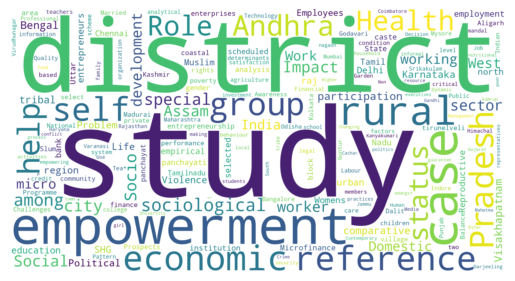

In [ ]:
# creating the text variable
Text1 = " ".join(title for title in dataSB.title)


# Debugging: Print a sample of the text
print("Sample text:", Text1[:500])

# Create a set of stopwords and add the word "women" to it
stopwords = set(WordCloud().stopwords)
stopwords.add("women")

# Debugging: Print the stopwords to ensure "women" is added
print("Stopwords:", stopwords)

# Create the word cloud, excluding the word "women"
word_cloud1 = WordCloud(stopwords=stopwords, collocations=False, background_color='white',
                        width=2048, height=1080).generate(Text1)

# Save the word cloud image to a file
word_cloud1.to_file('got.png')

# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


Sample text: women are trying their level best to attain equality of oppotieisn various ways which are different over the time and among societies micro credit for women selfhelp groups helps pool the small capital resources and skills available with women it paves the way for fuller utilization of capital and mobilizes the female human potential it gives psychological satisfaction or relief to the educated women and provides  sense of achievement and  separate enhanced identity in society sele help groups c
Stopwords: {'that', "won't", 'i', "wouldn't", 'women', 'could', "didn't", 'did', 'the', 'district', 'on', 'between', 'theirs', 'being', 'ever', 'who', 'they', "they'd", 'was', 'into', 'does', 'http', 'of', 'are', 'since', "don't", 'her', "mustn't", 'few', 'she', 'with', 'in', 'reference.', 'same', 'hence', 'shall', "shan't", 'once', 'more', 'yourselves', "wasn't", 'when', "i'll", 'too', "we're", 'off', 'to', 'him', 'so', "we've", "there's", "how's", "you're", 'through', "why's", 'j

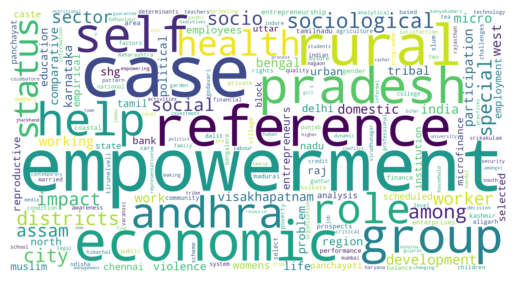

In [ ]:
# Creating the text variable by joining all titles and converting to lowercase
Text1 = " ".join(abstract.lower() for abstract in dataSB.abstract)

# Debugging: Print a sample of the text
print("Sample text:", Text1[:500])

# Create a set of stopwords and add the words "women", "district", and "study" to it
#stopwords = set(WordCloud().stopwords)
#custom_stopwords = {"women", "district", "study", "reference", "special"}
#stopwords.update(custom_stopwords)

# Create a set of stopwords and add the words to be excluded
stopwords = set(WordCloud().stopwords)
additional_stopwords = {"women", "district", "study", "reference.", "Reference", "REFERENCE", "among"}
stopwords.update(additional_stopwords)

# Debugging: Print the stopwords to ensure the custom words are added
print("Stopwords:", stopwords)

#Define a custom color function
#def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#    return "hsl(310, 100%, 50%)"  # HSL color format: Hue, Saturation, Lightness


# Define a custom color function for a red to yellow gradient
def red_to_yellow_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Red to yellow gradient in HSL: Red (0) to Yellow (60)
    hue = int(60 * font_size / max_font_size)  # Scale hue based on font size
    return f"hsl({hue}, 100%, 50%)"

# Save the word cloud image to a file
word_cloud1.to_file('got.png')

# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

                                               title  \
0  Socio economic development of women through se...   
1  Empowerment of women through Indira kranthi pa...   
2  IMPACT OF MGNREGS ON INCOME AND EMPLOYMENT LEV...   
3  FINANCIAL INCLUSION OF WOMEN THROUGH MENREGS A...   
4  Adoption Of Technology And Innovation Among SH...   

                                            abstract  date_num  
0  Women are trying their level best to attain eq...      2011  
1  The concept of women's empowerment is the outc...      2013  
2  The Mahatma Gandhi National Rural Employment G...      2016  
3  In the preceding chapter an attempt has been m...      2016  
4  The nature and field of technology transfer de...      2014  
Sample text: socio economic development of women through self help groups a case study of prakasham district in andhra pradesh empowerment of women through indira kranthi patham a study in prakasam district in andhra pradesh impact of mgnregs on income and employment level

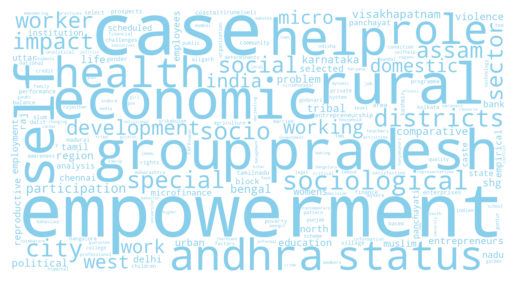

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Load your data
dataSB = pd.read_excel('/content/dist.xlsx', sheet_name="Sheet1")

# Display the first few rows of the dataframe
print(dataSB.head())

# Define a function to clean and preprocess the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove extra whitespace
    text = " ".join(text.split())
    return text

# Apply the cleaning function to the titles
dataSB['clean_title'] = dataSB['title'].apply(clean_text)

# Creating the text variable by joining all cleaned titles
Text1 = " ".join(title for title in dataSB.clean_title)

# Debugging: Print a sample of the text
print("Sample text:", Text1[:500])

# Create a set of stopwords and add the words to be excluded
stopwords = set(WordCloud().stopwords)
additional_stopwords = {"women", "district", "study", "reference", "among"}
stopwords.update(additional_stopwords)

# Debugging: Print the stopwords to ensure the additional words are added
print("Stopwords:", stopwords)

# Define a color function for sky blue words
def sky_blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(135, 206, 235)"

# Create the word cloud, excluding the specified stopwords and setting the background color to white
word_cloud1 = WordCloud(stopwords=stopwords, collocations=False, background_color='white',
                        color_func=sky_blue_color_func, width=2048, height=1080).generate(Text1)

# Save the word cloud image to a file
word_cloud1.to_file('got.png')

# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


                                               title  \
0  Work life balance among women employees in org...   
1  Metaphors of Gender in the Social  Organisatio...   
2  Women offenders in Andhra Pradesh a sociologic...   
3  Women Workers In Mica Industry An Anthropologi...   
4  Political participation of women in municipal ...   

                                            abstract  year  
0  Relationship under mutual benefit between work...  2011  
1  This research attempted to investigate the man...  2016  
2  In the wake of industrialization, wesMzation d...  2016  
3  The present thesis is intended to study woman ...  2017  
4  Political participation is vital for a success...  2016  
Sample text: work life balance among women employees in organizations a study in andhra pradesh metaphors of gender in the social organisation of the khonds in andhra pradesh women offenders in andhra pradesh a sociological study women workers in mica industry an anthropological study political p

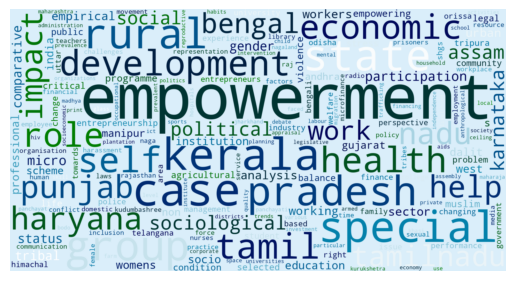

In [ ]:
# State level
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Load your data
dataSB = pd.read_excel('/content/state.xlsx', sheet_name="Sheet1")

# Display the first few rows of the dataframe
print(dataSB.head())

# Define a function to clean and preprocess the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove extra whitespace
    text = " ".join(text.split())
    return text

# Apply the cleaning function to the titles
dataSB['clean_title'] = dataSB['title'].apply(clean_text)

# Creating the text variable by joining all cleaned titles
Text1 = " ".join(title for title in dataSB.clean_title)

# Debugging: Print a sample of the text
print("Sample text:", Text1[:500])

# Create a set of stopwords and add the words to be excluded
stopwords = set(WordCloud().stopwords)
additional_stopwords = {"women", "district", "study", "reference", "among"}
stopwords.update(additional_stopwords)

# Debugging: Print the stopwords to ensure the additional words are added
print("Stopwords:", stopwords)

# Define a custom color function for the word cloud
def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(210, 100%, {100 - int(50 * (font_size / max_font_size))}%)"

# Generate the word cloud initially to calculate max font size
word_cloud1 = WordCloud(stopwords=stopwords, collocations=False, background_color='white',
                        width=2048, height=1080).generate(Text1)

# Calculate max font size for color scaling
max_font_size = max([font_size for _, font_size, _, _, _ in word_cloud1.layout_])

# Generate the word cloud again with the custom color function
word_cloud1 = WordCloud(stopwords=stopwords, collocations=False, background_color='#daeefa', colormap="ocean",
                        width=2048, height=1080).generate(Text1)

# Save the word cloud image to a file
word_cloud1.to_file('got.png')

# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


# **Title + Abstract**
combined analysis

                                               title  \
0  Women in Gandhara and Mathura art  a comparati...   
1  Being and Becoming Women A study of Select Bol...   
2  Agenda Setting in Indian Television: A Study o...   
3  Women and culture in the serials of Ekta Kapoo...   
4  Postfeminist Woman Identity Portrayed in Selec...   

                                            abstract  year  
0  Aesthetics is an important aspect of an art ob...  2017  
1  “When I look at the movies, film theorists try...  2019  
2  This work started with the question as to whet...  2018  
3  In connection with the study of women and cult...  2013  
4  The main contributions as well as the limitati...  2020  
Sample text: women in gandhara and mathura art a comparative study being and becoming women a study of select bollywood movies by women directors agenda setting in indian television a study of family women and children in hindi telugu serials women and culture in the serials of ekta kapoor a stud

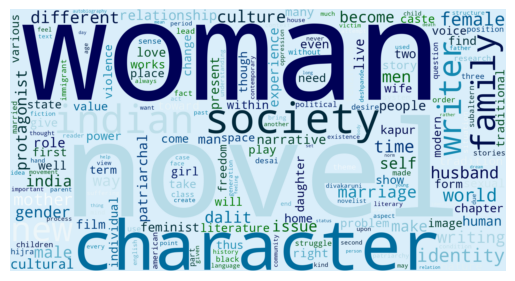

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Load your data
dataSB = pd.read_excel('/content/literature.xlsx', sheet_name="Sheet1")

# Display the first few rows of the dataframe
print(dataSB.head())

# Define a function to clean and preprocess the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove extra whitespace
    text = " ".join(text.split())
    return text

# Apply the cleaning function to the titles and abstracts
dataSB['clean_title'] = dataSB['title'].apply(clean_text)
dataSB['clean_abstract'] = dataSB['abstract'].apply(clean_text)

# Creating the text variable by joining all cleaned titles and abstracts
Text1 = " ".join(title for title in dataSB.clean_title)
Text2 = " ".join(abstract for abstract in dataSB.clean_abstract)
combined_text = Text1 + " " + Text2

# Debugging: Print a sample of the combined text
print("Sample text:", combined_text[:500])

# Create a set of stopwords and add the words to be excluded
stopwords = set(WordCloud().stopwords)
additional_stopwords = {"women", "womens", "one", "members", "level", "life", "s", "social", "among", "found", "per","cent", "education","study", "year", "respondents", "member", "percent", "significant", "group", "work"}
stopwords.update(additional_stopwords)

# Debugging: Print the stopwords to ensure the additional words are added
print("Stopwords:", stopwords)

# Define a custom color function for the word cloud
def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(210, 100%, {100 - int(50 * (font_size / max_font_size))}%)"

# Generate the word cloud using the 'ocean' colormap
word_cloud1 = WordCloud(stopwords=stopwords, collocations=False, background_color='#daeefa', colormap='ocean',
                        width=2048, height=1080).generate(combined_text)

# Save the word cloud image to a file
word_cloud1.to_file('ss.png')

# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                               title  \
0  Women in Gandhara and Mathura art  a comparati...   
1  Being and Becoming Women A study of Select Bol...   
2  Agenda Setting in Indian Television: A Study o...   
3  Women and culture in the serials of Ekta Kapoo...   
4  Postfeminist Woman Identity Portrayed in Selec...   

                                            abstract  year  
0  Aesthetics is an important aspect of an art ob...  2017  
1  “When I look at the movies, film theorists try...  2019  
2  This work started with the question as to whet...  2018  
3  In connection with the study of women and cult...  2013  
4  The main contributions as well as the limitati...  2020  
Sample text: in gandhara and mathura art a comparative study being and becoming a study of select bollywood movies by directors agenda setting in indian television a study of family and children in hindi telugu serials and culture in the serials of ekta kapoor a study postfeminist identity portra

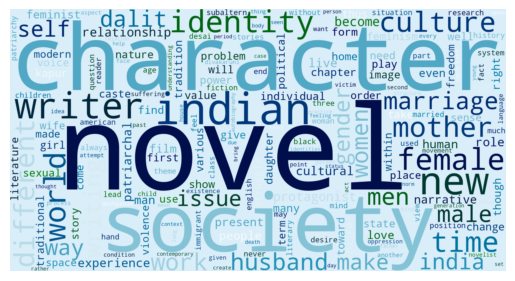

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Load your data
dataSB = pd.read_excel('/content/literature.xlsx', sheet_name="Sheet1")

# Display the first few rows of the dataframe
print(dataSB.head())

# Define a function to clean and preprocess the text
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove extra whitespace
    text = " ".join(text.split())
    return text

# Apply the cleaning function to the titles and abstracts
dataSB['clean_title'] = dataSB['title'].apply(clean_text)
dataSB['clean_abstract'] = dataSB['abstract'].apply(clean_text)

# Creating the text variable by joining all cleaned titles and abstracts
Text1 = " ".join(title for title in dataSB.clean_title)
Text2 = " ".join(abstract for abstract in dataSB.clean_abstract)
combined_text = Text1 + " " + Text2

# Remove the word "women" and its variations from the combined text
words_to_remove = {"women", "womens", "woman"}
filtered_text = " ".join(word for word in combined_text.split() if word not in words_to_remove)

# Debugging: Print a sample of the filtered text
print("Sample text:", filtered_text[:500])

# Create a set of stopwords and add the words to be excluded
stopwords = set(WordCloud().stopwords)
additional_stopwords = {
    "district", "one", "members", "level", "s", "family", "social", "among", "found", "per",
    "cent", "education", "study", "year", "respondents", "member", "percent", "life",
    "significant", "group"
}
stopwords.update(additional_stopwords)

# Debugging: Print the stopwords to ensure the additional words are added
print("Stopwords:", stopwords)

# Generate the word cloud using the 'ocean' colormap
word_cloud1 = WordCloud(
    stopwords=stopwords, collocations=False, background_color='#daeefa', colormap='ocean',
    width=2048, height=1080
).generate(filtered_text)

# Save the word cloud image to a file
word_cloud1.to_file('ss.png')

# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('/content/categorical data of dist, state,india.xlsx', sheet_name="Sheet1") #my file

data.head()

Handle  \
0   http://hdl.handle.net/10603/11399   
1  http://hdl.handle.net/10603/183774   
2   http://hdl.handle.net/10603/93184   
3   http://hdl.handle.net/10603/93187   
4    http://hdl.handle.net/10603/8998   

                                               Title  \
0  Education and the changing status of Muslim wo...   
1       Women in Kashmir in Post Independence period   
2  Pattern of womens participation in agriculture...   
3    Women and poverty _ a case study of South Assam   
4  Development disparities among the districts of...   

                                            Abstract  \
0  Status signifies an overall position of a pers...   
1  My study broadly looks into five major issues;...   
2  Agriculture is tlie life blood of Indian econo...   
3  The phrase feminization of poverty in the sens...   
4  Development is a multidimensional process and ...   

                                     Subject Keyword           Researcher  \
0                                Women; Muslim Women     Khurshid, Fouzia   
1            Independence; colonial; freedom; rights              Shazia.   
2  Demographic Features; Density of Population; S...          Deb, Shilpi   
3                              Women; Poverty; Assam  Gupta, Paramita Das   
4      Health care Service; Agriculture; Mathematics          Ajanta Nath   

            Guide  Year                                     Recommendation  \
0     Mathur, P K  2011  It is generally believed that Muslim women hav...   
1    S.Zainuddin.  2011  one of the primary concerns of this work was t...   
2   Roy, Niranjan  2011  Agrarian Characteristics of the Sample Farms: ...   
3  Sengupta, Keya  2011  In the concluding part of our thesis, we propo...   
4  Munindra Borah  2011  Here the districts are ranked on the basis of ...   

  Languages                               Department      Subject  \
0   English  Department of Sociology and Social Work    sociology   
1   English                 Centre for Women Studies         n.d.   
2   English                  Department of Economics    Economics   
3   English                  Department of Economics    Economics   
4   English      Department of Mathematical Sciences  Mathematics   

                  University    Place   Type            Category  \
0  Aligarh Muslim University  Aligarh  Ph.D.  Central University   
1  Aligarh Muslim University  Aligarh  Ph.D.  Central University   
2           Assam University  Silchar  Ph.D.  Central University   
3           Assam University  Silchar  Ph.D.  Central University   
4          Tezpur University   Tezpur  Ph.D.  Central University   

  Cultural zones                                           District  \
0   Central Zone                                 Srinagar District    
1   Central Zone                                     Kashmir Region   
2  North Eastern  Cachar, Karimganj, and Hailakandi district (Ba...   
3  North Eastern                                        South Assam   
4  North Eastern                                                NaN   

                State           Level  
0  Jammu and Kashmir   District level  
1  Jammu and Kashmir   District level  
2               Assam  District level  
3               Assam  District level  
4               Assam  District level

<ipython-input-101-d7e57495535b>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




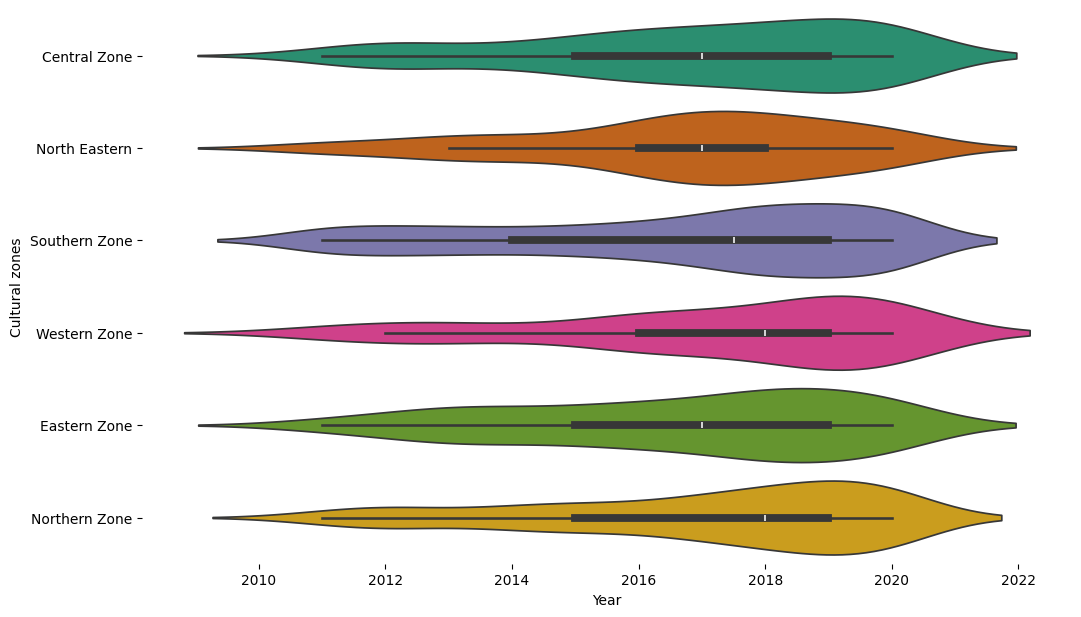

In [ ]:
# @title Cultural zones vs Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Cultural zones'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Year', y='Cultural zones', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

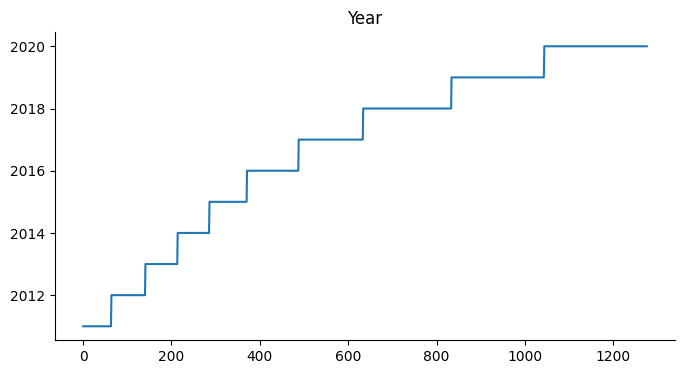

In [ ]:
# @title Year

from matplotlib import pyplot as plt
data['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

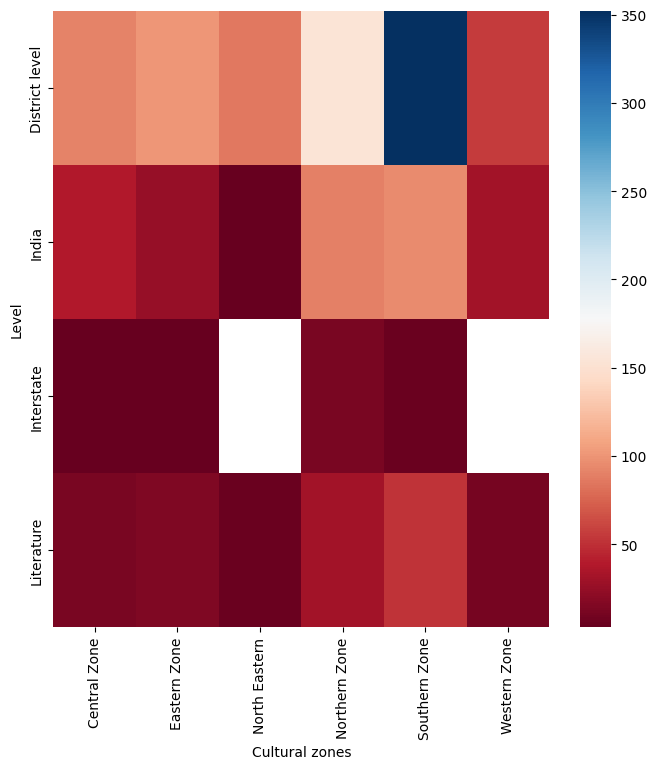

In [ ]:
# @title Cultural zones vs Level

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Level'].value_counts()
    for x_label, grp in data.groupby('Cultural zones')
})
sns.heatmap(df_2dhist, cmap='RdBu')

plt.xlabel('Cultural zones')
_ = plt.ylabel('Level')

In [ ]:
sudo apt-get install ttf-mscorefonts-installer


SyntaxError: invalid syntax (<ipython-input-83-4ebdc36be33e>, line 1)

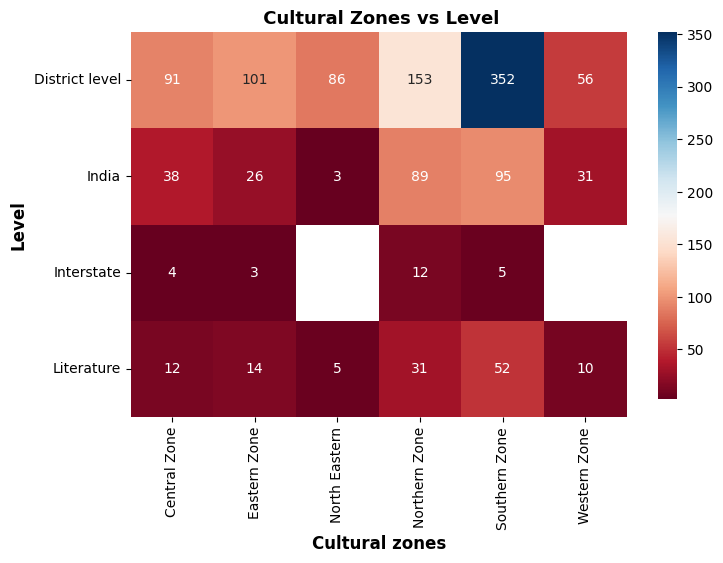

In [ ]:
import numpy as np
import matplotlib.colors as mcolors

# Custom colormap to ensure 0 values remain white
cmap = sns.color_palette("RdBu", as_cmap=True)
cmap.set_under('white')

# Create a mask to hide the 0 values
mask = df_2dhist_int == 0

# Create the heatmap with custom colormap and mask
plt.figure(figsize=(8, 5))  # 800 width and 600 height
sns.heatmap(df_2dhist_int, cmap=cmap, annot=True, fmt='d', mask=mask, cbar_kws={'extend': 'min'})



# Rotate the axis text labels to be vertical
plt.xticks(rotation=90, fontsize=10 )
plt.yticks(rotation=0, fontsize=10)
plt.xlabel('Cultural zones',  fontsize=12,fontweight='bold')
plt.ylabel('Level', fontsize=12,fontweight='bold')
plt.title(' Cultural Zones vs Level',fontsize=13, fontweight='bold')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the provided Excel file
file_path = '/content/categorical data of dist, state,india.xlsx'
data = pd.read_excel(file_path)

# Create a pivot table with counts of 'Level' within each 'Cultural zones'
df_2dhist = pd.pivot_table(data, values='Handle', index='Level', columns='Cultural zones', aggfunc='count', fill_value=0)

# Prepare data for the heatmap
heatmap_data = df_2dhist.values
x_labels = df_2dhist.columns.tolist()
y_labels = df_2dhist.index.tolist()

# Create the heatmap using plotly.graph_objects
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data,
    x=x_labels,
    y=y_labels,
    colorscale='deep',
    zmin=50,  # Set the minimum scale value
    zmax=350  # Set the maximum scale value
))

# Update layout for better readability and customize size
fig.update_layout(
    title='Cultural Zones vs Level Heatmap',
    xaxis_title='Cultural zones',
    yaxis_title='Level',
    width=800,   # Customize width
    height=600   # Customize height
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the provided Excel file
file_path = '/content/categorical data of dist, state,india.xlsx'
data = pd.read_excel(file_path)

# Create a pivot table with counts of 'Level' within each 'Cultural zones'
df_2dhist = pd.pivot_table(data, values='Handle', index='Level', columns='Cultural zones', aggfunc='count', fill_value=0)

# Prepare data for the heatmap
heatmap_data = df_2dhist.values
x_labels = df_2dhist.columns.tolist()
y_labels = df_2dhist.index.tolist()

# Define a custom colorscale with white for zero values
colorscale = [
    [0, 'white'],
    [0.01, 'rgb(0, 0, 255)'],  # Start the 'deep' colorscale from this point
    [1, 'rgb(0, 0, 139)']
]

# Create the heatmap using plotly.graph_objects
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data,
    x=x_labels,
    y=y_labels,
    colorscale='deep',
    zmin=0,  # Set the minimum scale value
    zmax=350  # Set the maximum scale value
))

# Update layout for better readability and customize size
fig.update_layout(
    title='Cultural Zones vs Level Heatmap',
    xaxis_title='Cultural zones',
    yaxis_title='Level',
    width=800,   # Customize width
    height=600   # Customize height
)

# Show the plot
# fig.show()


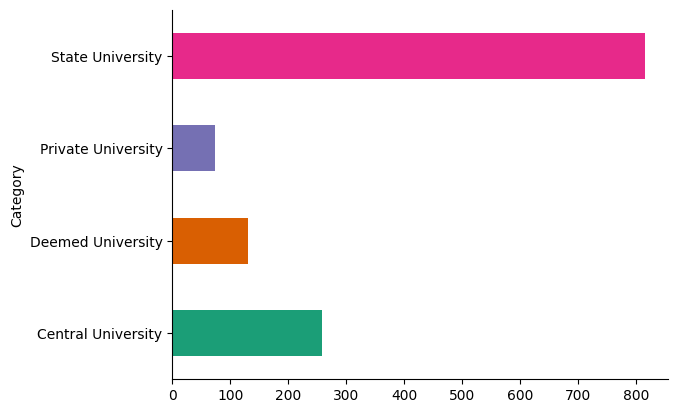

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


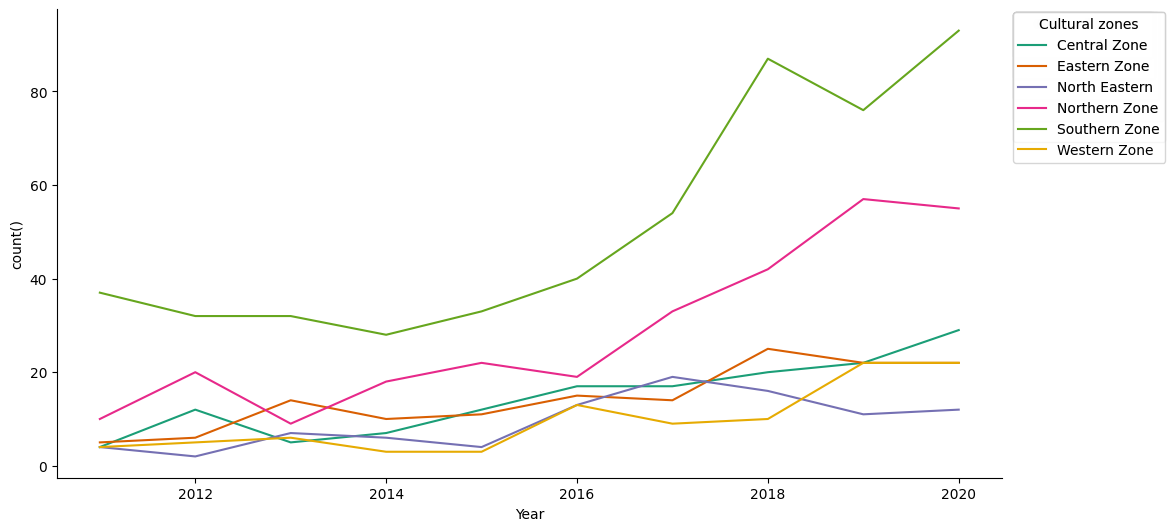

In [ ]:
# @title Year vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cultural zones')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cultural zones', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

# **Smooth Line**

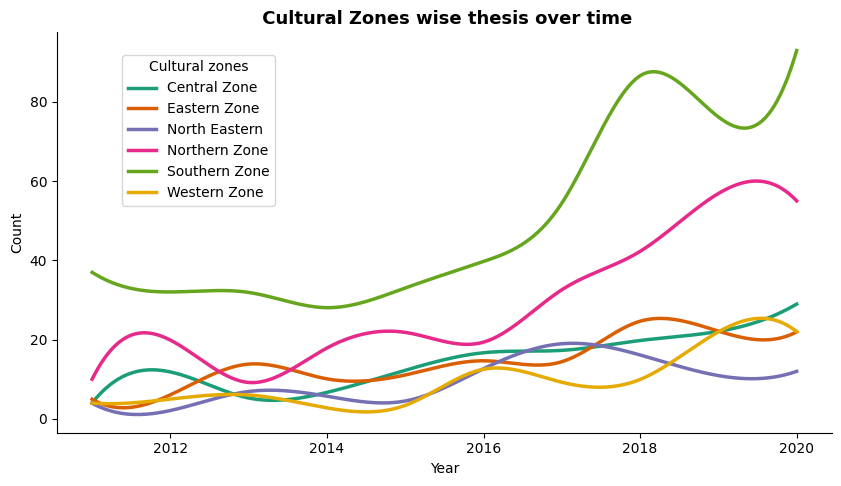

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import UnivariateSpline

# Load the Excel file
file_path = '/content/categorical data of dist, state,india.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Define the plotting function using spline smoothing
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    counted = (series['Year']
                .value_counts()
                .reset_index(name='counts')
                .rename({'index': 'Year'}, axis=1)
                .sort_values('Year', ascending=True))

    xs = counted['Year'].astype(int)  # Ensure the year is in numeric format
    ys = counted['counts']

    # Fit a spline to the data
    spline = UnivariateSpline(xs, ys, s=0.5)  # s is the smoothing factor
    xs_smooth = np.linspace(xs.min(), xs.max(), 500)
    ys_smooth = spline(xs_smooth)

    plt.plot(xs_smooth, ys_smooth, label=series_name, color=palette[series_index % len(palette)], linewidth=2.5)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5.2))
df_sorted = data.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cultural zones')):
    _plot_series(series, series_name, i)
fig.legend(title='Cultural zones', loc='upper right', bbox_to_anchor=(0.35, 0.85))  # Adjust bbox_to_anchor to position the legend
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title(' Cultural Zones wise thesis over time',fontsize=13, fontweight='bold')
plt.show()

<ipython-input-5-e942bd33a888>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Year', y='Level', inner='box', palette='Dark2')


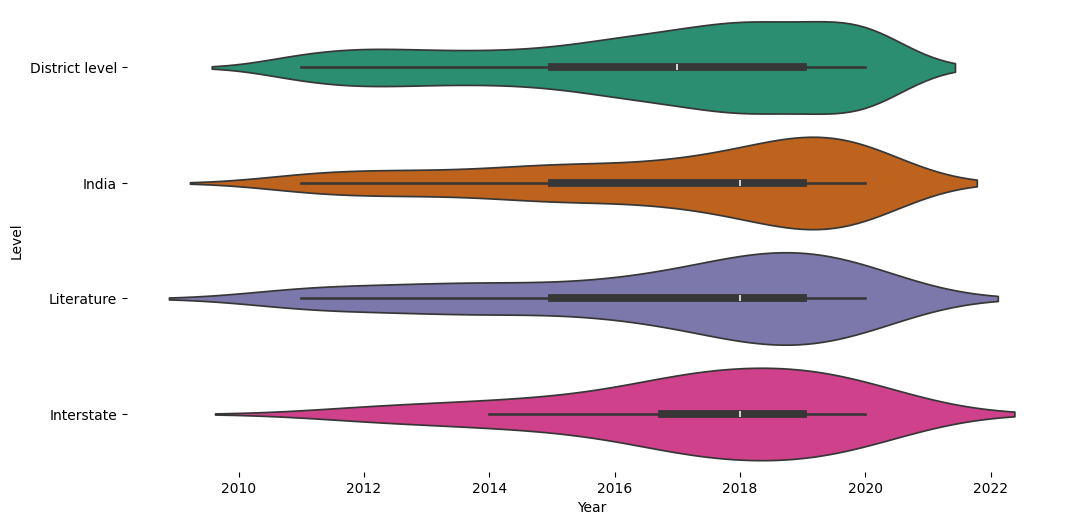

In [ ]:
# @title Level vs Year

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Year', y='Level', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import pandas as pd
import plotly.express as px

def plot_violin_with_plotly(data):
    # Define the custom color mapping for the 'Level' categories using a dictionary
    hex_color_palette = {
        "District level": "#BEEBF4",
        "India": "#D2AAFA",
        "Interstate": "#FFE365",
        "Literature": "#FAAAC8"
    }

    # Create the violin plot using Plotly with inner box plots enabled
    fig = px.violin(data, x='Year', y='Level', color='Level',
                    box=True,  # Enable inner box plots
                    color_discrete_map=hex_color_palette,
                    title='Violin Plot of Level by Year')

    # Update layout to remove grid lines and set title/font size
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Level',
        title_font=dict(size=20, family='bold'),
        xaxis=dict(tickangle=-45, tickfont=dict(size=12, family='bold')),
        yaxis=dict(tickfont=dict(size=12, family='bold')),
        showlegend=True,
        template='simple_white',
        width=800,  # Set the width to a smaller size
        height=600  # Set the height (optional)
    )

    # Show the plot
    fig.show()

# Load the Excel file
file_path = '/content/categorical data of dist, state,india.xlsx'  # Replace with the actual path
data = pd.read_excel(file_path)

# Call the function to plot the violin plot with Plotly
plot_violin_with_plotly(data)


In [ ]:
import pandas as pd
import plotly.express as px

def plot_violin_with_plotly(data):
    # Manually create a color palette that resembles the Spectral color scale
    spectral_palette = [
        '#9E0142',  # Dark Red
        '#F46D43',  # Orange
        '#FDAE61',  # Light Orange
        #'#FFFFBF',  # Yellow
        #'#E6F598',  # Light Green
        '#ABDDA4',  # Green
        '#3288BD',  # Blue
        '#5E4FA2'   # Purple
    ]

    # Create the violin plot using Plotly with inner box plots enabled
    fig = px.violin(data, x='Year', y='Level', color='Level',
                    box=True,  # Enable inner box plots
                    color_discrete_sequence=spectral_palette,
                    title='Violin Plot of Level by Year')

    # Update layout to remove grid lines and set title/font size
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Level',
        title_font=dict(size=20, family='bold'),
        xaxis=dict(tickangle=-45, tickfont=dict(size=12, family='bold')),
        yaxis=dict(tickfont=dict(size=12, family='bold')),
        showlegend=True,
        template='simple_white',
        width=600,  # Set the width to a smaller size
        height=400  # Set the height (optional)
    )


  # Show the plot
    fig.show()




# Load the Excel file
file_path = '/content/categorical data of dist, state,india.xlsx'  # Use the provided file path
data = pd.read_excel(file_path)

# Call the function to plot the violin plot with Plotly
plot_violin_with_plotly(data)

In [ ]:
import pandas as pd
import plotly.express as px

def plot_violin_with_plotly(data):
    # Manually create a color palette that resembles the Spectral color scale
    spectral_palette = [
        '#9E0142',  # Dark Red
        '#F46D43',  # Orange
        '#FDAE61',  # Light Orange
        '#ABDDA4',  # Green
        '#3288BD',  # Blue
        '#5E4FA2'   # Purple
    ]

    # Create the violin plot using Plotly with inner box plots enabled
    fig = px.violin(data, x='Year', y='Level', color='State',
                    box=True,  # Enable inner box plots
                    color_discrete_sequence=spectral_palette,
                    title='Violin Plot of Level by Year and State')

    # Update layout to remove grid lines and set title/font size
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Level',
        title_font=dict(size=20, family='bold'),
        xaxis=dict(tickangle=-45, tickfont=dict(size=12, family='bold')),
        yaxis=dict(tickfont=dict(size=12, family='bold')),
        showlegend=True,
        template='simple_white',
        width=800,  # Set the width
        height=600  # Set the height
    )

    # Show the plot
    fig.show()

# Load the Excel file
file_path = '/content/categorical data of dist, state,india.xlsx'  # Update with the provided file path
data = pd.read_excel(file_path)

# Call the function to plot the violin plot with Plotly
plot_violin_with_plotly(data)


In [ ]:
pip install -U kaleido


In [ ]:
!pip install plotly
!pip install psutil
!pip install orca

In [ ]:
import pandas as pd
import plotly.express as px

def plot_and_save_violin_as_html(data, file_path):
    # Manually create a color palette that resembles the Spectral color scale
    spectral_palette = [
        '#9E0142',  # Dark Red
        '#F46D43',  # Orange
        '#FDAE61',  # Light Orange
        #'#FFFFBF',  # Yellow
        #'#E6F598',  # Light Green
        '#ABDDA4',  # Green
        '#3288BD',  # Blue
        '#5E4FA2'   # Purple
    ]

    # Create the violin plot using Plotly with inner box plots enabled
    fig = px.violin(data, x='Year', y='Level', color='Level',
                    box=True,  # Enable inner box plots
                    color_discrete_sequence=spectral_palette,
                    title='Violin Plot of Level by Year')

    # Update layout to remove grid lines and set title/font size
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Level',
        title_font=dict(size=20, family='bold'),
        xaxis=dict(tickangle=-45, tickfont=dict(size=12, family='bold')),
        yaxis=dict(tickfont=dict(size=12, family='bold')),
        showlegend=True,
        template='simple_white',
        width=600,  # Set the width to a smaller size
        height=400  # Set the height (optional)
    )

    # Save the plot to an HTML file
    fig.write_html(file_path)

# Load the Excel file
file_path = '/content/categorical data of dist, state,india.xlsx'
data = pd.read_excel(file_path)

# Call the function to plot the violin plot with Plotly and save it as an HTML file
output_file_path = 'violin_plot.html'
plot_and_save_violin_as_html(data, output_file_path)


In [ ]:
# Group the data by 'University' and count the number of theses for each
university_counts = data['University'].value_counts()

# Find the university with the highest number of theses
top_university = university_counts.idxmax()
top_university_count = university_counts.max()

top_university, top_university_count


('Andhra University', 64)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


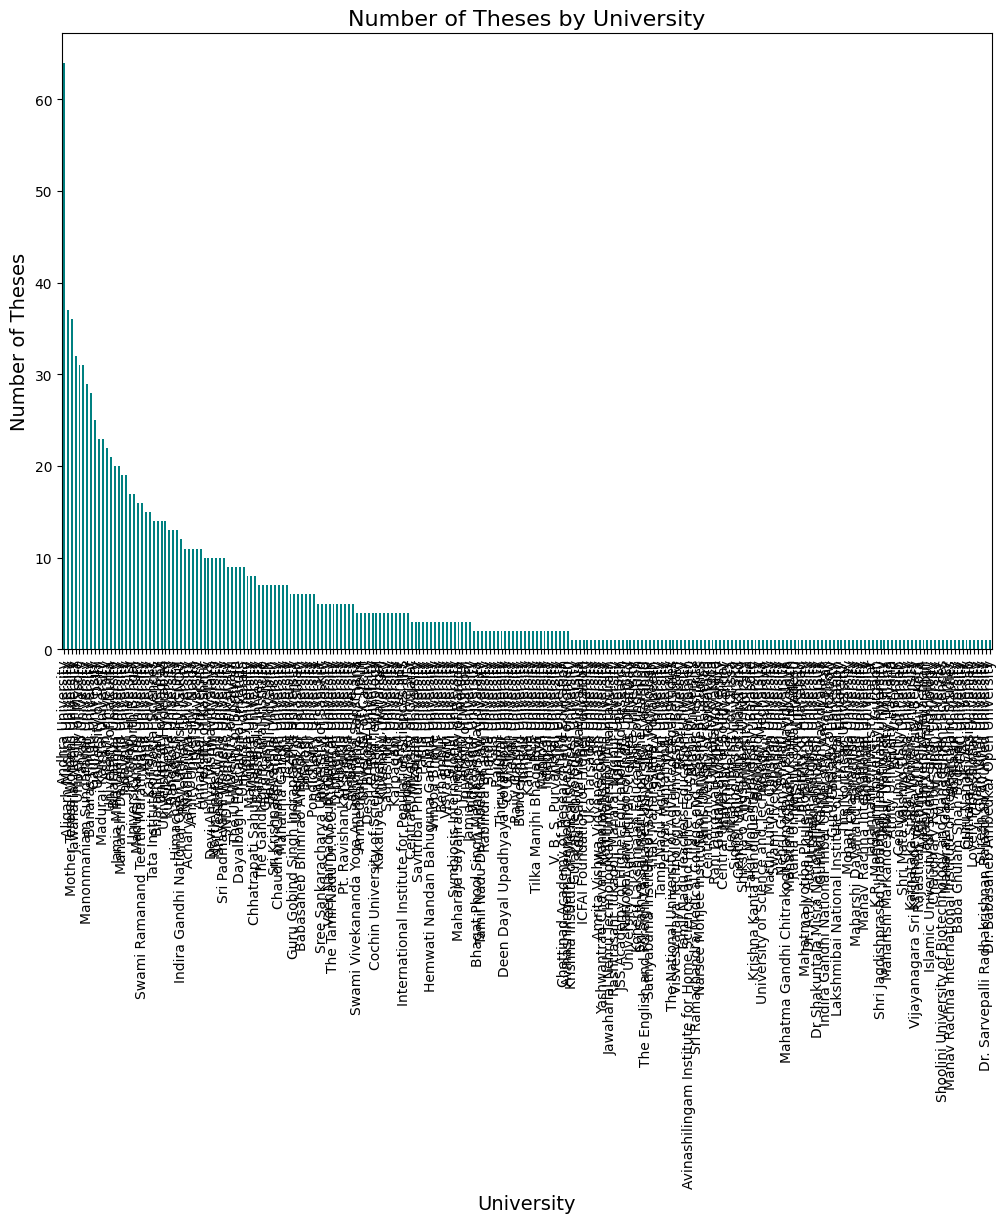

In [ ]:
import matplotlib.pyplot as plt

# Plot the number of theses for each university
plt.figure(figsize=(12, 8))
university_counts.plot(kind='bar', color='teal')

# Adding title and labels
plt.title('Number of Theses by University', fontsize=16)
plt.xlabel('University', fontsize=14)
plt.ylabel('Number of Theses', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


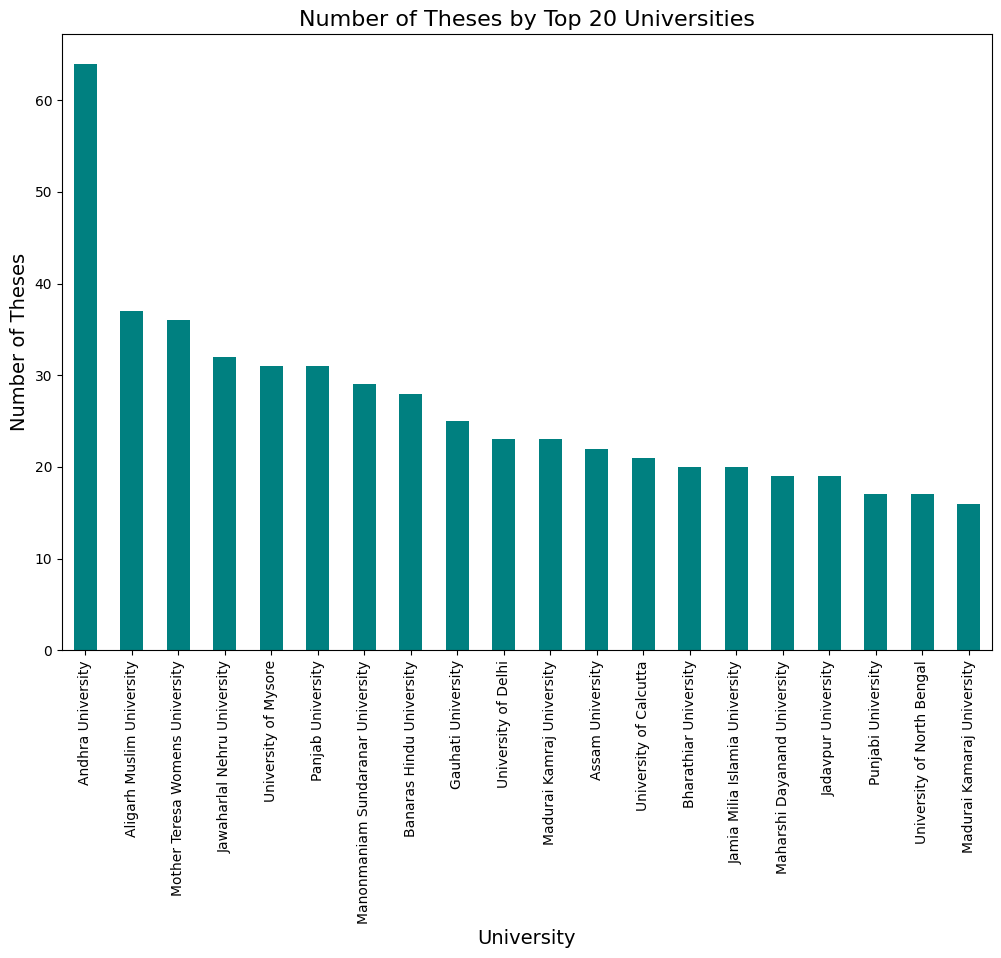

In [ ]:
# Restrict to the top 20 universities
top_20_universities = university_counts.head(20)

# Plot the number of theses for the top 20 universities
plt.figure(figsize=(12, 8))
top_20_universities.plot(kind='bar', color='teal')

# Adding title and labels
plt.title('Number of Theses by Top 20 Universities', fontsize=16)
plt.xlabel('University', fontsize=14)
plt.ylabel('Number of Theses', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


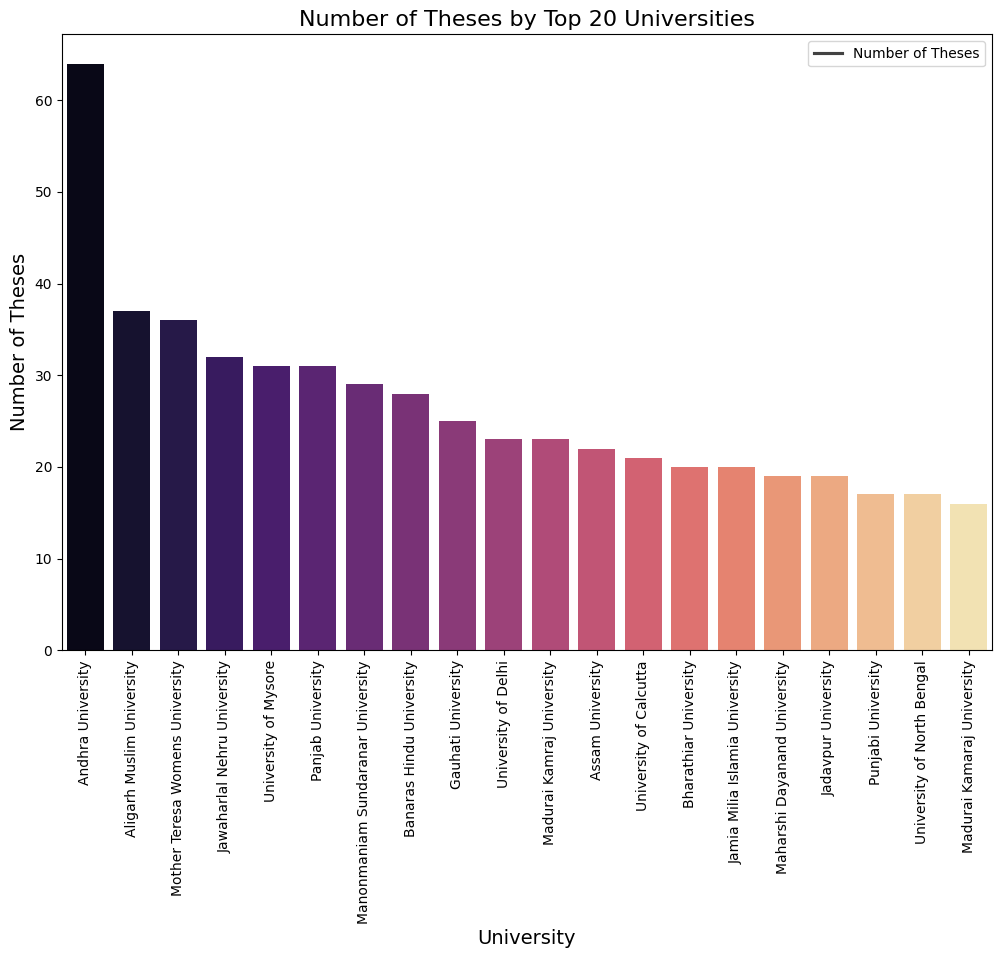

In [ ]:
import seaborn as sns

# Plot the number of theses for the top 20 universities using the 'magma' palette
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_universities.index, y=top_20_universities.values, palette='magma')

# Adding title and labels
plt.title('Number of Theses by Top 20 Universities', fontsize=16)
plt.xlabel('University', fontsize=14)
plt.ylabel('Number of Theses', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Remove grid lines
plt.grid(False)

# Display the legend
plt.legend(['Number of Theses'], loc='upper right')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from itertools import combinations

# Load the Excel file
file_path = '/content/categorical data of dist, state,india.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Define a list of common English stopwords
common_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
    'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did',
    'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
    'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
    'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
    'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
    "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
}

# Extract abstracts from the data
abstracts = data['Abstract'].dropna().tolist()

# Function to preprocess and tokenize abstracts, removing stopwords
def preprocess_abstract_no_stopwords(abstract):
    # Remove punctuation and convert to lower case
    abstract = ''.join([char.lower() if char.isalnum() else ' ' for char in abstract])
    # Tokenize by splitting on whitespace
    words = abstract.split()
    # Remove stopwords
    words = [word for word in words if word not in common_stopwords]
    return words

# Generate word pairs from abstracts and count occurrences, excluding stopwords
abstract_word_pairs = Counter()
for abstract in abstracts:
    words = preprocess_abstract_no_stopwords(abstract)
    abstract_word_pairs.update(combinations(words, 2))

# Convert the word pairs counter to a DataFrame for filtering
abstract_word_pairs_df = pd.DataFrame(abstract_word_pairs.items(), columns=['word_pair', 'count'])
abstract_word_pairs_df[['word1', 'word2']] = pd.DataFrame(abstract_word_pairs_df['word_pair'].tolist(), index=abstract_word_pairs_df.index)
abstract_word_pairs_df = abstract_word_pairs_df[['word1', 'word2', 'count']]

# Filter word pairs with count >= 250
filtered_abstract_pairs_df = abstract_word_pairs_df[abstract_word_pairs_df['count'] >= 5]

# Create a graph from the filtered word pairs without stopwords
G_abstract = nx.Graph()

# Add edges and weights to the graph
for _, row in filtered_abstract_pairs_df.iterrows():
    G_abstract.add_edge(row['word1'], row['word2'], weight=row['count'])

# Set the layout for the graph
pos_abstract = nx.spring_layout(G_abstract, seed=1234)

# Draw the graph with curved edges and no stopwords
plt.figure(figsize=(14, 10))

# Draw nodes
nx.draw_networkx_nodes(G_abstract, pos_abstract, node_size=500, node_color='skyblue')

# Draw curved edges
edges = G_abstract.edges(data=True)
arc_rad = 0.1  # Radius for the curved edges

for (u, v, edata) in edges:
    alpha = edata['weight'] / max(edge_weights)
    nx.draw_networkx_edges(
        G_abstract, pos_abstract, edgelist=[(u, v)],
        width=edata['weight'] / 100, alpha=alpha, edge_color='cyan',
        connectionstyle=f'arc3,rad={arc_rad}'
    )

# Draw labels
nx.draw_networkx_labels(G_abstract, pos_abstract, font_size=10, font_family='sans-serif', font_color='black')

# Remove axis
plt.axis('off')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


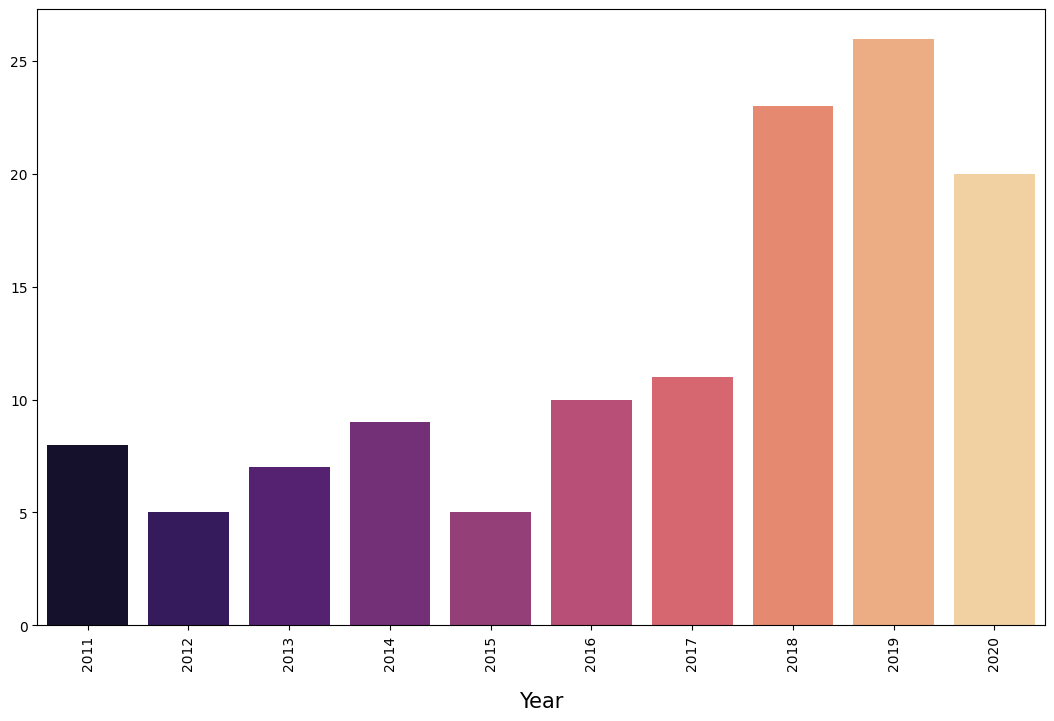

In [ ]:
# Group the data by the 'year' column
groups = data.groupby('year')

# Calculate the size of each group
counts = groups.size()

# Plotting
plt.figure(figsize=(13, 8))
ax = sns.barplot(x=counts.index, y=counts.values, palette="magma")
ax.set_xlabel("Year", fontsize=15, labelpad=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Save the word cloud image to a file
# Save the figure
plt.savefig('my_plot.png')  # Adjust the path as needed

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 640x480 with 0 Axes>

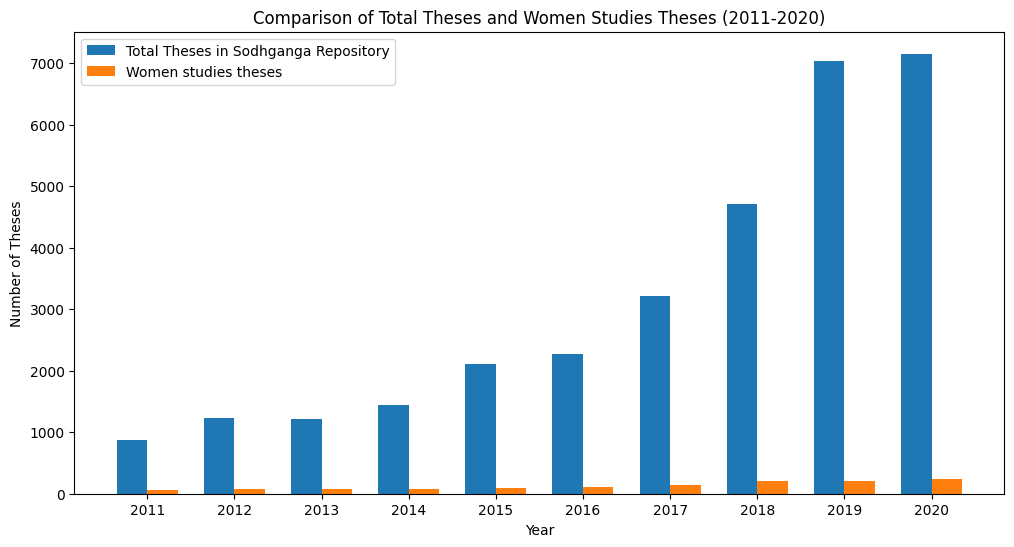

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare the data
data = {
    "Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "Total Theses in Sodhganga Repository": [872, 1228, 1221, 1437, 2117, 2275, 3218, 4717, 7035, 7154],
    "Women studies theses": [64, 77, 73, 72, 85, 117, 145, 200, 211, 233]
}

df = pd.DataFrame(data)

# Step 2: Create the split bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.35
index = range(len(df))

# Plotting the bars
bars1 = ax.bar(index, df["Total Theses in Sodhganga Repository"], bar_width, label="Total Theses in Sodhganga Repository")
bars2 = ax.bar([i + bar_width for i in index], df["Women studies theses"], bar_width, label="Women studies theses")

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Theses')
ax.set_title('Comparison of Total Theses and Women Studies Theses (2011-2020)')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df["Year"])
ax.legend()

# Display the plot
plt.show()


Length of model_list: 19
Length of coherence_values: 19


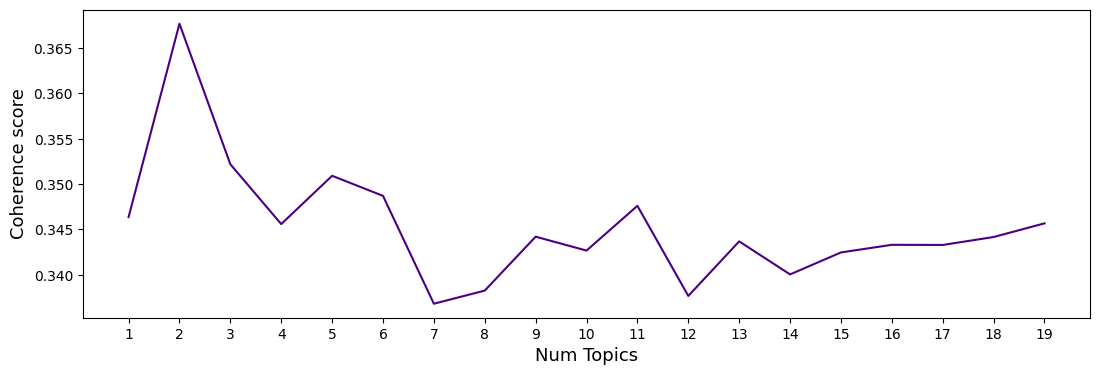

Num Topics = 1 has Coherence Value of 0.346
Num Topics = 2 has Coherence Value of 0.368
Num Topics = 3 has Coherence Value of 0.352
Num Topics = 4 has Coherence Value of 0.346
Num Topics = 5 has Coherence Value of 0.351
Num Topics = 6 has Coherence Value of 0.349
Num Topics = 7 has Coherence Value of 0.337
Num Topics = 8 has Coherence Value of 0.338
Num Topics = 9 has Coherence Value of 0.344
Num Topics = 10 has Coherence Value of 0.343
Num Topics = 11 has Coherence Value of 0.348
Num Topics = 12 has Coherence Value of 0.338
Num Topics = 13 has Coherence Value of 0.344
Num Topics = 14 has Coherence Value of 0.34
Num Topics = 15 has Coherence Value of 0.342
Num Topics = 16 has Coherence Value of 0.343
Num Topics = 17 has Coherence Value of 0.343
Num Topics = 18 has Coherence Value of 0.344
Num Topics = 19 has Coherence Value of 0.346


In [ ]:
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Custom stop words list
custom_stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
    'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",
    'women', 'life'
])

# Load the dataset
data = pd.read_excel('/content/categorical data of dist, state,india.xlsx', sheet_name="Sheet1")

# Preprocess the abstract column
data_processed = [abstract.split() for abstract in data['Recommendation']]

# Function to remove stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in custom_stop_words] for doc in texts]

# Apply the remove_stopwords function
data_processed = remove_stopwords(data_processed)

# Create dictionary
id2word = corpora.Dictionary(data_processed)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_processed]

# Function to compute coherence values
def compute_coherence_values(dictionary, data, corpus, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,
                                        texts=data,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Parameters for computing coherence values
start = 1
limit = 20
step = 1

# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        data=data_processed,
                                                        corpus=corpus,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

# Debugging: Print lengths of model_list and coherence_values
print(f"Length of model_list: {len(model_list)}")
print(f"Length of coherence_values: {len(coherence_values)}")

# Plot coherence values
x = range(start, limit, step)
plt.figure(figsize=(13, 4))
plt.plot(x, coherence_values, color='indigo')
plt.xlabel("Num Topics", fontsize=13)
plt.ylabel("Coherence score", fontsize=13)
plt.xticks(x)
plt.show()

# Print coherence values for each number of topics
for m, cv in zip(x, coherence_values):
    print(f"Num Topics = {m} has Coherence Value of {round(cv, 3)}")




In [ ]:
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
import spacy

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

# Custom stop words list
custom_stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
    'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",
    'women', 'life', 'respond', 'also', 'studi'
])

# Load the dataset
data = pd.read_excel('/content/categorical data of dist, state,india.xlsx', sheet_name="Sheet1")

# Function to remove stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in custom_stop_words] for doc in texts]

# Function to stem words
def stem_words(texts):
    return [[stemmer.stem(word) for word in doc] for doc in texts]

# Function to lemmatize words
def lemmatize_words(texts):
    lemmatized_texts = []
    for doc in texts:
        doc = nlp(" ".join(doc))
        lemmatized_texts.append([token.lemma_ for token in doc])
    return lemmatized_texts



Length of model_list: 5
Length of coherence_values: 5


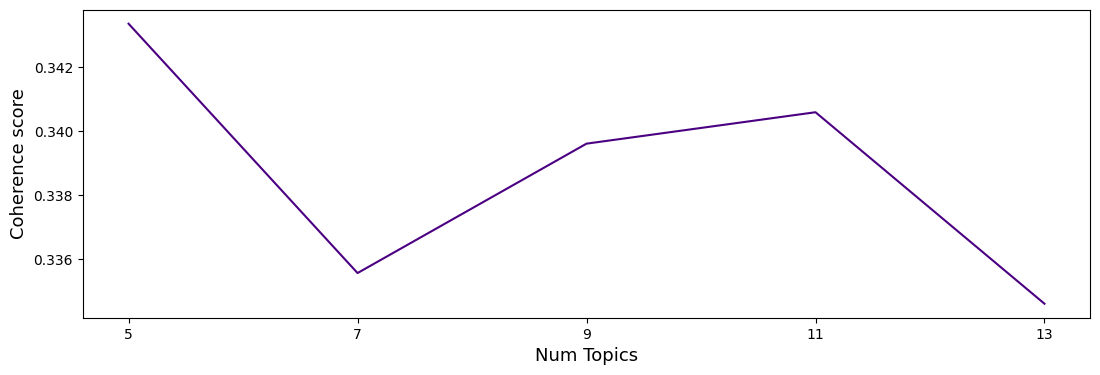

Num Topics = 5 has Coherence Value of 0.343
Num Topics = 7 has Coherence Value of 0.336
Num Topics = 9 has Coherence Value of 0.34
Num Topics = 11 has Coherence Value of 0.341
Num Topics = 13 has Coherence Value of 0.335


In [ ]:
# Preprocess the abstract column
data_processed = [abstract.split() for abstract in data['Recommendation']]

# Apply the remove_stopwords, stemming, and lemmatization functions
data_processed = remove_stopwords(data_processed)
data_processed = stem_words(data_processed)
data_processed = lemmatize_words(data_processed)

# Create dictionary
id2word = corpora.Dictionary(data_processed)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_processed]

# Function to compute coherence values
def compute_coherence_values(dictionary, data, corpus, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                random_state=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,
                                        texts=data,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Parameters for computing coherence values
start =5
limit = 15
step = 2

# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        data=data_processed,
                                                        corpus=corpus,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

# Debugging: Print lengths of model_list and coherence_values
print(f"Length of model_list: {len(model_list)}")
print(f"Length of coherence_values: {len(coherence_values)}")

# Plot coherence values
x = range(start, limit, step)
plt.figure(figsize=(13, 4))
plt.plot(x, coherence_values, color='indigo')
plt.xlabel("Num Topics", fontsize=13)
plt.ylabel("Coherence score", fontsize=13)
plt.xticks(x)
plt.show()

# Print coherence values for each number of topics
for m, cv in zip(x, coherence_values):
    print(f"Num Topics = {m} has Coherence Value of {round(cv, 3)}")


In [ ]:
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
import spacy
from sklearn.model_selection import GridSearchCV

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

# Custom stop words list
custom_stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y',
    'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
    "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",
    'women', 'life', 'also', 'respond', 'per', 'cent', 'percent',
])

# Load the dataset
data = pd.read_excel('/content/categorical data of dist, state,india.xlsx', sheet_name="Sheet1")

# Function to remove stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in custom_stop_words] for doc in texts]

# Function to stem words
def stem_words(texts):
    return [[stemmer.stem(word) for word in doc] for doc in texts]

# Function to lemmatize words
def lemmatize_words(texts):
    lemmatized_texts = []
    for doc in texts:
        doc = nlp(" ".join(doc))
        lemmatized_texts.append([token.lemma_ for token in doc])
    return lemmatized_texts

# Preprocess the abstract column
data_processed = [abstract.split() for abstract in data['Recommendation']]

# Apply the remove_stopwords, stemming, and lemmatization functions
data_processed = remove_stopwords(data_processed)
data_processed = stem_words(data_processed)
data_processed = lemmatize_words(data_processed)

# Create dictionary
id2word = corpora.Dictionary(data_processed)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_processed]

# Function to compute coherence values
def compute_coherence_values(dictionary, data, corpus, num_topics, alpha, beta):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=num_topics,
                                            alpha=alpha,
                                            eta=beta,
                                            random_state=10)
    coherencemodel = CoherenceModel(model=model,
                                    texts=data,
                                    dictionary=dictionary,
                                    coherence='c_v')
    coherence_score = coherencemodel.get_coherence()
    return coherence_score

# Define the parameter grid
param_grid = {
    'num_topics': [8, 10, 12],
    'alpha': ['auto', 'asymmetric', 0.01, 0.1],
    'beta': ['auto', 0.01, 0.1]
}

# GridSearchCV function to perform hyperparameter tuning
def grid_search(dictionary, data, corpus, param_grid):
    best_score = -1
    best_params = {}

    for num_topics in param_grid['num_topics']:
        for alpha in param_grid['alpha']:
            for beta in param_grid['beta']:
                score = compute_coherence_values(dictionary, data, corpus, num_topics, alpha, beta)
                print(f"Num Topics: {num_topics}, Alpha: {alpha}, Beta: {beta}, Coherence Score: {score}")
                if score > best_score:
                    best_score = score
                    best_params = {'num_topics': num_topics, 'alpha': alpha, 'beta': beta}

    return best_params, best_score

# Perform grid search
best_params, best_score = grid_search(id2word, data_processed, corpus, param_grid)

print(f"Best Parameters: {best_params}")
print(f"Best Coherence Score: {best_score}")

# Build the LDA model with the best parameters
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=best_params['num_topics'],
                                            alpha=best_params['alpha'],
                                            eta=best_params['beta'],
                                            random_state=10)

# Display the topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


Num Topics: 8, Alpha: auto, Beta: auto, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: auto, Beta: 0.01, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: auto, Beta: 0.1, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: asymmetric, Beta: auto, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: asymmetric, Beta: 0.01, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: asymmetric, Beta: 0.1, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: 0.01, Beta: auto, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: 0.01, Beta: 0.01, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: 0.01, Beta: 0.1, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: 0.1, Beta: auto, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: 0.1, Beta: 0.01, Coherence Score: 0.33981432235580766


Num Topics: 8, Alpha: 0.1, Beta: 0.1, Coherence Score: 0.33981432235580766


Num Topics: 10, Alpha: auto, Beta: auto, Coherence Score: 0.3443771297338027


Num Topics: 10, Alpha: auto, Beta: 0.01, Coherence Score: 0.3443771297338027


Num Topics: 10, Alpha: auto, Beta: 0.1, Coherence Score: 0.3443771297338027


Num Topics: 10, Alpha: asymmetric, Beta: auto, Coherence Score: 0.34511652174726665


Num Topics: 10, Alpha: asymmetric, Beta: 0.01, Coherence Score: 0.34511652174726665


Num Topics: 10, Alpha: asymmetric, Beta: 0.1, Coherence Score: 0.34511652174726665


Num Topics: 10, Alpha: 0.01, Beta: auto, Coherence Score: 0.3443771297338028


Num Topics: 10, Alpha: 0.01, Beta: 0.01, Coherence Score: 0.3443771297338028


Num Topics: 10, Alpha: 0.01, Beta: 0.1, Coherence Score: 0.3443771297338028


Num Topics: 10, Alpha: 0.1, Beta: auto, Coherence Score: 0.3443771297338027


Num Topics: 10, Alpha: 0.1, Beta: 0.01, Coherence Score: 0.3443771297338027


Num Topics: 10, Alpha: 0.1, Beta: 0.1, Coherence Score: 0.3443771297338027


Num Topics: 12, Alpha: auto, Beta: auto, Coherence Score: 0.3476951234313948


Num Topics: 12, Alpha: auto, Beta: 0.01, Coherence Score: 0.3476951234313948


Num Topics: 12, Alpha: auto, Beta: 0.1, Coherence Score: 0.3476951234313948


Num Topics: 12, Alpha: asymmetric, Beta: auto, Coherence Score: 0.3458208507618336


Num Topics: 12, Alpha: asymmetric, Beta: 0.01, Coherence Score: 0.3458208507618336


Num Topics: 12, Alpha: asymmetric, Beta: 0.1, Coherence Score: 0.3458208507618336


Num Topics: 12, Alpha: 0.01, Beta: auto, Coherence Score: 0.3476951234313948


Num Topics: 12, Alpha: 0.01, Beta: 0.01, Coherence Score: 0.3476951234313948


Num Topics: 12, Alpha: 0.01, Beta: 0.1, Coherence Score: 0.3476951234313948


Num Topics: 12, Alpha: 0.1, Beta: auto, Coherence Score: 0.3476951234313948


Num Topics: 12, Alpha: 0.1, Beta: 0.01, Coherence Score: 0.3476951234313948


Num Topics: 12, Alpha: 0.1, Beta: 0.1, Coherence Score: 0.3476951234313948
Best Parameters: {'num_topics': 12, 'alpha': 'auto', 'beta': 'auto'}
Best Coherence Score: 0.3476951234313948
(0, '0.008*"work" + 0.008*"famili" + 0.008*"group" + 0.006*"studi" + 0.006*"respond" + 0.006*"social" + 0.005*"educ" + 0.005*"make" + 0.005*"member" + 0.005*"find"')
(1, '0.008*"famili" + 0.008*"respond" + 0.008*"studi" + 0.007*"group" + 0.006*"member" + 0.006*"work" + 0.005*"educ" + 0.005*"find" + 0.005*"among" + 0.005*"social"')
(2, '0.008*"studi" + 0.007*"famili" + 0.007*"respond" + 0.007*"work" + 0.006*"find" + 0.006*"social" + 0.005*"among" + 0.005*"member" + 0.005*"group" + 0.005*"educ"')
(3, '0.008*"studi" + 0.007*"work" + 0.007*"group" + 0.006*"find" + 0.005*"signific" + 0.005*"member" + 0.005*"social" + 0.005*"uf" + 0.004*"problem" + 0.004*"particip"')
(4, '0.015*"respond" + 0.009*"studi" + 0.008*"member" + 0.006*"famili" + 0.006*"find" + 0.006*"group" + 0.006*"work" + 0.005*"differ" + 0.005*"uf

In [ ]:
# Identify the optimal model
if coherence_values:
    optimal_index = coherence_values.index(max(coherence_values))
    optimal_model = model_list[optimal_index]
    num_topics_optimal = optimal_model.num_topics

    # Display the topics of the optimal model
    model_topics = optimal_model.show_topics(num_topics=num_topics_optimal, formatted=False)
    for i in range(min(20, num_topics_optimal)):
        print(f"Topic {(model_topics[i][0] + 1)}: {[word for word, prob in model_topics[i][1][:3]]}")
else:
    print("No coherence values were computed. Please check the input data and parameters.")

Topic 1: ['work', 'respond', 'famili']
Topic 2: ['studi', 'famili', 'also']
Topic 3: ['respond', 'work', 'per']
Topic 4: ['work', 'famili', 'respond']
Topic 5: ['respond', 'work', 'find']
Topic 6: ['respond', 'work', 'famili']
Topic 7: ['famili', 'work', 'group']
Topic 8: ['respond', 'percent', 'level']
Topic 9: ['respond', 'work', 'also']
Topic 10: ['respond', 'studi', 'work']
Topic 11: ['studi', 'work', 'respond']
Topic 12: ['studi', 'respond', 'educ']


In [ ]:
!pip install pandas gensim matplotlib pyLDAvis
!pip install pyLDAvis




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualize the topics using pyLDAvis
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import warnings
warnings.simplefilter("ignore", FutureWarning)
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')
count_data = count_vectorizer.fit_transform(data['abstract'])
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components = 20, random_state = 10)
model = lda.fit(count_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(model, count_data, count_vectorizer, mds='tsne')
saved = pyLDAvis.save_html(vis, fileobj = "vis.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: module 'pyLDAvis' has no attribute 'sklearn'

In [ ]:
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
warnings.simplefilter("ignore", FutureWarning)

# Load the dataset
data = pd.read_excel('/content/India.xlsx', sheet_name="Sheet1")

# Define stopwords
stop_words = stopwords.words('english')
custom_stopwords = {'women', 'life', 'one', 'also'}
stop_words.extend(custom_stopwords)

# Preprocess the abstracts
def preprocess(text):
    result = []
    for token in simple_preprocess(text, deacc=True):
        if token not in stop_words:
            result.append(token)
    return result

data['processed'] = data['abstract'].map(preprocess)

# Create Dictionary
id2word = corpora.Dictionary(data['processed'])

# Create Corpus
texts = data['processed']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5,
                                       random_state=10,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, "vis.html")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Topic Prportion**
#     **Calculate**

In [ ]:
# Calculate topic proportions
topic_proportions = [1] * lda_model.num_topics
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic_num, prop in topic_distribution:
        topic_proportions[topic_num] += prop

# Normalize the topic proportions to get percentages
topic_proportions = [prop / len(corpus) * 100 for prop in topic_proportions]

# Print the topic proportions
for i, prop in enumerate(topic_proportions):
    print(f"Topic {i}: {prop:.2f}%")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 18.29%
Topic 1: 29.61%
Topic 2: 13.81%
Topic 3: 17.76%
Topic 4: 22.30%


In [ ]:

# Calculate topic proportions
topic_proportions = [0] * lda_model.num_topics
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic_num, prop in topic_distribution:
        topic_proportions[topic_num] += prop

# Normalize the topic proportions to get percentages
topic_proportions = [prop / len(corpus) * 100 for prop in topic_proportions]

# Pair topic numbers with proportions and sort by proportion in descending order
topic_proportions = [(i + 1, prop) for i, prop in enumerate(topic_proportions)]
topic_proportions.sort(key=lambda x: x[1], reverse=True)

# Print the topic proportions in descending order
for topic_num, prop in topic_proportions:
    print(f"Topic {topic_num}: {prop:.2f}%")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 2: 29.25%
Topic 5: 21.95%
Topic 1: 17.94%
Topic 4: 17.40%
Topic 3: 13.45%


# **Topic modeling and LDAvis visualization, of full code.**
topic porportion and word calculation.
Change the data set to get different result. like dist, state, India, interstate and literature

In [ ]:
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from nltk.corpus import stopwords
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import warnings

# Download stopwords if not already downloaded
nltk.download('stopwords')
warnings.simplefilter("ignore", FutureWarning)

# Load the dataset
data = pd.read_excel('/content/dist.xlsx', sheet_name="Sheet1")

# Define stopwords
stop_words = stopwords.words('english')
custom_stopwords = {'women', 'life', 'one', 'also','per', 'cent', 'rs', 'level', 'study', 'role', 'may', 'different', 'found', 'area', 'making',
                    'respondents', 'percent', 'shgs', 'india', 'among', 'years', 'difference', 'men', 'male', 'time',
                    'total', 'members'}
stop_words.extend(custom_stopwords)

# Preprocess the abstracts
def preprocess(text):
    result = []
    for token in simple_preprocess(text, deacc=True):
        if token not in stop_words:
            result.append(token)
    return result

data['processed'] = data['abstract'].map(preprocess)

# Create Dictionary
id2word = corpora.Dictionary(data['processed'])

# Create Corpus
texts = data['processed']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model with k=5
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5,
                                       random_state=10,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Calculate topic proportions
topic_proportions = [0] * lda_model.num_topics
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic_num, prop in topic_distribution:
        topic_proportions[topic_num] += prop

# Normalize the topic proportions to get percentages
topic_proportions = [prop / len(corpus) * 100 for prop in topic_proportions]

# Pair topic numbers with proportions and sort by proportion in descending order
sorted_topics = sorted(enumerate(topic_proportions), key=lambda x: x[1], reverse=True)

# Print the topic proportions in descending order
for i, (topic_num, prop) in enumerate(sorted_topics, 1):
    print(f"Topic {i}: {prop:.2f}%")






ModuleNotFoundError: No module named 'pyLDAvis'

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, "LDAvis.html")


In [ ]:
# Print the words for topics 3 and 4
topics_3_4 = lda_model.show_topics(num_topics=5, num_words=10)
topics_3_4

# **Statate level analysis**

In [ ]:
#state level analysis
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from nltk.corpus import stopwords
import nltk
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import warnings

# Download stopwords if not already downloaded
nltk.download('stopwords')
warnings.simplefilter("ignore", FutureWarning)

# Load the dataset
data = pd.read_excel('/content/state.xlsx', sheet_name="Sheet1")

# Define stopwords
stop_words = stopwords.words('english')
custom_stopwords =  {'women', 'life', 'one', 'also','per', 'cent', 'rs', 'level', 'study', 'role', 'may', 'different', 'found', 'area', 'making',
                     'respondents', 'percent', 'shgs', 'india', 'among', 'years', 'difference', 'men', 'male', 'time', 'social', 'group', 'groups', 'work', 'self',
                     'local', 'workers', 'west', 'lot', 'ii', 'towards', 'men', 'overcoming', 'like', 'family', 'help', 'significant', 'age', 'majority', 'number',
                     'data', 'non', 'either', 'due', 'take', 'made', 'sector', 'new', 'educated', 'process', 'training', 'research', 'well', 'roy', 'page', 'good',
                     'society', 'various', 'well', 'way', 'chapter', 'class', 'many', 'families', 'working', 'studies', 'role', 'shg', 'advertisements', 'strongly',
                     'doab', 'agree', 'still', 'would', 'half', 'activities', 'areas', 'average', 'income',
                     'case', 'higher', 'economic', 'housholds', 'table', 'important', 'analysis', 'knowledge', 'micro', 'positive', 'thus', 'tribal', 'high', 'participation', 'female',
                     'children', 'low', 'even', 'within', 'need', 'could', 'total', 'members'}
stop_words.extend(custom_stopwords)

# Preprocess the abstracts
def preprocess(text):
    result = []
    for token in simple_preprocess(text, deacc=True):
        if token not in stop_words:
            result.append(token)
    return result

data['processed'] = data['abstract'].map(preprocess)

# Create Dictionary
id2word = corpora.Dictionary(data['processed'])

# Create Corpus
texts = data['processed']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model with k=5
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5,
                                       random_state=10,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Calculate topic proportions
topic_proportions = [0] * lda_model.num_topics
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic_num, prop in topic_distribution:
        topic_proportions[topic_num] += prop

# Normalize the topic proportions to get percentages
topic_proportions = [prop / len(corpus) * 100 for prop in topic_proportions]

# Pair topic numbers with proportions and sort by proportion in descending order
sorted_topics = sorted(enumerate(topic_proportions), key=lambda x: x[1], reverse=True)

# Print the topic proportions in descending order
for i, (topic_num, prop) in enumerate(sorted_topics, 1):
    print(f"Topic {i}: {prop:.2f}%")






/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 64.14%
Topic 2: 10.26%
Topic 3: 9.95%
Topic 4: 8.91%
Topic 5: 6.74%


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, "LDAvis.html")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the words for topics 3 and 4
topics_3_4 = lda_model.show_topics(num_topics=5, num_words=10)
topics_3_4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.017*"education" + 0.013*"domestic" + 0.007*"court" + 0.005*"entrepreneurs" + 0.005*"girls" + 0.004*"hindu" + 0.004*"started" + 0.004*"students" + 0.004*"lower" + 0.004*"middle"'),
 (1,
  '0.017*"harassment" + 0.010*"education" + 0.010*"workplace" + 0.008*"higher" + 0.006*"sexual" + 0.005*"rights" + 0.004*"support" + 0.004*"face" + 0.004*"gender" + 0.004*"situation"'),
 (2,
  '0.006*"political" + 0.005*"health" + 0.005*"experience" + 0.005*"government" + 0.004*"governance" + 0.004*"state" + 0.004*"panchayat" + 0.004*"bengal" + 0.004*"conclusion" + 0.004*"status"'),
 (3,
  '0.010*"roles" + 0.006*"woman" + 0.006*"man" + 0.006*"teachers" + 0.005*"gender" + 0.005*"laws" + 0.004*"changes" + 0.004*"activists" + 0.004*"issues" + 0.004*"central"'),
 (4,
  '0.007*"development" + 0.006*"political" + 0.005*"table" + 0.005*"loan" + 0.005*"programme" + 0.004*"decision" + 0.004*"dalit" + 0.004*"socio" + 0.004*"change" + 0.003*"awareness"')]

In [ ]:
#interstate analysis
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
import warnings

warnings.simplefilter("ignore", FutureWarning)

# Load the dataset
data = pd.read_excel('/content/Interstate.xlsx', sheet_name="Sheet1")

# Manually define common English stopwords
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",
    'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
    "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
    "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
    "won't", 'wouldn', "wouldn't"
]

custom_stopwords =  {'women', 'life', 'one', 'also','per', 'cent', 'rs', 'level', 'study', 'role', 'may', 'different', 'found', 'area', 'making', 'education', 'states', 'media',
                     'respondents', 'percent', 'shgs', 'india', 'among', 'years', 'difference', 'men', 'male', 'time', 'social', 'group', 'groups', 'work', 'self', 'given', 'children',
                     'local', 'workers', 'west', 'lot', 'ii', 'towards', 'men', 'overcoming', 'like', 'family', 'help', 'significant', 'age', 'majority', 'number', 'child', 'care', 'issues',
                     'data', 'non', 'either', 'due', 'take', 'made', 'sector', 'new', 'educated', 'process', 'training', 'research', 'well', 'roy', 'page', 'good',
                     'society', 'various', 'well', 'way', 'chapter', 'class', 'many', 'families', 'working', 'studies', 'role', 'shg', 'advertisements', 'strongly',
                     'doab', 'agree', 'still', 'would', 'half', 'activities', 'areas', 'average', 'income', 'nan', 'state', 'said', 'family', 'families', 'male', 'part', 'index', 'percent',
                     'case', 'higher', 'economic', 'housholds', 'table', 'important', 'analysis', 'knowledge', 'micro', 'positive', 'thus', 'tribal', 'high', 'participation', 'female',
                     'children', 'low', 'even', 'within', 'need', 'could', 'total', 'members'}
stop_words.extend(custom_stopwords)

# Clean the abstracts column
data['abstract'] = data['abstract'].astype(str)

# Preprocess the abstracts
def preprocess(text):
    result = []
    for token in simple_preprocess(text, deacc=True):
        if token not in stop_words:
            result.append(token)
    return result

data['processed'] = data['abstract'].map(preprocess)

# Create Dictionary
id2word = corpora.Dictionary(data['processed'])

# Create Corpus
texts = data['processed']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model with k=5
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5,
                                       random_state=10,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Calculate topic proportions
topic_proportions = [0] * lda_model.num_topics
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic_num, prop in topic_distribution:
        topic_proportions[topic_num] += prop

# Normalize the topic proportions to get percentages
topic_proportions = [prop / len(corpus) * 100 for prop in topic_proportions]

# Pair topic numbers with proportions and sort by proportion in descending order
sorted_topics = sorted(enumerate(topic_proportions), key=lambda x: x[1], reverse=True)

# Print the topic proportions in descending order
for i, (topic_num, prop) in enumerate(sorted_topics, 1):
    print(f"Topic {i}: {prop:.2f}%")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/ldamodel.py:847: RuntimeWarning: divide by zero encountered in scalar divide
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


Topic 1: 21.05%
Topic 2: 19.90%
Topic 3: 19.71%
Topic 4: 19.69%
Topic 5: 19.65%


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, "LDAvis.html")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#India analysis
import pandas as pd
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
import warnings

warnings.simplefilter("ignore", FutureWarning)

# Load the dataset
data = pd.read_excel('/content/India.xlsx', sheet_name="Sheet1")

# Manually define common English stopwords
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",
    'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
    "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
    "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
    "won't", 'wouldn', "wouldn't"
]

custom_stopwords =  {'women', 'life', 'one', 'also','per', 'cent', 'rs', 'level', 'study', 'role', 'may', 'different', 'found', 'area', 'making', 'education', 'states', 'media',
                     'respondents', 'percent', 'shgs', 'india', 'among', 'years', 'difference', 'men', 'male', 'time', 'social', 'group', 'groups', 'work', 'self', 'given', 'children',
                     'local', 'workers', 'west', 'lot', 'ii', 'towards', 'men', 'overcoming', 'like', 'family', 'help', 'significant', 'age', 'majority', 'number', 'child', 'care', 'issues',
                     'data', 'non', 'either', 'due', 'take', 'made', 'sector', 'new', 'educated', 'process', 'training', 'research', 'well', 'roy', 'page', 'good', 'mean', 'value', 'job',
                     'society', 'various', 'well', 'way', 'chapter', 'class', 'many', 'families', 'working', 'studies', 'role', 'shg', 'advertisements', 'strongly', 'resource', 'resources',
                     'domentic', 'laws', 'pcos', 'act', 'et', 'al', 'rural', 'sex', 'students'
                     'doab', 'agree', 'still', 'would', 'half', 'activities', 'areas', 'average', 'income', 'nan', 'state', 'said', 'family', 'families', 'male', 'part', 'index', 'percent',
                     'case', 'higher', 'economic', 'housholds', 'table', 'important', 'analysis', 'knowledge', 'micro', 'positive', 'thus', 'tribal', 'high', 'participation', 'female',
                     'children', 'low', 'even', 'within', 'need', 'could', 'total', 'members'}
stop_words.extend(custom_stopwords)

# Clean the abstracts column
data['abstract'] = data['abstract'].astype(str)

# Preprocess the abstracts
def preprocess(text):
    result = []
    for token in simple_preprocess(text, deacc=True):
        if token not in stop_words:
            result.append(token)
    return result

data['processed'] = data['abstract'].map(preprocess)

# Create Dictionary
id2word = corpora.Dictionary(data['processed'])

# Create Corpus
texts = data['processed']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model with k=5
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=5,
                                       random_state=10,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Calculate topic proportions
topic_proportions = [0] * lda_model.num_topics
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic_num, prop in topic_distribution:
        topic_proportions[topic_num] += prop

# Normalize the topic proportions to get percentages
topic_proportions = [prop / len(corpus) * 100 for prop in topic_proportions]

# Pair topic numbers with proportions and sort by proportion in descending order
sorted_topics = sorted(enumerate(topic_proportions), key=lambda x: x[1], reverse=True)

# Print the topic proportions in descending order
for i, (topic_num, prop) in enumerate(sorted_topics, 1):
    print(f"Topic {i}: {prop:.2f}%")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1: 39.09%
Topic 2: 24.50%
Topic 3: 14.22%
Topic 4: 12.81%
Topic 5: 9.38%


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, "LDAvis.html")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **T-SNE use**

In [ ]:
import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore", FutureWarning)

# Load the dataset
data = pd.read_excel('/content/India.xlsx', sheet_name="Sheet1")

# Manually define common English stopwords
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",
    'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
    "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
    "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
    "won't", 'wouldn', "wouldn't"
]

custom_stopwords =  {'women', 'life', 'one', 'also','per', 'cent', 'rs', 'level', 'study', 'role', 'may', 'different', 'found', 'area', 'making', 'education', 'states', 'media',
                     'respondents', 'percent', 'shgs', 'india', 'among', 'years', 'difference', 'men', 'male', 'time', 'social', 'group', 'groups', 'work', 'self', 'given', 'children',
                     'local', 'workers', 'west', 'lot', 'ii', 'towards', 'men', 'overcoming', 'like', 'family', 'help', 'significant', 'age', 'majority', 'number', 'child', 'care', 'issues',
                     'data', 'non', 'either', 'due', 'take', 'made', 'sector', 'new', 'educated', 'process', 'training', 'research', 'well', 'roy', 'page', 'good', 'mean', 'value', 'job',
                     'society', 'various', 'well', 'way', 'chapter', 'class', 'many', 'families', 'working', 'studies', 'role', 'shg', 'advertisements', 'strongly', 'resource', 'resources',
                     'domentic', 'laws', 'pcos', 'act', 'et', 'al', 'rural', 'sex', 'students'
                     'doab', 'agree', 'still', 'would', 'half', 'activities', 'areas', 'average', 'income', 'nan', 'state', 'said', 'family', 'families', 'male', 'part', 'index', 'percent',
                     'case', 'higher', 'economic', 'housholds', 'table', 'important', 'analysis', 'knowledge', 'micro', 'positive', 'thus', 'tribal', 'high', 'participation', 'female',
                     'children', 'low', 'even', 'within', 'need', 'could', 'total', 'members'}
stop_words.extend(custom_stopwords)

# Clean the abstracts column
data['abstract'] = data['abstract'].astype(str)

# Preprocess the abstracts
def preprocess(text):
    result = []
    for token in simple_preprocess(text, deacc=True):
        if token not in stop_words:
            result.append(token)
    return result

data['processed'] = data['abstract'].map(preprocess)

# Create Dictionary
id2word = corpora.Dictionary(data['processed'])

# Create Corpus
texts = data['processed']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model with k=5
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=10,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Extract topic distribution for each document
topic_distributions = []
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    topic_distributions.append([prop for topic_num, prop in topic_distribution])

topic_distributions = np.array(topic_distributions)



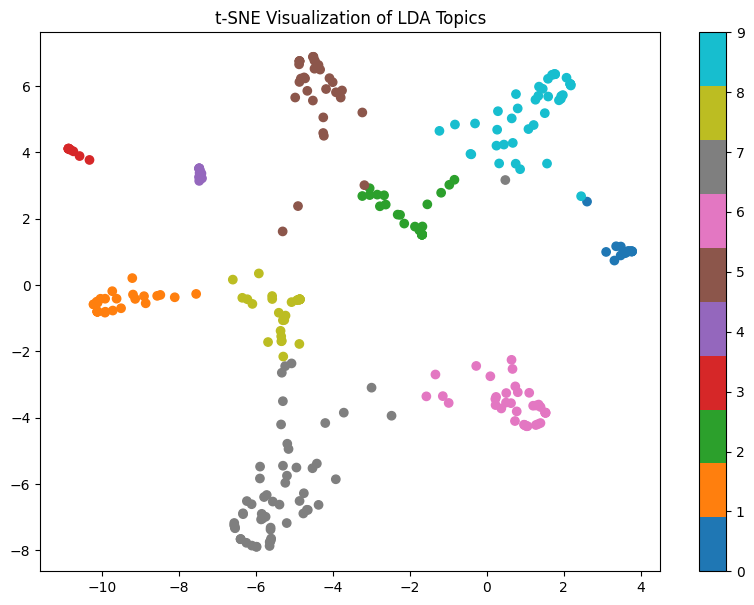

In [ ]:

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=50, learning_rate=50, n_iter=2000, random_state=0, angle=0.75)
tsne_vectors = tsne_model.fit_transform(topic_distributions)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c=np.argmax(topic_distributions, axis=1), cmap='tab10')
plt.colorbar()
plt.title('t-SNE Visualization of LDA Topics')
plt.show()

# **ADD Stemming and lemitization process**

In [ ]:
import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.io import output_notebook
import warnings
import nltk
from nltk.stem.porter import PorterStemmer
import spacy

warnings.simplefilter("ignore", FutureWarning)

# Load the dataset
data = pd.read_excel('/content/categorical data of dist, state,india.xlsx', sheet_name="Sheet1")

# Manually define common English stopwords
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'herself', 'it', "it's", 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",
    'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
    "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
    "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
    "one", "also","per", "cent", "rs", "may", "different", "found",
    "won't", 'wouldn', "wouldn't"
]

custom_stopwords =  {'women',  'one', 'also','per', 'cent', 'rs',  'may', 'area', 'making', 'value', 'score', 'result', 'medium', 'purchase', 'valu', 'ith', 'iof', 'beedi', 'iin', 'iand', 'size', 'ito', '_', 'business', 'product',
                     'respondents', 'percent', 'india', 'among', 'years', 'difference', 'men',  'given', 'inform', 'information', 'custom', 'customer', 'show', 'write', 'common', 'commun', 'indian' ,'woman', 'report', 'men', 'male',
                     'local', 'workers', 'west', 'lot', 'ii', 'towards', 'men', 'overcoming', 'like', 'help', 'significant', 'age', 'majority', 'number', 'statist', 'statistics', 'college', 'colleg', 'parent', 'university', 'teach', 'teachnig',
                     'data', 'non', 'either', 'due', 'take', 'made', 'sector', 'new', 'educated', 'process', 'training', 'research', 'well', 'roy', 'page', 'good', 'mean', 'use', 'association', 'factor', 'factors',
                     'society', 'various', 'well', 'way', 'chapter', 'class', 'many', 'working', 'studies', 'role', 'shg', 'advertisements', 'strongly', 'resources', 'hypothesi', 'shows',
                      'pcos', 'act', 'et', 'al', 'study', 'studi', 'use', 'variabl', 'variable', 'commun', 'communication', 'womens', 'brand', 'variabls', 'responds',
                     'doab', 'agree', 'still', 'would', 'half', 'activities', 'areas', 'average',  'nan', 'state', 'said', 'part', 'index', 'percent',
                      'table', 'important', 'analysis',  'micro', 'positive', 'thus', 'high', 'female', 'library', 'librari', 'test', 'factor', 'level', 'writes'
                      'low', 'even', 'within', 'need', 'could', 'total', 'members'}
stop_words.extend(custom_stopwords)


In [ ]:
# Initialize stemmer
stemmer = PorterStemmer()

# Load spacy model
nlp = spacy.load('en_core_web_sm')

# Stemming function
def stem(text):
    return [stemmer.stem(word) for word in text]

# Lemmatization function
def lemmatize(text):
    doc = nlp(" ".join(text))
    return [token.lemma_ for token in doc]

# Preprocess function with stemming and lemmatization
def preprocess(text):
    result = []
    for token in simple_preprocess(text, deacc=True):
        if token not in stop_words:
            result.append(token)
    result = stem(result)
    result = lemmatize(result)
    return result

In [ ]:
# Clean the abstracts column
data['Recommendation'] = data['Recommendation'].astype(str)

# Apply the preprocess function
data['processed'] = data['Recommendation'].map(preprocess)

# Create Dictionary
id2word = corpora.Dictionary(data['processed'])

# Create Corpus
texts = data['processed']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Build LDA model with k=5
#takes 2 min
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=10,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Extract topic distribution for each document
topic_distributions = []
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    topic_distributions.append([prop for topic_num, prop in topic_distribution])

topic_distributions = np.array(topic_distributions)


In [ ]:
# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=50, learning_rate=50, n_iter=2000,
                  random_state=0, angle=0.75)
tsne_vectors = tsne_model.fit_transform(topic_distributions)

# Define helper functions
def get_top_n_words(n, lda_model):
    top_words = []
    for topic in range(lda_model.num_topics):
        words = [word for word, prob in lda_model.show_topic(topic, topn=n)]
        top_words.append(", ".join(words))
    return top_words

def get_mean_topic_vectors(topic_keys, tsne_vectors, num_topics):
    mean_topic_vectors = []
    for t in range(num_topics):
        vectors_in_topic = tsne_vectors[np.array(topic_keys) == t]
        mean_vector = vectors_in_topic.mean(axis=0)
        mean_topic_vectors.append(mean_vector)
    return mean_topic_vectors

# Extract top words for each topic
top_3_words_lda = get_top_n_words(3, lda_model)

# Determine the most probable topic for each document
lda_keys = np.argmax(topic_distributions, axis=1)

# Calculate mean topic vectors
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_vectors, lda_model.num_topics)

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
import numpy as np

output_notebook()

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])
colormap = colormap[:lda_model.num_topics]

plot = figure(width=900, height=700)
plot.scatter(x=tsne_vectors[:, 0], y=tsne_vectors[:, 1], color=colormap[lda_keys], size=6, alpha=1.5)  # Adjust the size value as needed

# Remove axis labels, ticks, grid lines, and title
plot.xgrid.visible = False
plot.ygrid.visible = False

show(plot)

In [ ]:
# Calculate topic proportions
topic_proportions = [0] * lda_model.num_topics
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    for topic_num, prop in topic_distribution:
        topic_proportions[topic_num] += prop

# Normalize the topic proportions to get percentages
topic_proportions = [prop / len(corpus) * 100 for prop in topic_proportions]

# Pair topic numbers with proportions and sort by proportion in descending order
topic_proportions = [(i + 1, prop) for i, prop in enumerate(topic_proportions)]
topic_proportions.sort(key=lambda x: x[1], reverse=True)

# Print the topic proportions in descending order
for topic_num, prop in topic_proportions:
    print(f"Topic {topic_num}: {prop:.2f}%")

Topic 1: 15.61%
Topic 10: 12.03%
Topic 8: 11.76%
Topic 2: 11.72%
Topic 7: 9.70%
Topic 4: 9.48%
Topic 3: 8.18%
Topic 5: 7.55%
Topic 6: 7.06%
Topic 9: 6.91%


In [ ]:
# Print the words for topics 3 and 4
topics_3_4 = lda_model.show_topics(num_topics=10, num_words=10)
topics_3_4

[(0,
  '0.010*"cultur" + 0.008*"social" + 0.007*"life" + 0.007*"ident" + 0.007*"gender" + 0.006*"dalit" + 0.005*"self" + 0.005*"tradit" + 0.005*"write" + 0.004*"commun"'),
 (1,
  '0.019*"entrepreneur" + 0.012*"govern" + 0.012*"develop" + 0.010*"provid" + 0.009*"problem" + 0.008*"servic" + 0.008*"scheme" + 0.007*"product" + 0.006*"market" + 0.006*"industri"'),
 (2,
  '0.040*"health" + 0.010*"care" + 0.008*"awar" + 0.008*"rural" + 0.007*"child" + 0.007*"famili" + 0.007*"reproduct" + 0.007*"problem" + 0.007*"food" + 0.007*"report"'),
 (3,
  '0.033*"polit" + 0.024*"particip" + 0.011*"empower" + 0.011*"elect" + 0.010*"right" + 0.009*"social" + 0.009*"panchayat" + 0.009*"govern" + 0.008*"develop" + 0.008*"decis"'),
 (4,
  '0.045*"work" + 0.022*"employe" + 0.020*"famili" + 0.018*"life" + 0.017*"job" + 0.009*"stress" + 0.009*"manag" + 0.009*"support" + 0.009*"balanc" + 0.009*"satisfact"'),
 (5,
  '0.024*"group" + 0.019*"student" + 0.017*"variabl" + 0.012*"teacher" + 0.008*"person" + 0.008*"sel

In [ ]:
# Plot t-SNE results using Bokeh
output_notebook()
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])
colormap = colormap[:lda_model.num_topics]

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(lda_model.num_topics), width=900, height=700)
plot.scatter(x=tsne_vectors[:, 0], y=tsne_vectors[:, 1], color=colormap[lda_keys])

for t in range(lda_model.num_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1],
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

# **After using PCA model.**\\

---



---



In [ ]:
import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import gensim
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.io import output_notebook
import warnings

warnings.simplefilter("ignore", FutureWarning)

# Load the dataset
data = pd.read_excel('/content/categorical data of dist, state,india.xlsx', sheet_name="Sheet1")

# Manually define common English stopwords
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",
    'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
    "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
    "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
    "won't", 'wouldn', "wouldn't"
]

custom_stopwords =  {'women', 'one', 'also','per', 'cent', 'rs', 'level', 'study', 'role', 'may', 'different', 'found', 'area', 'making', 'education', 'states', 'media',
                     'respondents', 'percent', 'shgs', 'among', 'years', 'difference', 'men', 'male',  'groups',   'given', 'children',
                     'local', 'workers', 'west', 'lot', 'ii', 'towards', 'men', 'overcoming', 'like', 'help', 'significant', 'age', 'majority', 'number', 'child', 'care', 'issues',
                     'data', 'non', 'either', 'due', 'take', 'made', 'new', 'educated', 'process', 'training', 'research', 'well', 'roy', 'page', 'good', 'mean', 'value',
                     'society', 'various', 'well', 'way', 'chapter', 'class', 'many', 'families', 'working', 'studies', 'role', 'shg', 'advertisements', 'strongly', 'resource', 'resources',
                     'domentic', 'laws', 'pcos', 'act', 'et', 'al',  'students',
                     'doab', 'agree', 'still', 'would', 'half', 'activities', 'areas', 'average', 'income', 'nan', 'state', 'said', 'family', 'families', 'male', 'part', 'index', 'percent',
                      'table', 'important', 'analysis', 'knowledge', 'micro', 'positive', 'thus', 'tribal', 'high', 'participation', 'female',
                     'children', 'low', 'even', 'within', 'need', 'could', 'total', 'members'}
stop_words.extend(custom_stopwords)

# Clean the Recommendations column
data['Recommendation'] = data['Recommendation'].astype(str)

# Preprocess the Recommendation
def preprocess(text):
    result = []
    for token in simple_preprocess(text, deacc=True):
        if token not in stop_words:
            result.append(token)
    return result

data['processed'] = data['Recommendation'].map(preprocess)

# Create Dictionary
id2word = corpora.Dictionary(data['processed'])

# Create Corpus
texts = data['processed']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model with k=10 (increase the number of topics)
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=10,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Extract topic distribution for each document
topic_distributions = []
for doc in corpus:
    topic_distribution = lda_model.get_document_topics(doc, minimum_probability=0)
    topic_distributions.append([prop for topic_num, prop in topic_distribution])

topic_distributions = np.array(topic_distributions)



In [ ]:
# Apply PCA before t-SNE
pca_model = PCA(n_components=5)
pca_vectors = pca_model.fit_transform(topic_distributions)

# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=40, learning_rate=100, n_iter=2000, random_state=0, angle=0.75)
tsne_vectors = tsne_model.fit_transform(pca_vectors)

# Define helper functions
def get_top_n_words(n, lda_model):
    top_words = []
    for topic in range(lda_model.num_topics):
        words = [word for word, prob in lda_model.show_topic(topic, topn=n)]
        top_words.append(", ".join(words))
    return top_words

def get_mean_topic_vectors(topic_keys, tsne_vectors, num_topics):
    mean_topic_vectors = []
    for t in range(num_topics):
        vectors_in_topic = tsne_vectors[np.array(topic_keys) == t]
        mean_vector = vectors_in_topic.mean(axis=0)
        mean_topic_vectors.append(mean_vector)
    return mean_topic_vectors

# Extract top words for each topic
top_3_words_lda = get_top_n_words(3, lda_model)

# Determine the most probable topic for each document
lda_keys = np.argmax(topic_distributions, axis=1)

# Calculate mean topic vectors
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_vectors, lda_model.num_topics)

# Plot t-SNE results using Bokeh
output_notebook()
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])
colormap = colormap[:lda_model.num_topics]

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(lda_model.num_topics), width=700, height=700)
plot.scatter(x=tsne_vectors[:, 0], y=tsne_vectors[:, 1], color=colormap[lda_keys])

for t in range(lda_model.num_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1],
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)


# **Silhouette-Score**
Silhouette Score Range: The score ranges from -1 to 1, where:

*   1 indicates perfect clustering.
*   0 indicates overlapping clusters.
Negative values indicate that samples might have been assigned to the wrong clusters.
Score of 0.36: This score suggests that the clusters are moderately well-separated. It's not poor, but it's not excellent either. It indicates some overlap between clusters.



In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(tsne_vectors, lda_keys)
print(f"The average silhouette score is: {silhouette_avg:.2f}")


The average silhouette score is: 0.36


# **Bullet Bar**

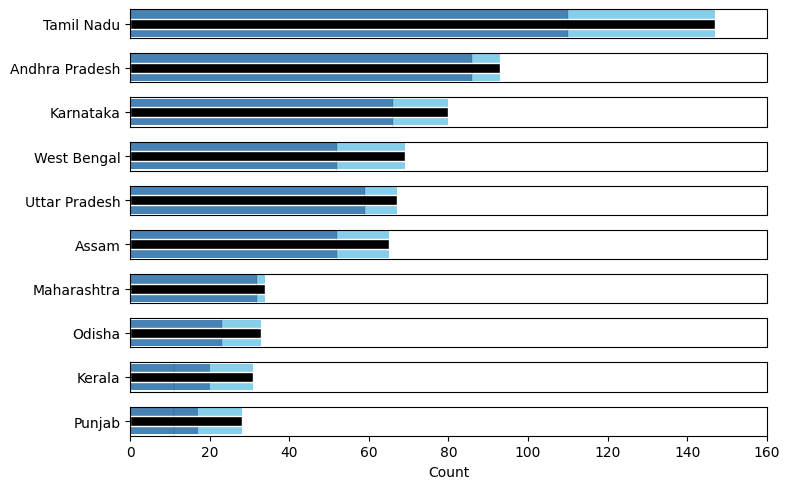

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
states = ["Tamil Nadu", "Andhra Pradesh", "Karnataka", "West Bengal", "Uttar Pradesh",
          "Assam", "Maharashtra", "Odisha", "Kerala", "Punjab"]
district = [110, 86, 66, 52, 59, 52, 32, 23, 11, 11]
entire_state = [37, 7, 14, 17, 8, 13, 2, 10, 20, 17]
total = [147, 93, 80, 69, 67, 65, 34, 33, 31, 28]

# Function to create bullet graph
def bullet_graph(ax, title, performance, target, ranges, color='black'):
    ax.barh(title, ranges[2], color='skyblue')
    ax.barh(title, ranges[1], color='steelblue')
    ax.barh(title, ranges[0], color='steelblue')
    ax.barh(title, performance, color=color, height=0.3, edgecolor='white')
    ax.axvline(target, color=color, linewidth=.1)
    ax.set_xlim(0, 160)  # Set the x-axis limit to 160
    if title == "Punjab":
        ax.set_xlabel('Count')
    else:
        ax.set_xticks([])

# Plot settings
fig, axes = plt.subplots(len(states), figsize=(8, 5))

for i, state in enumerate(states):
    bullet_graph(axes[i], state, total[i], district[i], [district[i], entire_state[i], total[i]])

plt.tight_layout()
plt.show()


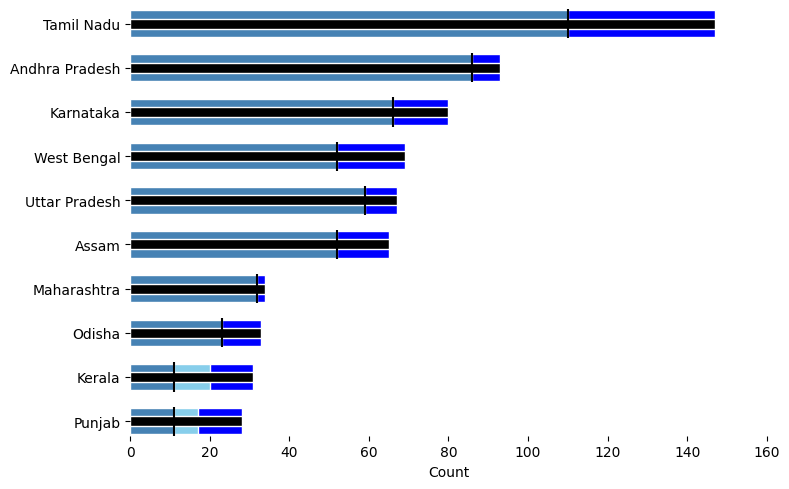

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
states = ["Tamil Nadu", "Andhra Pradesh", "Karnataka", "West Bengal", "Uttar Pradesh",
          "Assam", "Maharashtra", "Odisha", "Kerala", "Punjab"]
district = [110, 86, 66, 52, 59, 52, 32, 23, 11, 11]
entire_state = [37, 7, 14, 17, 8, 13, 2, 10, 20, 17]
total = [147, 93, 80, 69, 67, 65, 34, 33, 31, 28]

# Function to create bullet graph
def bullet_graph(ax, title, performance, target, ranges, color='black'):
    ax.barh(title, ranges[2], color='blue', edgecolor='white')
    ax.barh(title, ranges[1], color='skyblue', edgecolor='white')
    ax.barh(title, ranges[0], color='steelblue', edgecolor='white')
    ax.barh(title, performance, color=color, height=0.3, edgecolor='white')
    ax.axvline(target, color=color, linewidth=1.5)
    ax.set_xlim(0, 160)  # Set the x-axis limit to 160
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if title == "Punjab":
        ax.set_xlabel('Count')
    else:
        ax.set_xticks([])

# Plot settings
fig, axes = plt.subplots(len(states), figsize=(8, 5))

for i, state in enumerate(states):
    bullet_graph(axes[i], state, total[i], district[i], [district[i], entire_state[i], total[i]])

plt.tight_layout()
plt.show()


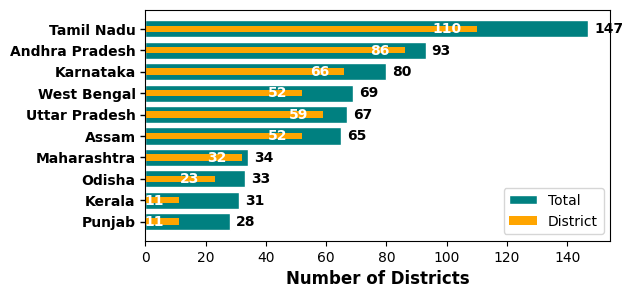

In [ ]:
import matplotlib.pyplot as plt

# Data
states = ["Tamil Nadu", "Andhra Pradesh", "Karnataka", "West Bengal", "Uttar Pradesh",
          "Assam", "Maharashtra", "Odisha", "Kerala", "Punjab"]
district = [110, 86, 66, 52, 59, 52, 32, 23, 11, 11]
entire_state = [37, 7, 14, 17, 8, 13, 2, 10, 20, 17]
total = [147, 93, 80, 69, 67, 65, 34, 33, 31, 28]

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))

# Horizontal bar plot for total
ax.barh(states, total, color='teal', edgecolor='white', label='Total', height=0.8)

# Horizontal bar plot for district
ax.barh(states, district, color='orange', edgecolor='none', label='District', height=0.3)

# Adding data labels
for i in range(len(states)):
    ax.text(total[i] + 2, i, str(total[i]), va='center', ha='left', color='black',  fontsize=10,fontweight='bold')
    ax.text(district[i] - 5, i, str(district[i]), va='center', ha='right', color='white',  fontsize=10,fontweight='bold')

# Adding labels and title
ax.set_xlabel('Number of Districts',  fontsize=12,fontweight='bold')
#ax.set_title('Bullet Graph of Districts by State')

# Setting y-tick labels to bold
ax.tick_params(axis='y', labelsize=10, labelrotation=0, labelcolor='black', which='both', width=1)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')

# Add legend
ax.legend()

# Invert y-axis to have the states in the given order
ax.invert_yaxis()

# Show plot
plt.show()


# **NCW data Analysis** // State-Wise Report of the Complaints Received by NCW in the 2011

---

\

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('/content/State-wise_Yearly_Data.xlsx') #my file

data.head()

State  2011  2012  2013   2014   2015   2016  2017   2018   2019  \
0   Uttar Pradesh  8821  9384  9386  19774  14391  11000  7949  11603  11358   
1           Delhi  2706  2858  3493   3985   2763   2030  1598   1850   1874   
2         Haryana  1086  1249  1364   1832   1249   1057   845   1239   1144   
3       Rajasthan  1421  1448  1339   1605   1045    777   615    821    764   
4  Madhya Pradesh   689   904   789   1183    639    583   431    535    560   

    2020  Total \nvalue  
0  11872         115538  
1   2636          25793  
2   1265          12330  
3    907          10742  
4    877           7190

In [ ]:
# Replace missing values with zero
data_filled = data.fillna(0)

# Prepare the data for plotting again
values_filled = data_filled[years]

# Create the bubble plot with circular markers and appropriate bubble sizes
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Plot the bubbles with circular markers ('o')
for i, state in enumerate(states):
    for j, year in enumerate(years):
        size = values_filled.iloc[i, j]
        if size > 0:  # Only plot if the size is greater than 0
            ax.scatter(year, state, s=size * 10, alpha=0.6, edgecolors="w", linewidth=0.5, marker='o')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_title('State-wise Yearly Data Bubble Diagram')

# Show plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


NameError: name 'years' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel('/content/State-wise_Yearly_Data.xlsx') # Updated path

# Replace missing values with zero
data_filled = data.fillna(0)

# Define the 'years' and 'states' based on your actual data columns
years = ['Year1', 'Year2', 'Year3', ...]  # Replace with actual year column names
states = data_filled['StateColumn'].unique()  # Replace 'StateColumn' with the actual column name for states

# Prepare the data for plotting
values_filled = data_filled[years]

# Create the bubble plot with circular markers and appropriate bubble sizes
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Plot the bubbles with circular markers ('o')
for i, state in enumerate(states):
    for j, year in enumerate(years):
        size = values_filled.iloc[i, j]
        if size > 0:  # Only plot if the size is greater than 0
            ax.scatter(year, state, s=size * 10, alpha=0.6, edgecolors="w", linewidth=0.5, marker='o')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_title('State-wise Yearly Data Bubble Diagram')

# Show plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


KeyError: 'StateColumn'

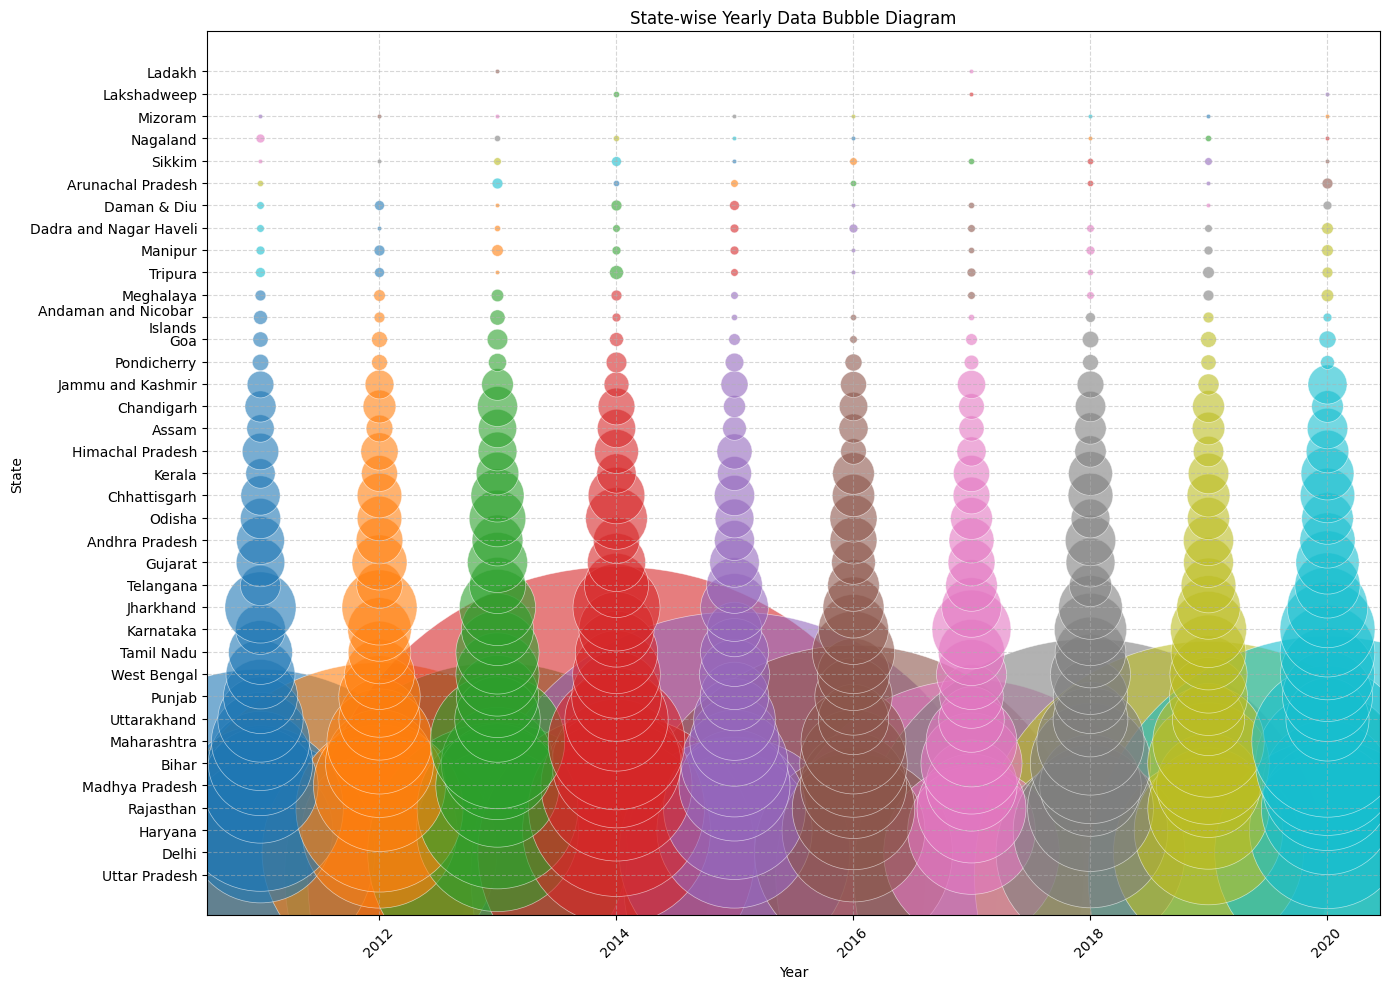

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel('/content/State-wise_Yearly_Data.xlsx')

# Replace missing values with zero
data_filled = data.fillna(0)

# Define the 'years' and 'states' based on your actual data columns
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
states = data_filled['State'].unique()  # Corrected column name

# Prepare the data for plotting
values_filled = data_filled[years]

# Create the bubble plot with circular markers and appropriate bubble sizes
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Plot the bubbles with circular markers ('o')
for i, state in enumerate(states):
    for j, year in enumerate(years):
        size = values_filled.iloc[i, j]
        if size > 0:  # Only plot if the size is greater than 0
            ax.scatter(year, state, s=size * 10, alpha=0.6, edgecolors="w", linewidth=0.5, marker='o')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_title('State-wise Yearly Data Bubble Diagram')

# Show plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


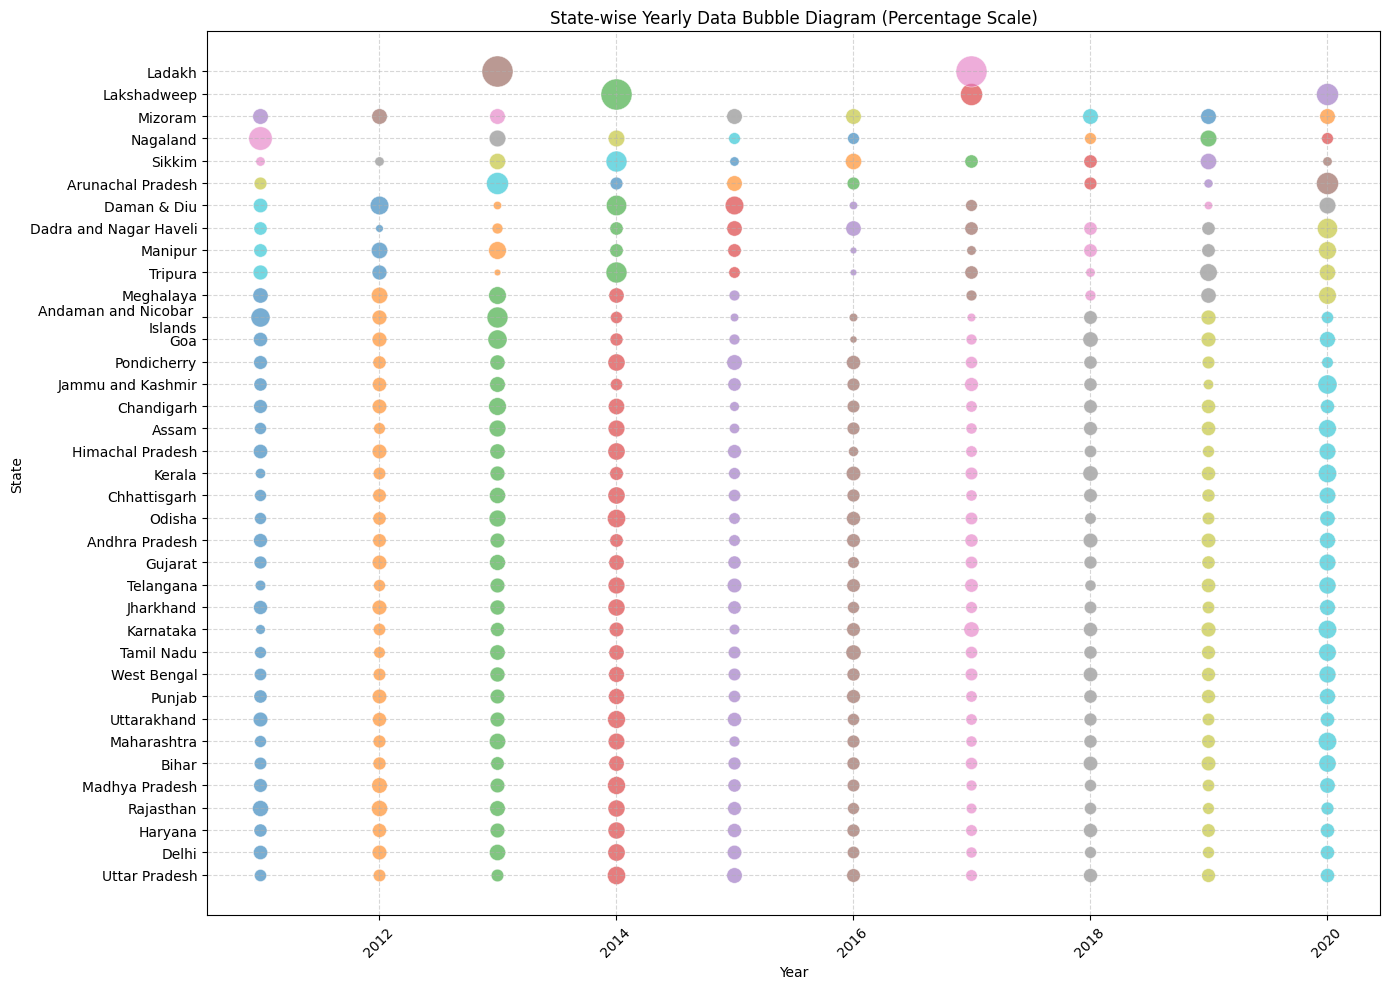

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/State-wise_Yearly_Data.xlsx'
data = pd.read_excel(file_path)

# Replace missing values with zero
data_filled = data.fillna(0)

# Define the 'years' based on the actual data columns
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Calculate the percentage of each year's value relative to the state's total value
total_values = data_filled['Total \nvalue']
percentage_data = data_filled[years].div(total_values, axis=0) * 100

# Prepare the states list
states = data_filled['State'].unique()

# Create the bubble plot with circular markers and percentage-scaled bubble sizes
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Plot the bubbles with circular markers ('o')
for i, state in enumerate(states):
    for j, year in enumerate(years):
        size = percentage_data.iloc[i, j]
        if size > 0:  # Only plot if the size is greater than 0
            ax.scatter(year, state, s=size * 10, alpha=0.6, edgecolors="w", linewidth=0.5, marker='o')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_title('State-wise Yearly Data Bubble Diagram (Percentage Scale)')

# Show plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


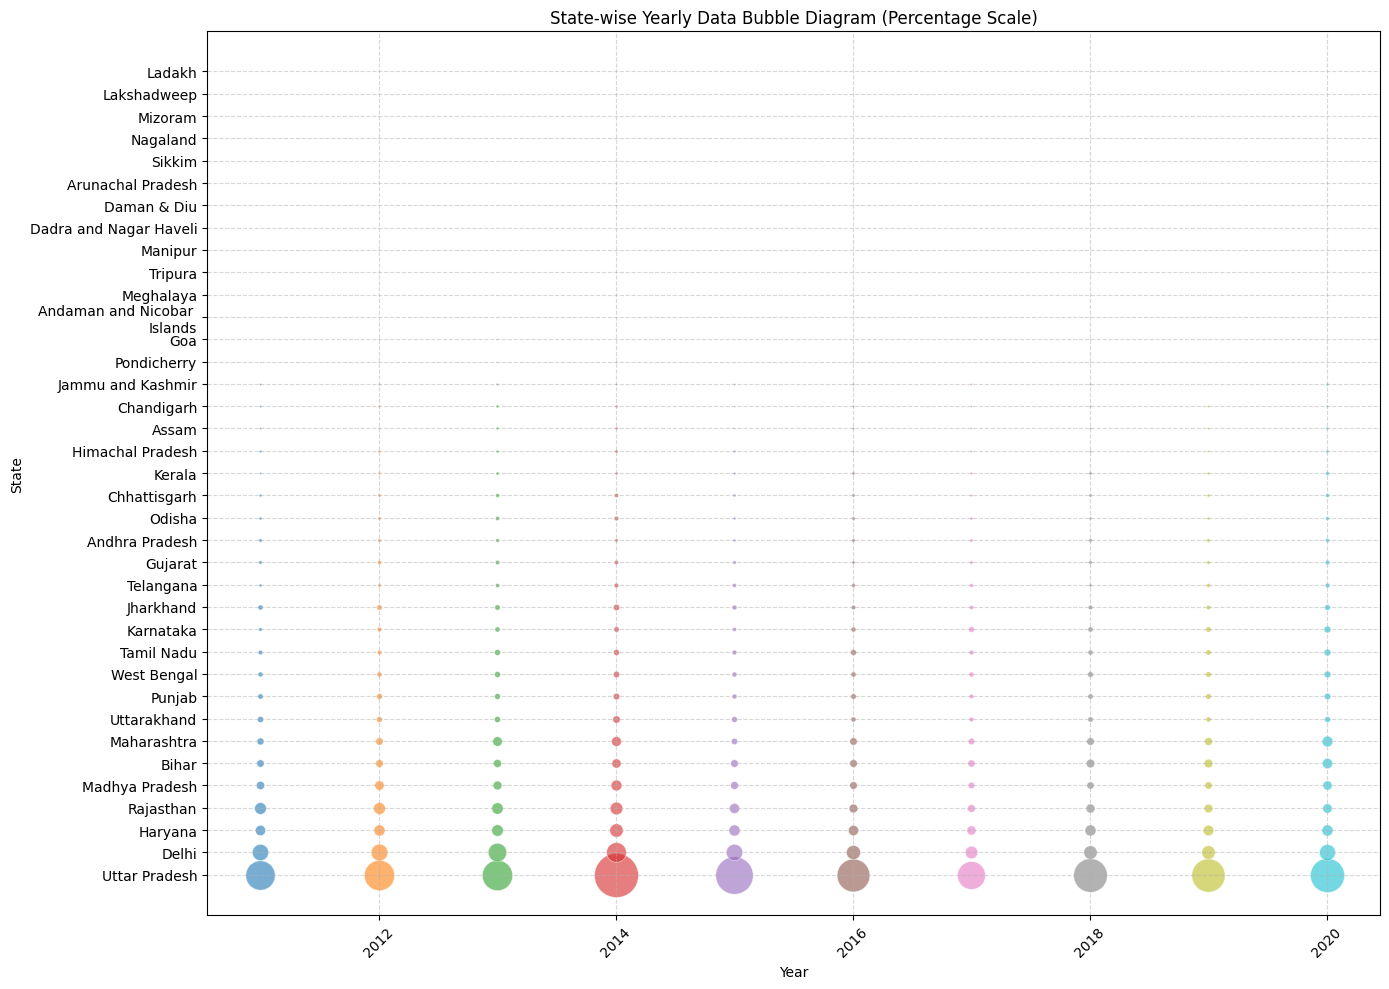

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/State-wise_Yearly_Data.xlsx'
data = pd.read_excel(file_path)

# Replace missing values with zero
data_filled = data.fillna(0)

# Define the 'years' based on the actual data columns
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
states = data_filled['State'].unique()

# Prepare the data for plotting
values_filled = data_filled[years]

# Convert the values to a percentage scale
# First, calculate the maximum value to normalize the data
max_value = values_filled.max().max()
values_percentage = (values_filled / max_value) * 100

# Create the bubble plot with circular markers and percentage-scaled bubble sizes
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Plot the bubbles with circular markers ('o')
for i, state in enumerate(states):
    for j, year in enumerate(years):
        size = values_percentage.iloc[i, j]
        if size > 0:  # Only plot if the size is greater than 0
            ax.scatter(year, state, s=size * 10, alpha=0.6, edgecolors="w", linewidth=0.5, marker='o')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_title('State-wise Yearly Data Bubble Diagram (Percentage Scale)')

# Show plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


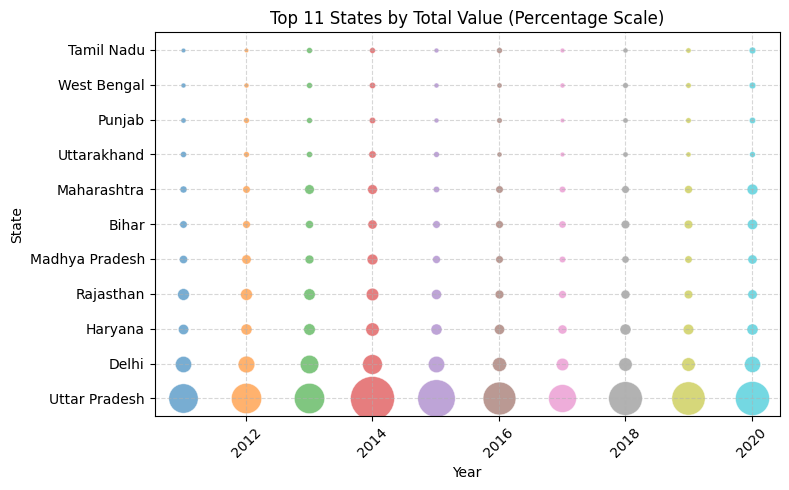

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/State-wise_Yearly_Data.xlsx'
data = pd.read_excel(file_path)

# Replace missing values with zero
data_filled = data.fillna(0)

# Define the 'years' based on the actual data columns
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Sort the data by the 'Total value' column in descending order and select the top 11
top_11_data = data_filled.sort_values(by='Total \nvalue', ascending=False).head(11)

# Extract relevant columns for plotting
top_11_states = top_11_data['State']
top_11_values = top_11_data[years]

# Convert the values to a percentage scale for the top 11 data
max_value_top_11 = top_11_values.max().max()
top_11_values_percentage = (top_11_values / max_value_top_11) * 100

# Create the bubble plot with circular markers and percentage-scaled bubble sizes for top 11 states
plt.figure(figsize=(8, 5))
ax = plt.gca()

# Plot the bubbles with circular markers ('o')
for i, state in enumerate(top_11_states):
    for j, year in enumerate(years):
        size = top_11_values_percentage.iloc[i, j]
        if size > 0:  # Only plot if the size is greater than 0
            ax.scatter(year, state, s=size * 10, alpha=0.6, edgecolors="w", linewidth=0.5, marker='o')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_title('Top 11 States by Total Value (Percentage Scale)')

# Show plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Display the top 11 data to the user
import ace_tools as tools
tools.display_dataframe_to_user(name="Top 11 States by Total Value", dataframe=top_11_data)


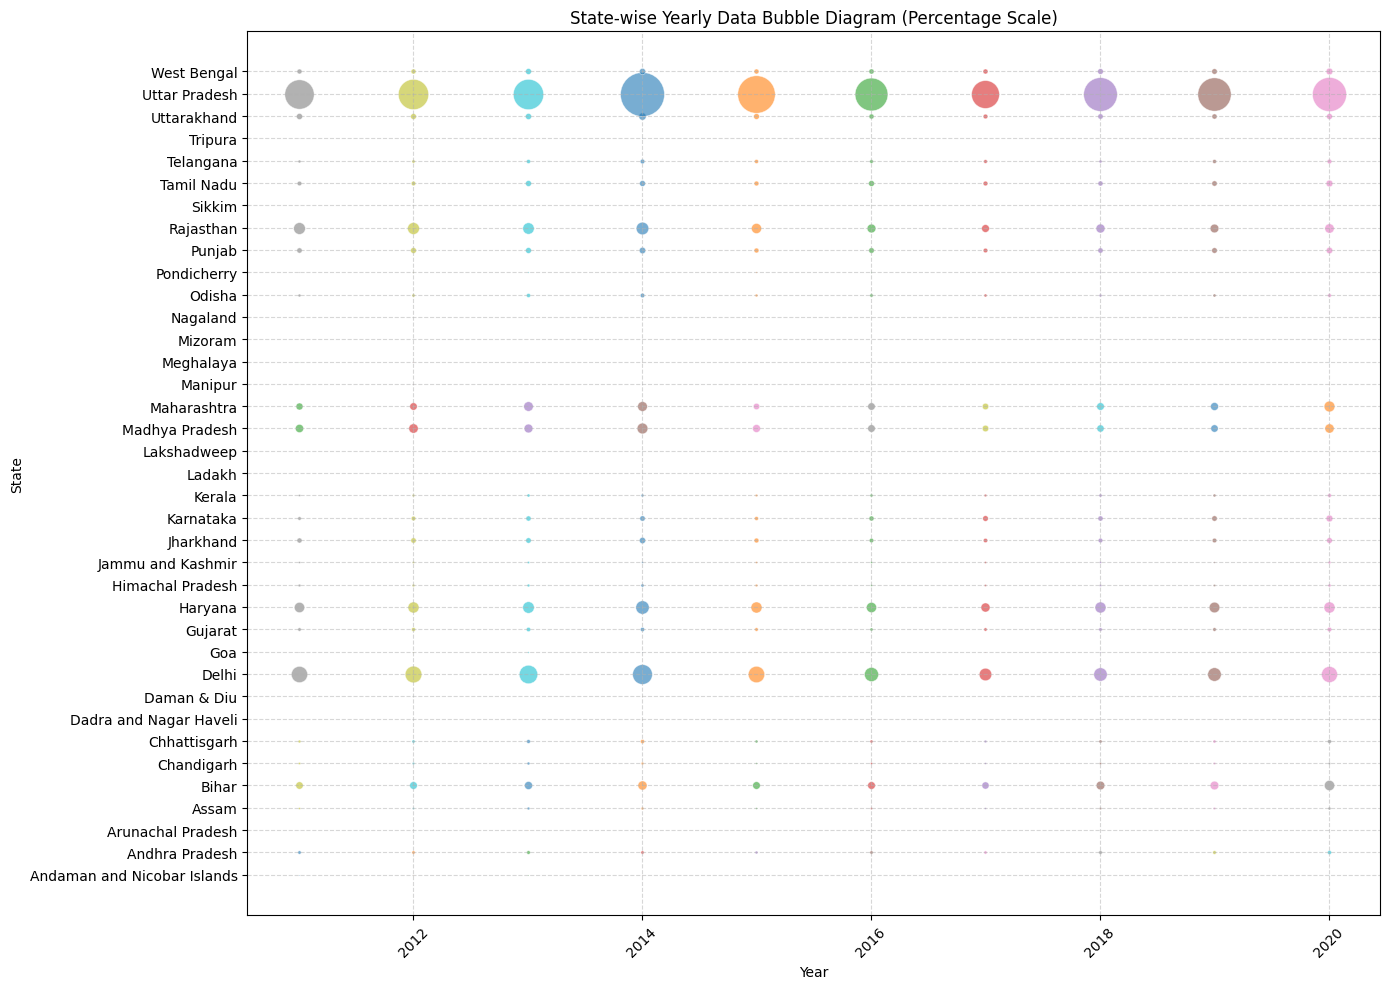

In [ ]:
# Convert the values to a percentage scale
# First, calculate the maximum value to normalize the data
max_value = values_filled.max().max()
values_percentage = (values_filled / max_value) * 100

# Create the bubble plot with circular markers and percentage-scaled bubble sizes
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Plot the bubbles with circular markers ('o')
for i, state in enumerate(states):
    for j, year in enumerate(years):
        size = values_percentage.iloc[i, j]
        if size > 0:  # Only plot if the size is greater than 0
            ax.scatter(year, state, s=size * 10, alpha=0.6, edgecolors="w", linewidth=0.5, marker='o')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_title('State-wise Yearly Data Bubble Diagram (Percentage Scale)')

# Show plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


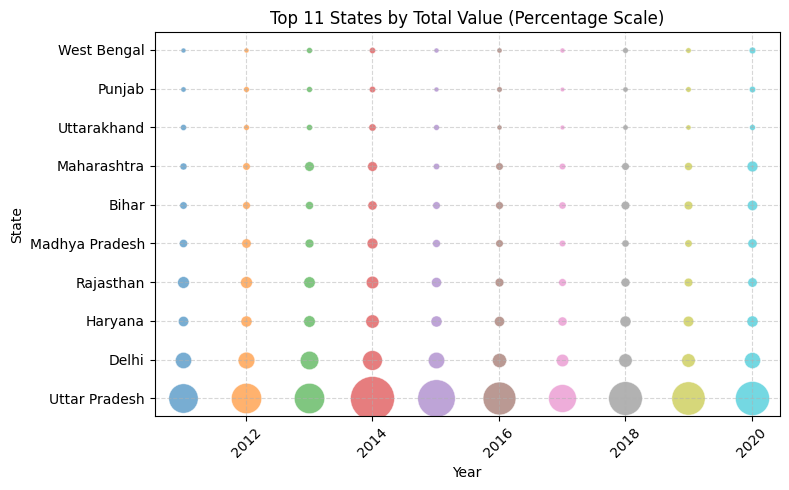

In [ ]:
# Sort the data by the 'Total value' column in descending order and select the top 11
top_11_data = data_filled.sort_values(by='Total value', ascending=False).head(11)

# Extract relevant columns for plotting
top_11_states = top_11_data['State']
top_11_values = top_11_data[years]


# Convert the values to a percentage scale for the top 11 data
max_value_top_11 = top_11_values.max().max()
top_11_values_percentage = (top_11_values / max_value_top_11) * 100

# Create the bubble plot with circular markers and percentage-scaled bubble sizes for top 11 states
plt.figure(figsize=(8, 5))
ax = plt.gca()

# Plot the bubbles with circular markers ('o')
for i, state in enumerate(top_11_states):
    for j, year in enumerate(years):
        size = top_11_values_percentage.iloc[i, j]
        if size > 0:  # Only plot if the size is greater than 0
            ax.scatter(year, state, s=size * 10, alpha=0.6, edgecolors="w", linewidth=0.5, marker='o')

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('State')
ax.set_title('Top 11 States by Total Value (Percentage Scale)')

# Show plot
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Top 11 States by Total Value", dataframe=top_11_data)


In [ ]:
pip install kaleido


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Load the data
file_path = '/content/State-wise_Yearly_Data.xlsx'
data = pd.read_excel(file_path)

# Replace missing values with zero
data_filled = data.fillna(0)

# Define the 'years' based on the actual data columns
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Sort the data by the 'Total value' column in descending order and select the top 11
top_11_data = data_filled.sort_values(by='Total \nvalue', ascending=False).head(10)

# Extract relevant columns for plotting
top_11_states = top_11_data['State']
top_11_values = top_11_data[years]

# Convert the values to a percentage scale for the top 11 data
max_value_top_11 = top_11_values.max().max()
top_11_values_percentage = (top_11_values / max_value_top_11) * 100

# Remove states with all zero values in the top 11 dataset
top_11_values_filtered = top_11_values_percentage[(top_11_values_percentage.T != 0).any()]

# Update the list of states after filtering
filtered_states = top_11_data.loc[top_11_values_filtered.index, 'State']

# Prepare data for Plotly by adding the 'State' column to the filtered data
filtered_plotly_data = top_11_values_filtered.copy()
filtered_plotly_data['State'] = filtered_states

# Melt the dataframe for easier plotting with Plotly
filtered_plotly_data_melted = filtered_plotly_data.melt(id_vars=['State'], var_name='Year', value_name='Percentage')

# Create the bubble plot using Plotly
fig = px.scatter(
    filtered_plotly_data_melted,
    x='Year',
    y='State',
    size='Percentage',
    color='Percentage',
    title='Top 10 States NCW',
    labels={'Percentage': 'Percentage '},
    color_continuous_scale='Tealrose'
)

# Update layout for better visibility and bold x and y axis names and title
fig.update_layout(
    width=800,  # Set the width of the plot
    height=500,  # Set the height of the plot
    title={
        'text': 'Top 10 States NCW Report Data',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'color': 'black', 'family': 'Arial'}
    },
    legend_title_text='Percentage Scale',
    xaxis_title='Year',
    yaxis_title='State',
    xaxis=dict(title_font=dict(size=18, family='Arial', color='black')),
    yaxis=dict(title_font=dict(size=18, family='Arial', color='black')),
    legend=dict(
        yanchor="top",
        y=1.15,
        xanchor="left",
        x=1.0
    )
)

# Show the plot
fig.show()
# Save the plot as a PNG image using fig.write_image()

# Save the plot as an HTML file
fig.write_html('top_10_states_ncw.html')

# **Natureof Complaints** NCW data analysis

---




In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/content/nature_of_complaints.csv'
complaints_df = pd.read_csv(file_path)

# Display the dataframe
complaints_df.head(), complaints_df.columns


(               Nature of Complaint  AP  AR  AS  BR  CG  GA  GJ  HR  HP  ...  \
 0                      Acid Attack   0   0   0   1   0   0   1   2   0  ...   
 1                Attempt To Murder   2   0   0   7   0   0   2   4   2  ...   
 2                  Attempt To Rape   0   0   0  12   0   0   0  20   0  ...   
 3                Bigamy / Polygamy   0   0   0   7   0   0   0   2   0  ...   
 4  Caste, Community Based Violence   1   0   0  16   0   0   0  11   0  ...   
 
    A&N  CH  D&H  D&D  DL  J&K  LA  LD  PY  Year  
 0    0   0    0    0   2    0   0   0   0  2011  
 1    0   0    0    0  24    1   0   0   0  2011  
 2    0   0    0    0  11    0   0   0   0  2011  
 3    0   0    0    0  15    1   0   0   1  2011  
 4    0   0    0    0  54    0   0   0   0  2011  
 
 [5 rows x 39 columns],
 Index(['Nature of Complaint', 'AP', 'AR', 'AS', 'BR', 'CG', 'GA', 'GJ', 'HR',
        'HP', 'JH', 'KA', 'KL', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PB',
        'RJ', 'SK', 'TN', '

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Load the data from the provided CSV file
file_path = '/content/nature_of_complaints.csv'
data = pd.read_csv(file_path)

# Sum all complaint values for each type and year, excluding state columns
complaints_columns = data.columns.difference(['Year', 'Nature of Complaint'])
data['Total'] = data[complaints_columns].sum(axis=1)

# Group by year and sum the total complaints for each type
yearly_totals = data.groupby(['Year', 'Nature of Complaint'])['Total'].sum().reset_index()

# Identify the top complaint type for each year
top_complaints = yearly_totals.loc[yearly_totals.groupby('Year')['Total'].idxmax()].reset_index(drop=True)

# Retrieve the entire list of yearly top complaints without dropping any rows
yearly_totals_sorted = yearly_totals.sort_values(['Year', 'Total'], ascending=[True, False]).reset_index(drop=True)

# Prepare data for a heatmap
heatmap_data = yearly_totals.pivot(index='Year', columns='Nature of Complaint', values='Total')

# Save the heatmap as an HTML file
heatmap_data_plotly = heatmap_data.fillna(0)

fig = go.Figure(data=go.Heatmap(
        z=heatmap_data_plotly.values,
        x=heatmap_data_plotly.columns,
        y=heatmap_data_plotly.index,
        colorscale='Viridis'))

# Update layout
fig.update_layout(
    title='Heatmap of Year-wise Top Complaints',
    xaxis_nticks=36,
    xaxis_title='Nature of Complaint',
    yaxis_title='Year'
)

# Save the plot as an HTML file
html_file_path = 'heatmap.html'
fig.write_html(html_file_path)

# Provide the HTML file path
html_file_path


'heatmap.html'

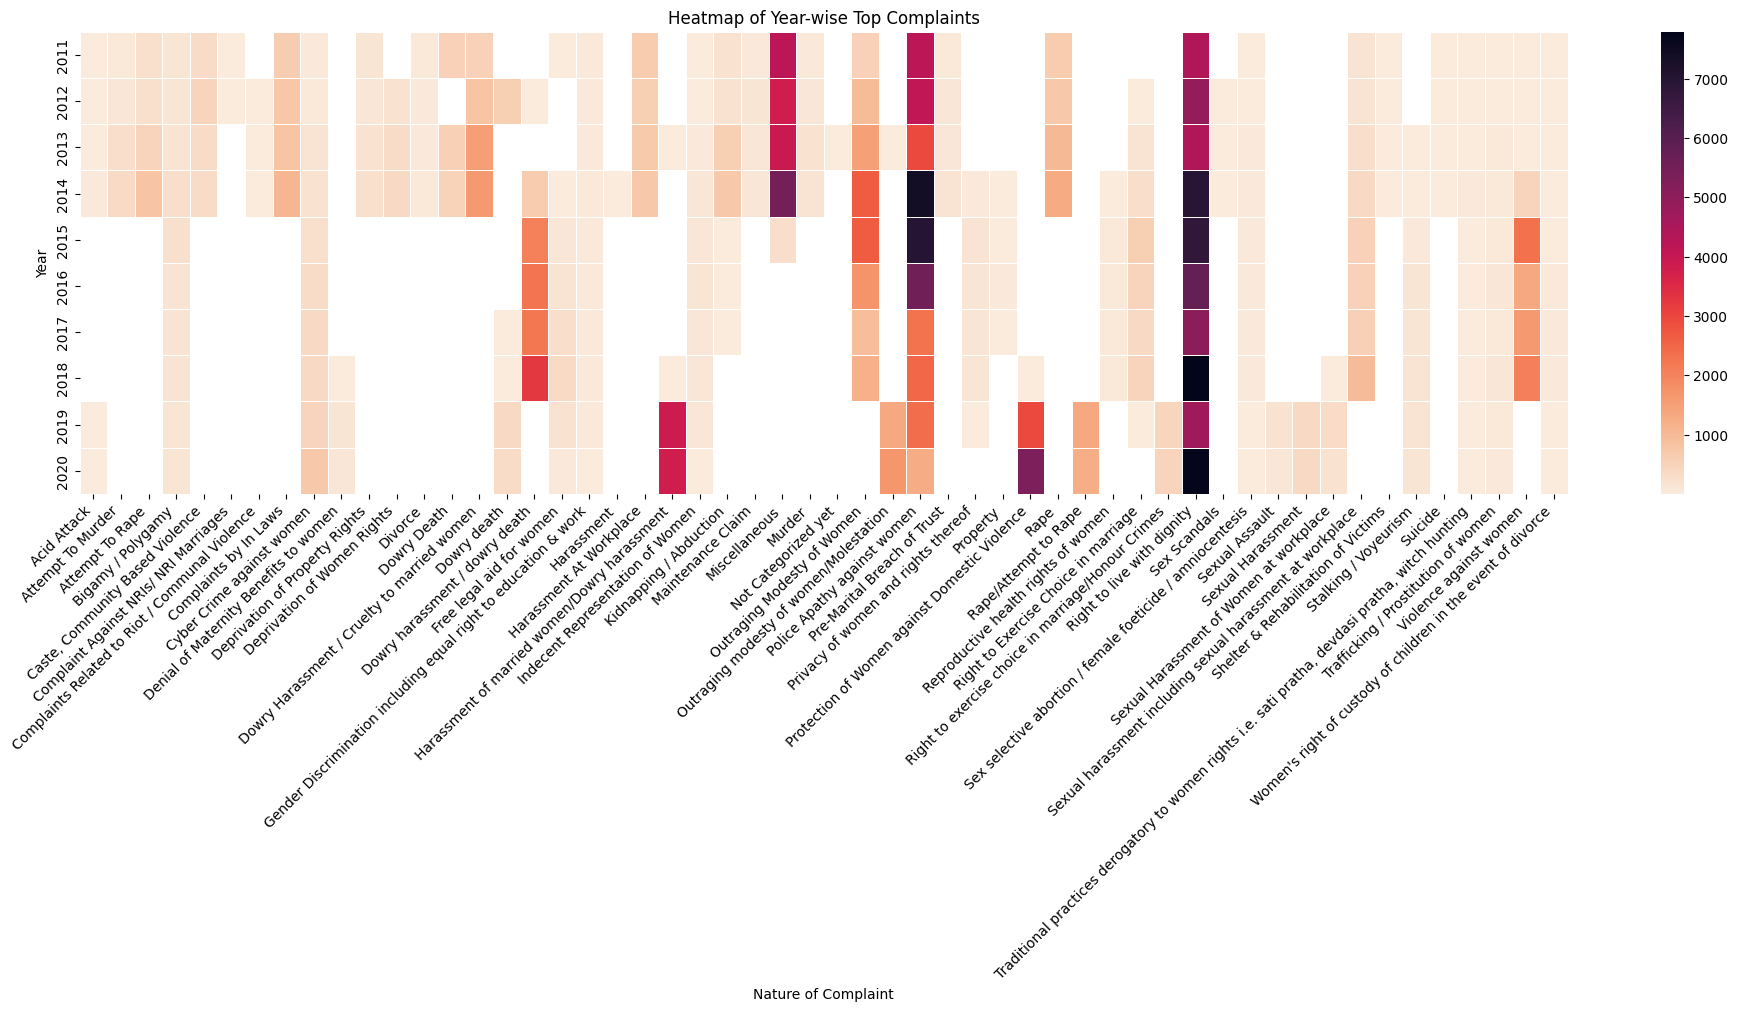

In [ ]:
import seaborn as sns

# Prepare data for a heatmap
heatmap_data = yearly_totals.pivot(index='Year', columns='Nature of Complaint', values='Total')

# Plot the heatmap
plt.figure(figsize=(24, 6))
sns.heatmap(heatmap_data, annot=False, fmt="g", cmap='rocket_r', linewidths=.5)
plt.title('Heatmap of Year-wise Top Complaints')
plt.xlabel('Nature of Complaint')
plt.ylabel('Year')
plt.xticks(rotation=45, ha='right')

plt.show()


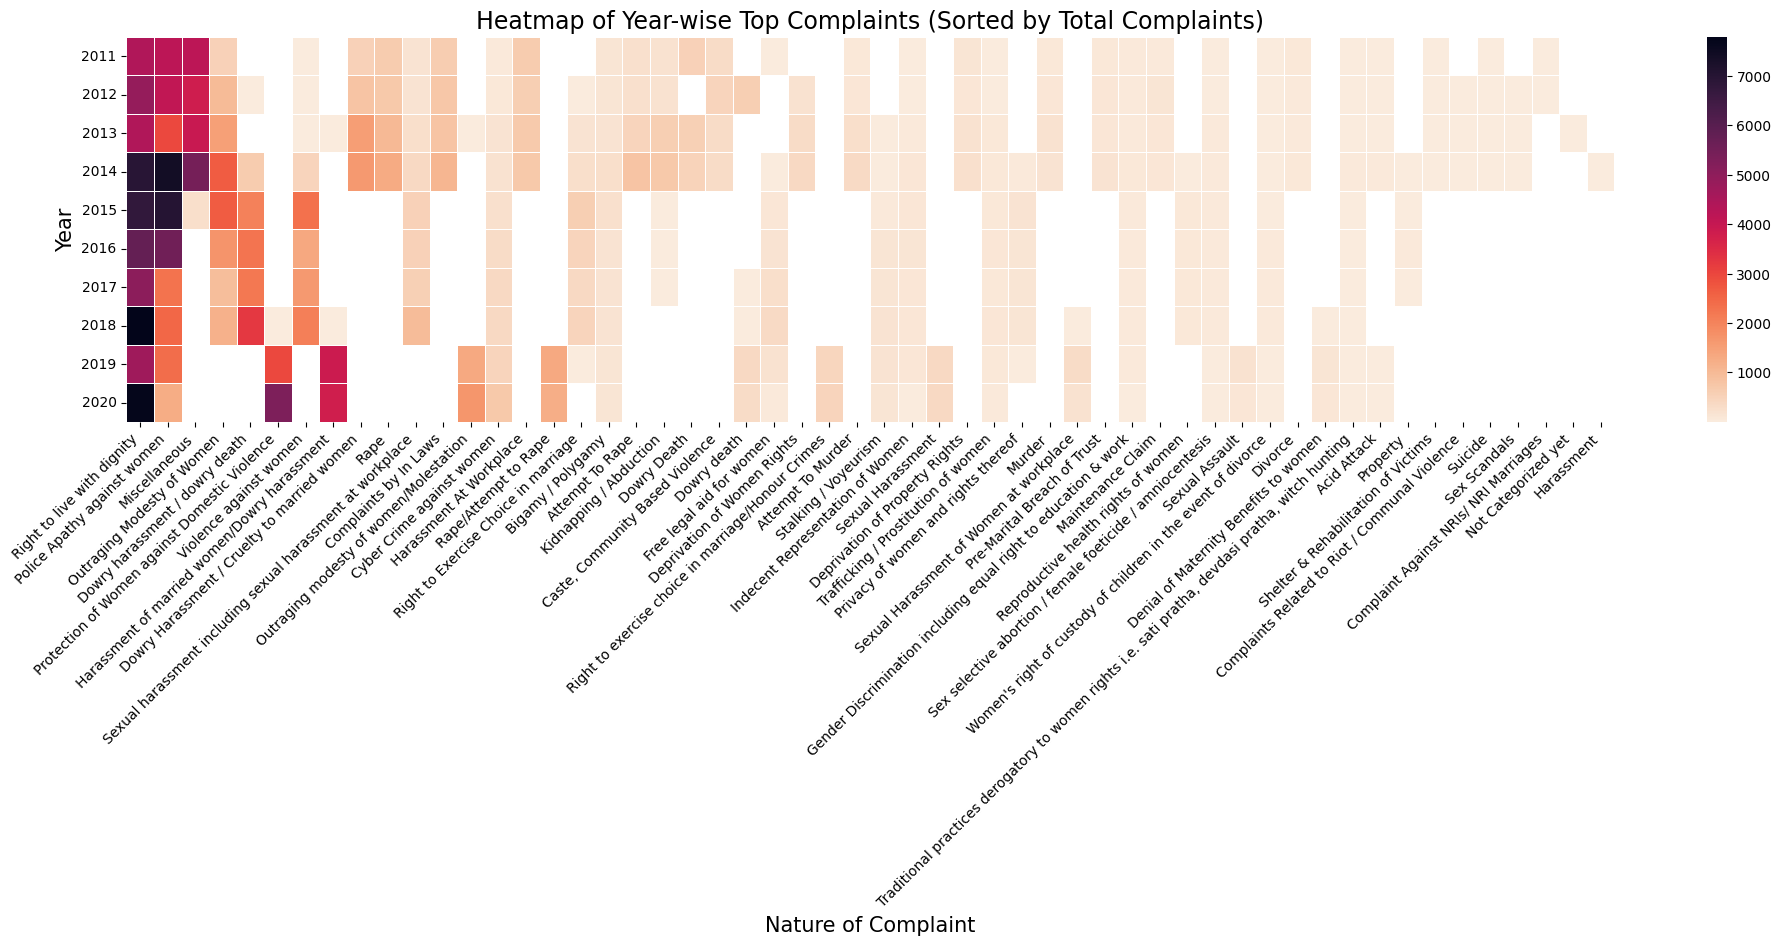

In [ ]:
# Ensure heatmap_data_no_level is defined
heatmap_data_no_level = yearly_totals.pivot(index='Year', columns='Nature of Complaint', values='Total')

# Sorting the Nature of Complaints by their total complaints in descending order
sorted_complaints = yearly_totals.groupby('Nature of Complaint')['Total'].sum().sort_values(ascending=False).index

# Reorder the columns in heatmap data based on the sorted complaints
heatmap_data_sorted = heatmap_data_no_level[sorted_complaints]

# Plot the heatmap with the sorted order
plt.figure(figsize=(24, 5))
sns.heatmap(heatmap_data_sorted, annot=False, cmap='rocket_r', linewidths=.5)
plt.title('Heatmap of Year-wise Top Complaints (Sorted by Total Complaints)',  fontsize=17)
plt.xlabel('Nature of Complaint', fontsize=15)
plt.ylabel('Year',  fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.show()

#plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.show()

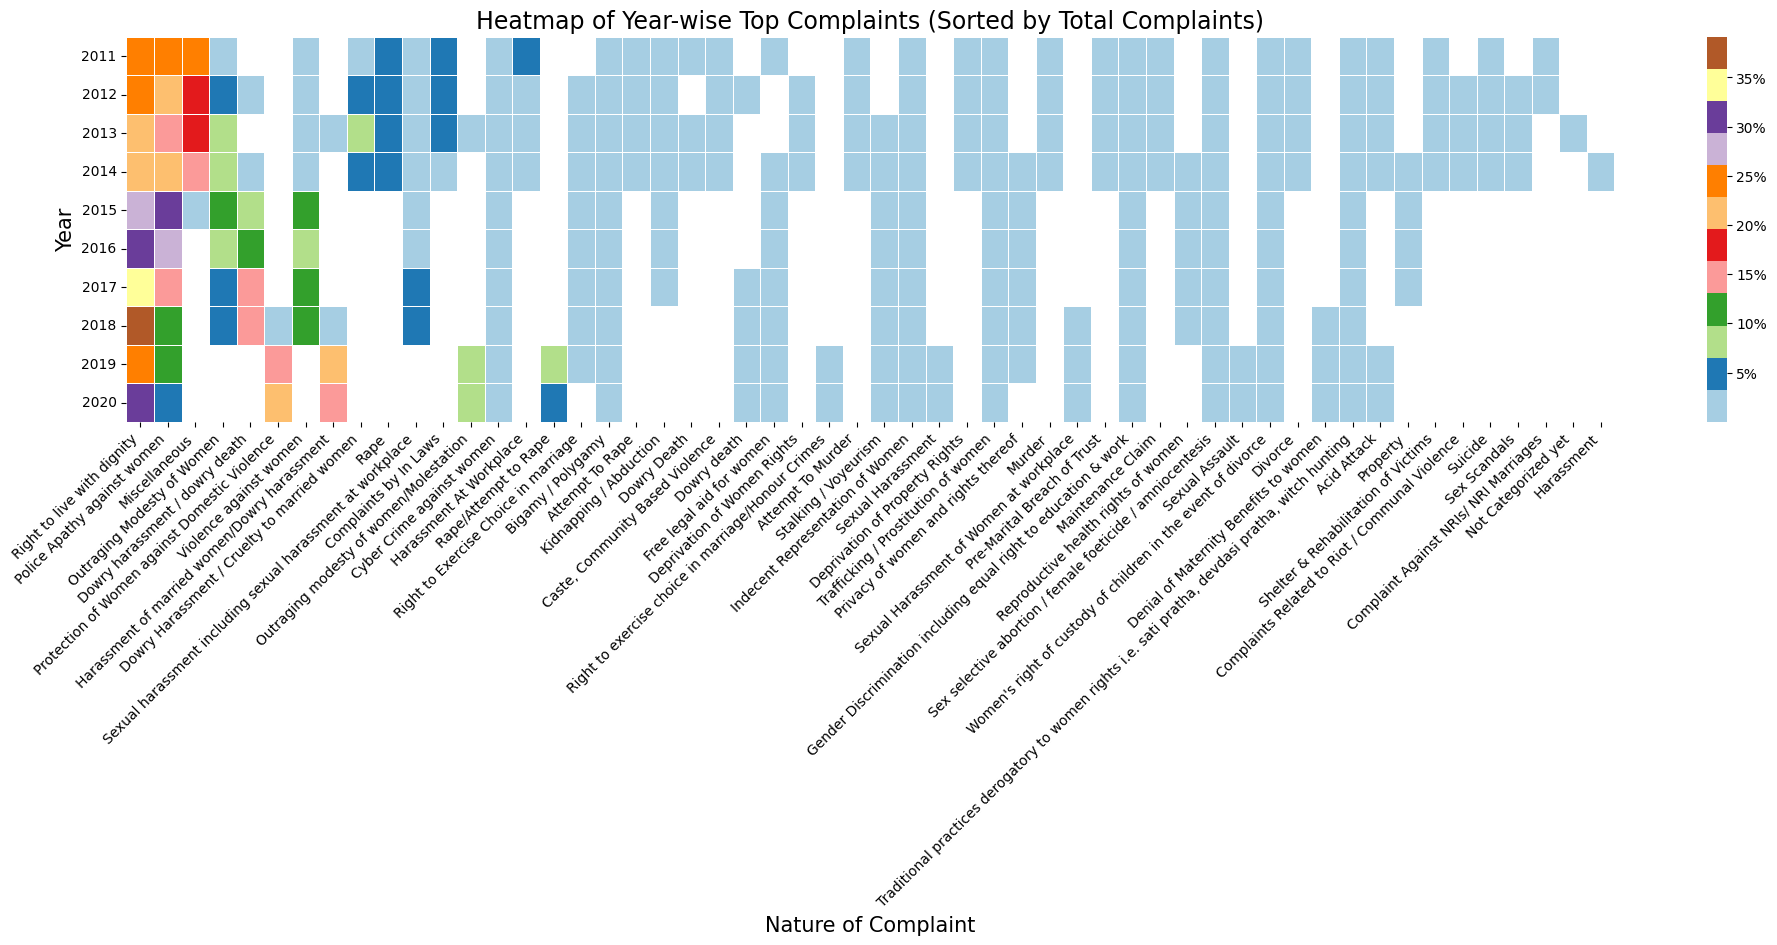

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = '/content/nature_of_complaints.csv'
data = pd.read_csv(file_path)

# Sum all complaint values for each type and year, excluding state columns
complaints_columns = data.columns.difference(['Year', 'Nature of Complaint'])
data['Total'] = data[complaints_columns].sum(axis=1)

# Group by year and sum the total complaints for each type
yearly_totals = data.groupby(['Year', 'Nature of Complaint'])['Total'].sum().reset_index()

# Prepare the heatmap data
heatmap_data_no_level = yearly_totals.pivot(index='Year', columns='Nature of Complaint', values='Total')

# Sorting the Nature of Complaints by their total complaints in descending order
sorted_complaints = yearly_totals.groupby('Nature of Complaint')['Total'].sum().sort_values(ascending=False).index

# Reorder the columns in heatmap data based on the sorted complaints
heatmap_data_sorted = heatmap_data_no_level[sorted_complaints]

# Convert the values to percentages
heatmap_data_percentage = heatmap_data_sorted.div(heatmap_data_sorted.sum(axis=1), axis=0) * 100

# Plot the heatmap with the sorted order
plt.figure(figsize=(24, 5))
sns.heatmap(heatmap_data_percentage, annot=False, cmap='Paired', linewidths=.5, cbar_kws={'format': '%.0f%%'})
plt.title('Heatmap of Year-wise Top Complaints (Sorted by Total Complaints)', fontsize=17)
plt.xlabel('Nature of Complaint', fontsize=15)
plt.ylabel('Year', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0, fontsize=10)

# Save the plot as an image file
#plt.savefig('year_wise_complaints_heatmap_percentage.png')

# Display the plot
plt.show()


# **Catplot of Year-wise Complaints by Nature**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



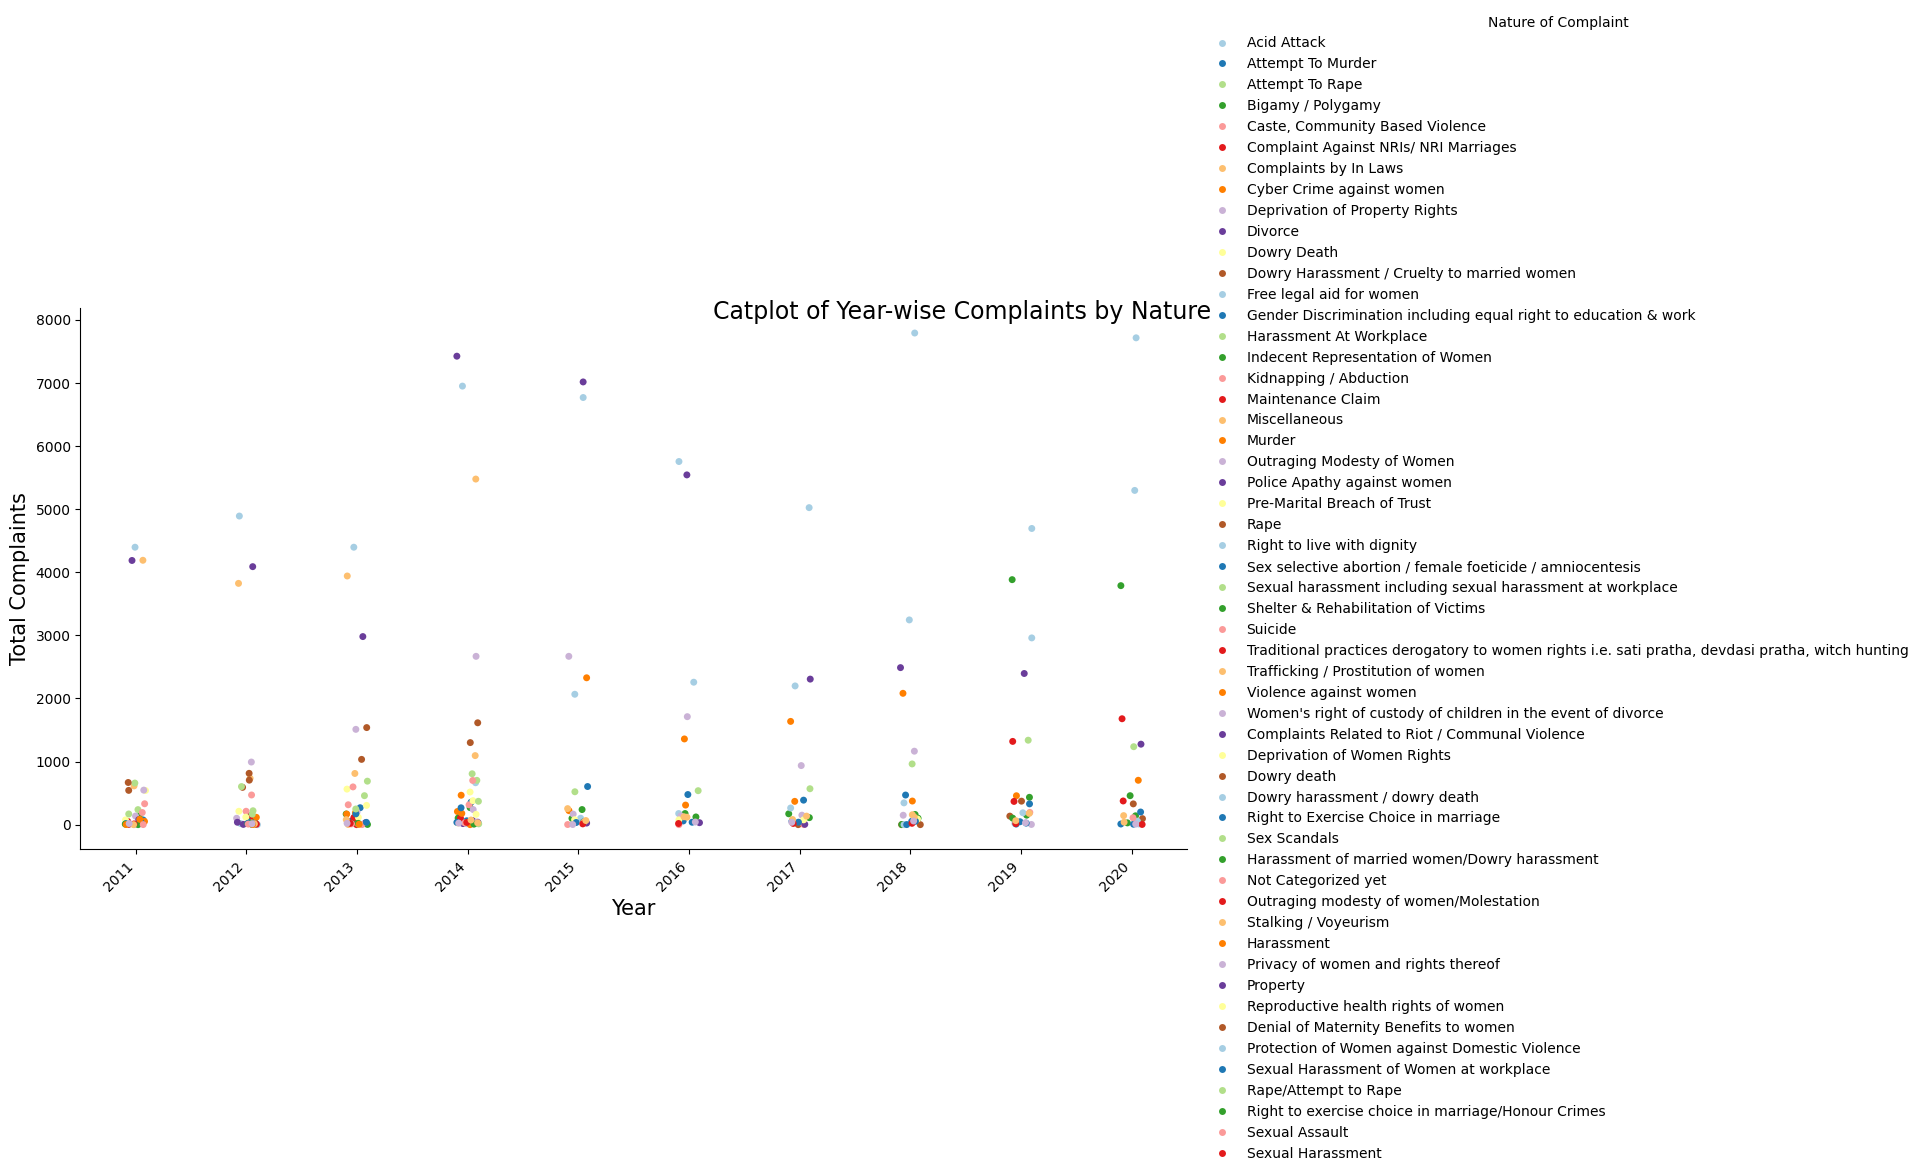

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = '/content/nature_of_complaints.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Sum all complaint values for each type and year, excluding state columns
complaints_columns = data.columns.difference(['Year', 'Nature of Complaint'])
data['Total'] = data[complaints_columns].sum(axis=1)

# Group by year and sum the total complaints for each type
yearly_totals = data.groupby(['Year', 'Nature of Complaint'])['Total'].sum().reset_index()

# Generate a Catplot using seaborn
cat_plot = sns.catplot(
    x='Year', y='Total', hue='Nature of Complaint',
    data=yearly_totals, kind='strip', height=6, aspect=2, palette='Paired'
)
cat_plot.set_xticklabels(rotation=45, ha='right')
cat_plot.fig.suptitle('Catplot of Year-wise Complaints by Nature', fontsize=17)
cat_plot.set_xlabels('Year', fontsize=15)
cat_plot.set_ylabels('Total Complaints', fontsize=15)

# Save the plot as an image file
#cat_plot.savefig('year_wise_complaints_catplot.png')

# Display the plot
plt.show()


<ipython-input-142-83318870fef5>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




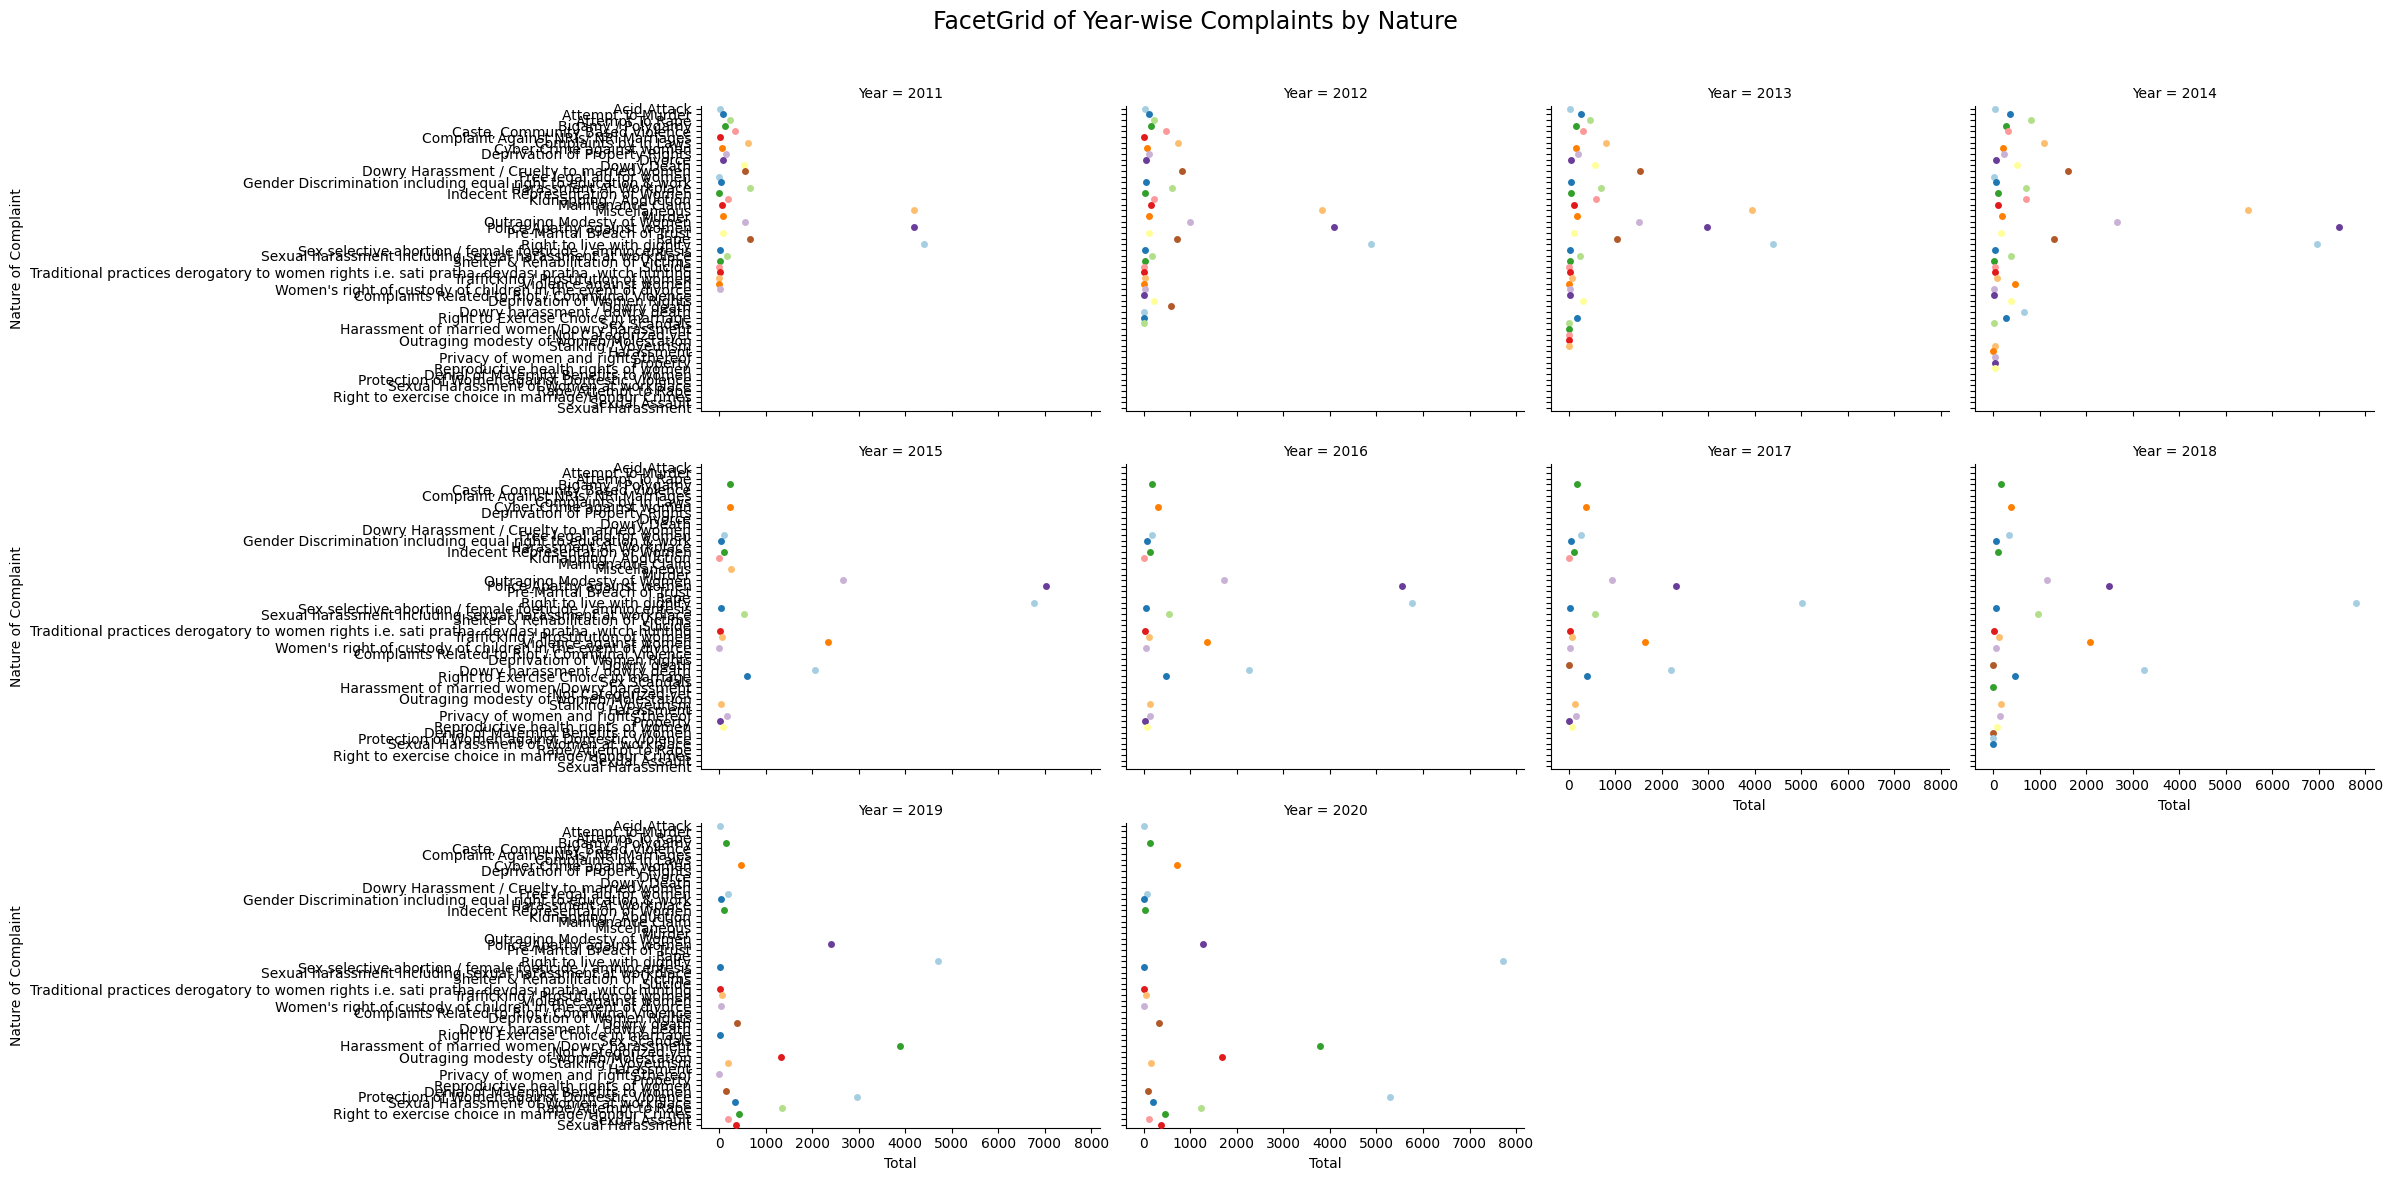

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = '/content/nature_of_complaints.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Sum all complaint values for each type and year, excluding state columns
complaints_columns = data.columns.difference(['Year', 'Nature of Complaint'])
data['Total'] = data[complaints_columns].sum(axis=1)

# Group by year and sum the total complaints for each type
yearly_totals = data.groupby(['Year', 'Nature of Complaint'])['Total'].sum().reset_index()

# Generate a FacetGrid plot using seaborn
facet_plot = sns.catplot(
    x='Total', y='Nature of Complaint', col='Year',
    data=yearly_totals, kind='strip', col_wrap=4, height=4, aspect=1.5, palette='Paired'
)
facet_plot.fig.subplots_adjust(top=0.9)
facet_plot.fig.suptitle('FacetGrid of Year-wise Complaints by Nature', fontsize=17)

# Save the plot as an image file
#facet_plot.savefig('year_wise_complaints_facetgrid.png')

# Display the plot
plt.show()


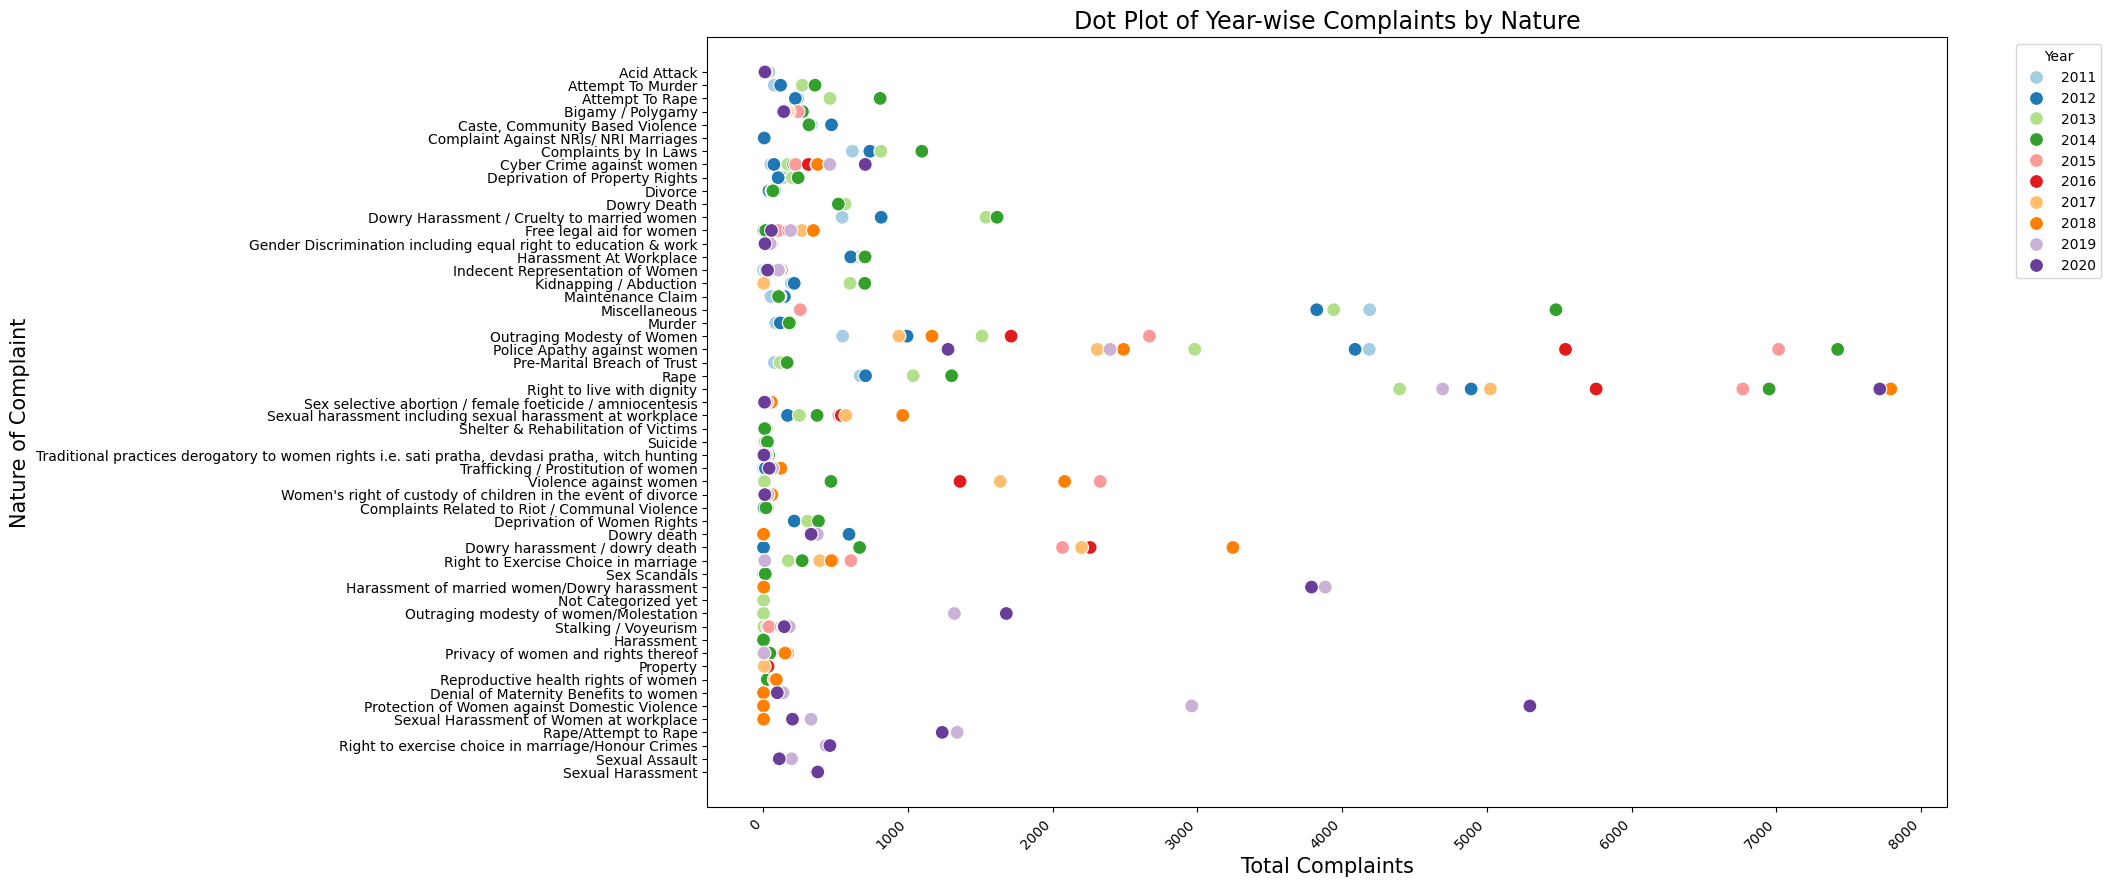

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = '/content/nature_of_complaints.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Sum all complaint values for each type and year, excluding state columns
complaints_columns = data.columns.difference(['Year', 'Nature of Complaint'])
data['Total'] = data[complaints_columns].sum(axis=1)

# Group by year and sum the total complaints for each type
yearly_totals = data.groupby(['Year', 'Nature of Complaint'])['Total'].sum().reset_index()

# Generate a Dot plot using seaborn
plt.figure(figsize=(16, 10))
dot_plot = sns.scatterplot(
    x='Total', y='Nature of Complaint', hue='Year',
    data=yearly_totals, palette='Paired', s=100, marker='o'
)
plt.title('Dot Plot of Year-wise Complaints by Nature', fontsize=17)
plt.xlabel('Total Complaints', fontsize=15)
plt.ylabel('Nature of Complaint', fontsize=15)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Save the plot as an image file
plt.savefig('year_wise_complaints_dot_plot.png')

# Display the plot
plt.show()


In [ ]:
pip install geopandas matplotlib pandas


In [ ]:
pip install arcgis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... canceledERROR: Operation cancelled by user


In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/Sector-Wise.xlsx'  # Make sure the file path is correct if running locally
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
print("Sheet names:", sheet_names)

# Load the data from the first sheet
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows to understand the structure of the data
print("First few rows of the data:")
print(data.head())

# Group the data by 'Category' and 'Sectors', then calculate the size and unstack the data
level_sector_comparison = data.groupby(['Category', 'Sectors']).size().unstack(fill_value=0)

# Transpose the dataframe
level_sector_comparison_transposed = level_sector_comparison.T

# Display the transposed dataframe
print("Transposed Level and Sector Comparison:")
print(level_sector_comparison_transposed)


Sheet names: ['Sheet1']
First few rows of the data:
                               Handle  \
0   http://hdl.handle.net/10603/93184   
1    http://hdl.handle.net/10603/4404   
2  http://hdl.handle.net/10603/279095   
3   http://hdl.handle.net/10603/88098   
4  http://hdl.handle.net/10603/210614   

                                               Title  Year  \
0  Pattern of womens participation in agriculture...  2011   
1            Agricultural landuse in Nashik district  2011   
2  Study on participation of rural women in agric...  2013   
3  Women employment and wage differentials in agr...  2014   
4  Problems and Prospects of Women Workers in Agr...  2017   

                                            District               State  \
0  Cachar, Karimganj, and Hailakandi district (Ba...               Assam   
1                                     Nasik District         Maharashtra   
2                                  Faizabad District       Uttar Pradesh   
3                       

In [ ]:
# Save the transposed dataframe to a new Excel file
output_file_path = 'Level_Sector_Comparison_Transposed.xlsx'
level_sector_comparison_transposed.to_excel(output_file_path)

output_file_path

'Level_Sector_Comparison_Transposed.xlsx'

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/Sector-Wise.xlsx'  # Make sure the file path is correct if running locally
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
sheet_names = excel_data.sheet_names
print("Sheet names:", sheet_names)

# Load the data from the first sheet
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows to understand the structure of the data
print("First few rows of the data:")
print(data.head())

# Group the data by 'Category' and 'Sectors', then calculate the size and unstack the data
level_sector_comparison = data.groupby(['Category', 'Sectors']).size().unstack(fill_value=0)

# Transpose the dataframe
level_sector_comparison_transposed = level_sector_comparison.T

# Sort the transposed dataframe in ascending order based on the sum of sector values
sorted_level_sector_comparison = level_sector_comparison_transposed.sort_values(by=level_sector_comparison_transposed.columns.tolist(), ascending=False)

# Save the sorted dataframe to a new Excel file
sorted_output_file_path = 'Level_Sector_Comparison_Sorted.xlsx'
sorted_level_sector_comparison.to_excel(sorted_output_file_path)

# Display the transposed dataframe
print("Sorted Level and Sector Comparison:")
print(sorted_level_sector_comparison)

# Provide the file path
print(f"Sorted Excel file saved at: {sorted_output_file_path}")


Sheet names: ['Sheet1']
First few rows of the data:
                               Handle  \
0  http://hdl.handle.net/10603/210614   
1   http://hdl.handle.net/10603/93184   
2  http://hdl.handle.net/10603/276354   
3  http://hdl.handle.net/10603/299253   
4  http://hdl.handle.net/10603/358668   

                                               Title  Year  \
0  Problems and Prospects of Women Workers in Agr...  2017   
1  Pattern of womens participation in agriculture...  2011   
2  WoMEN PARTICIPATION IN AGRICULTURE A STUDY IN ...  2017   
3  Socio Economic Conditions of Women Agricultura...  2019   
4  Conditions Of Women Workers And Labour Absorpt...  2020   

                                            District               State  \
0                            Agro and Kashmir Valley  Jammu and Kashmir    
1  Cachar, Karimganj, and Hailakandi district (Ba...               Assam   
2                                Cuddalore District           Tamil Nadu   
3                       

In [ ]:
from google.colab import files

# Save the sorted dataframe to a new Excel file
sorted_output_file_path = 'Comparison_Sorted.xlsx'
sorted_level_sector_comparison.to_excel(sorted_output_file_path)

# Download the file
files.download(sorted_output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-177-86dbb5755a1b>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(df['Sectors'])).colors  # Use plasma color palette


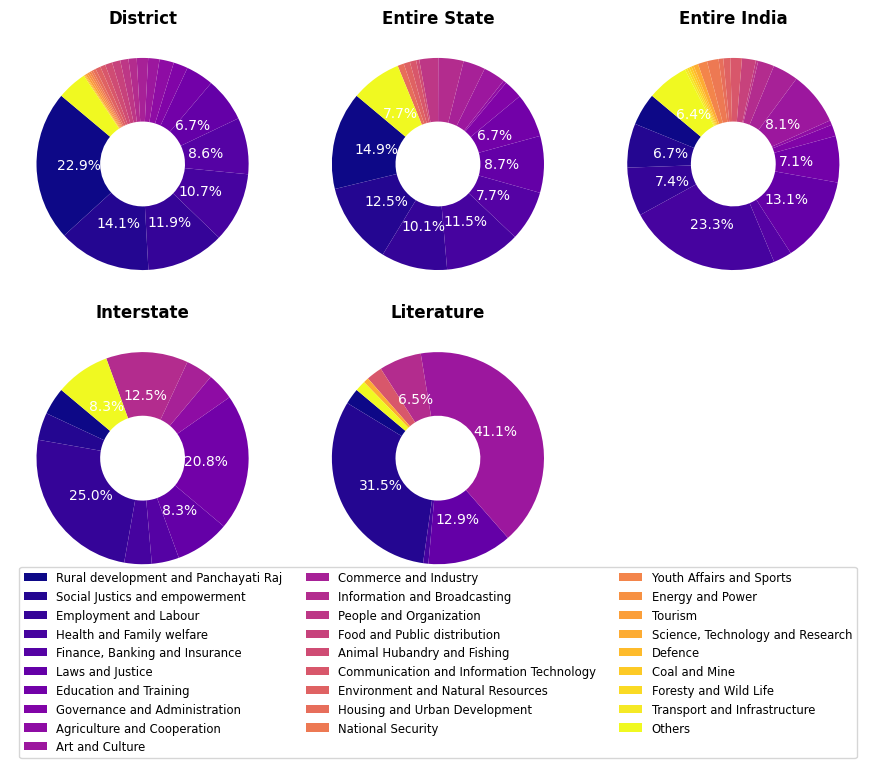

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the provided image
data_dict = {
    "Sectors": ["Rural development and Panchayati Raj", "Social Justics and empowerment", "Employment and Labour",
                "Health and Family welfare", "Finance, Banking and Insurance", "Laws and Justice",
                "Education and Training", "Governance and Administration", "Agriculture and Cooperation",
                "Art and Culture", "Commerce and Industry", "Information and Broadcasting",
                "People and Organization", "Food and Public distribution", "Animal Hubandry and Fishing",
                "Communication and Information Technology", "Environment and Natural Resources",
                "Housing and Urban Development", "National Security", "Youth Affairs and Sports",
                "Energy and Power", "Tourism", "Science, Technology and Research", "Defence",
                "Coal and Mine", "Foresty and Wild Life", "Transport and Infrastructure", "Others"],
    "District": [146, 90, 76, 68, 55, 43, 27, 14, 14, 11, 11, 8, 8, 8, 7, 5, 5, 3, 2, 2, 2, 2, 1, 1, 0, 0, 0, 29],
    "Entire State": [31, 26, 21, 24, 16, 18, 14, 6, 1, 7, 7, 8, 6, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16],
    "Entire India": [14, 19, 21, 66, 8, 37, 20, 5, 2, 23, 11, 7, 1, 6, 0, 5, 3, 2, 5, 4, 0, 0, 2, 1, 1, 1, 1, 18],
    "Interstate": [1, 1, 6, 1, 1, 2, 5, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    "Literature": [3, 39, 0, 1, 0, 16, 0, 0, 0, 51, 0, 8, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2]
}

# Create dataframe
df = pd.DataFrame(data_dict)

# Adjust figure size for scientific articles (in inches)
fig_width = 9  # Double column width in inches
fig_height = 9  # Adjust height to make it more compact

# Plotting multiple donut charts
fig, axes = plt.subplots(3, 3, figsize=(fig_width, fig_height), subplot_kw=dict(aspect="equal"))

# Define the positions of the subplots
positions = [(0, 0), (0, 1), (0, 2),
             (1, 0), (1, 1), (1, 2),
             (2, 0), (2, 1), (2, 2)]

# Map columns to their positions
column_positions = {
    "District": (0, 0),
    "Entire State": (0, 1),
    "Entire India": (0, 2),
    "Interstate": (1, 0),
    "Literature": (1, 1),
}

colors = plt.cm.get_cmap('plasma', len(df['Sectors'])).colors  # Use plasma color palette

for column, pos in column_positions.items():
    values = df[column]
    sectors = df["Sectors"]
    ax = axes[pos]

    wedges, texts, autotexts = ax.pie(
        values,
        autopct=lambda pct: ('%1.1f%%' % pct) if pct > 5 else '',  # Show labels only if > 5%
        colors=colors,
        startangle=140,
        wedgeprops=dict(width=0.6),
        textprops=dict(color="w")
    )
    ax.set_title(column, fontsize=12, weight="bold")
    plt.setp(texts, size=6)

# Remove the unused subplots
for pos in positions:
    if pos not in column_positions.values():
        fig.delaxes(axes[pos])

# Add legend using bbox_to_anchor to place it lower
fig.legend(wedges[:len(df["Sectors"])], df["Sectors"], loc='lower center', bbox_to_anchor=(0.50, 0.15), fontsize='small', ncol=3)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.6)  # Adjust vertical and horizontal space between charts

plt.tight_layout(pad=1)  # Adjust padding around the figure
plt.show()


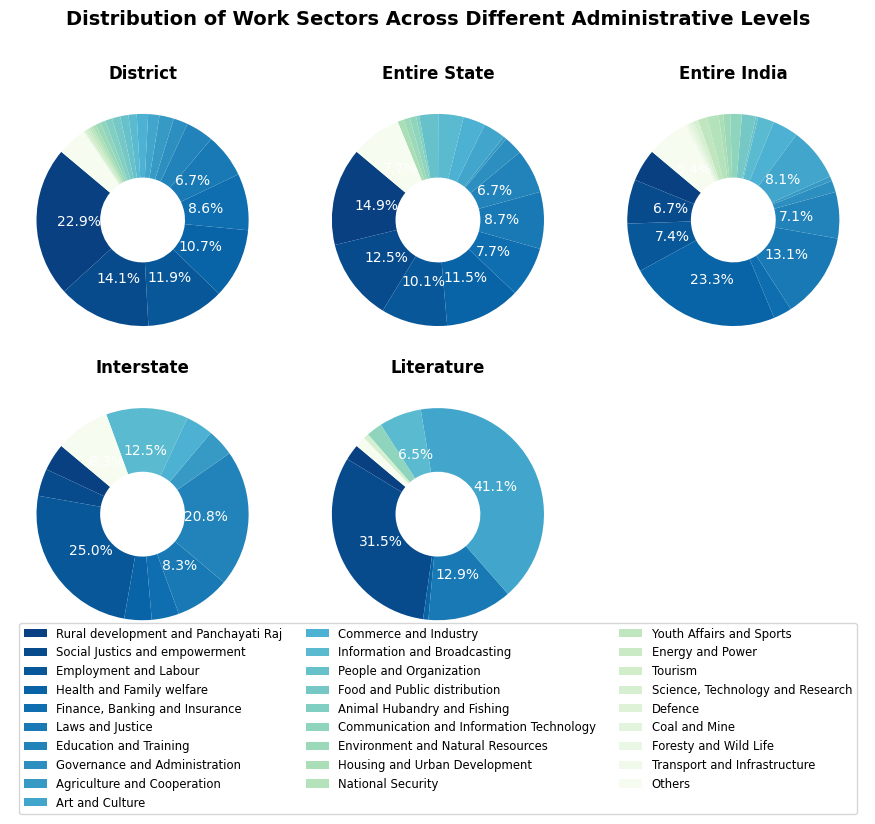

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data from the provided image
data_dict = {
    "Sectors": ["Rural development and Panchayati Raj", "Social Justics and empowerment", "Employment and Labour",
                "Health and Family welfare", "Finance, Banking and Insurance", "Laws and Justice",
                "Education and Training", "Governance and Administration", "Agriculture and Cooperation",
                "Art and Culture", "Commerce and Industry", "Information and Broadcasting",
                "People and Organization", "Food and Public distribution", "Animal Hubandry and Fishing",
                "Communication and Information Technology", "Environment and Natural Resources",
                "Housing and Urban Development", "National Security", "Youth Affairs and Sports",
                "Energy and Power", "Tourism", "Science, Technology and Research", "Defence",
                "Coal and Mine", "Foresty and Wild Life", "Transport and Infrastructure", "Others"],
    "District": [146, 90, 76, 68, 55, 43, 27, 14, 14, 11, 11, 8, 8, 8, 7, 5, 5, 3, 2, 2, 2, 2, 1, 1, 0, 0, 0, 29],
    "Entire State": [31, 26, 21, 24, 16, 18, 14, 6, 1, 7, 7, 8, 6, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16],
    "Entire India": [14, 19, 21, 66, 8, 37, 20, 5, 2, 23, 11, 7, 1, 6, 0, 5, 3, 2, 5, 4, 0, 0, 2, 1, 1, 1, 1, 18],
    "Interstate": [1, 1, 6, 1, 1, 2, 5, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    "Literature": [3, 39, 0, 1, 0, 16, 0, 0, 0, 51, 0, 8, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2]
}

# Create dataframe
df = pd.DataFrame(data_dict)

# Adjust figure size for scientific articles (in inches)
fig_width = 9  # Double column width in inches
fig_height = 9  # Adjust height to make it more compact

# Plotting multiple donut charts
fig, axes = plt.subplots(3, 3, figsize=(fig_width, fig_height), subplot_kw=dict(aspect="equal"))

# Define the positions of the subplots
positions = [(0, 0), (0, 1), (0, 2),
             (1, 0), (1, 1), (1, 2),
             (2, 0), (2, 1), (2, 2)]

# Map columns to their positions
column_positions = {
    "District": (0, 0),
    "Entire State": (0, 1),
    "Entire India": (0, 2),
    "Interstate": (1, 0),
    "Literature": (1, 1),
}

colors = plt.cm.GnBu_r(np.linspace(0, 1, len(df['Sectors'])))  # Use ocean color palette

for column, pos in column_positions.items():
    values = df[column]
    sectors = df["Sectors"]
    ax = axes[pos]

    wedges, texts, autotexts = ax.pie(
        values,
        autopct=lambda pct: ('%1.1f%%' % pct) if pct > 5 else '',  # Show labels only if > 5%
        colors=colors,
        startangle=140,
        wedgeprops=dict(width=0.6),
        textprops=dict(color="w")
    )
    ax.set_title(column, fontsize=12, weight="bold")
    plt.setp(texts, size=6)

# Remove the unused subplots
for pos in positions:
    if pos not in column_positions.values():
        fig.delaxes(axes[pos])

# Add legend using bbox_to_anchor to place it lower
fig.legend(wedges[:len(df["Sectors"])], df["Sectors"], loc='lower center', bbox_to_anchor=(0.50, 0.15), fontsize='small', ncol=3)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.6)  # Adjust vertical and horizontal space between charts

plt.tight_layout(pad=1)  # Adjust padding around the figure
plt.suptitle('Distribution of Work Sectors Across Different Administrative Levels', fontsize=14, weight="bold", y=1.05)  # Add title
plt.show()
